In [15]:
import os

os.getcwd()

'c:\\Users\\wassila\\OneDrive\\Bureau\\These\\wassila\\Scripts'

VAE

In [8]:
## le script du vae de HIVE
# Performing necessary imports
#!pip install tensorflow==2.4.1
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.losses import mse
# Tensorflow / Keras
import tensorflow as tf
print(tf.__version__)
tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

# for building Neural Networks
from tensorflow import keras
# for model evaluation
import sklearn
from sklearn.manifold import TSNE
# For performing clustering
from sklearn.cluster import DBSCAN
# For rescaling metrics to fit into 0 to 1 range
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# from hdbscan import HDBSCAN
# from hdbscan.flat import (HDBSCAN_flat,
#                           approximate_predict_flat,
#                           membership_vector_flat,
#                           all_points_membership_vectors_flat)

import seaborn as sns

import argparse
import os
import glob
import random

import warnings
warnings.filterwarnings('ignore')

print('sklearn: %s' % sklearn.__version__)  # print version
print('Tensorflow/Keras: %s' % keras.__version__)  # print version

tfk = tf.keras
tfkl = tfk.layers



def Vae_function(file, read_count=True,
                 batch_size=32, epochs=1500, kernel="lecun_normal",
                 kl_loss_weight=0.5, edl1=2500, edl2=2000, edl3=1500,
                 edl4=1000,edl5=500, edl6=250, latent_size=40, ddl1=250, ddl2=500,
                 ddl3=1000, ddl4=1500, ddl5=2000, ddl6=2500):
    """
    #nombre de neurones/couche (décroissant et décodeur parallèle croissant)
    kl_loss_weight paramètre loss function
    epoch=chaque couche combien de fois il va retravailler les données, plus on en fait plus il y a d'itérations
    batch size
    kernel -> lacun normal= normal distribution; OK transcripto


     This function performs variational autoencoder architecture
    :param file: the output file from the make_features function
    :param batch_size: Batch size defined according to dataset size
    :param epochs: You can define more /less number of epochs depending on the data
    :param edl1: encoder layer 1 , defined based on the number of features
    :param edl2: encoder layer 2
    :param edl3: encoder layer 3
    :param edl4: encoder layer 4
    :param edl5: encoder layer 5
    :param edl6: encoder layer 6
    :param latent_size: defined for 40 dimensions, can be changed later incase needed
    :param ddl1: decoder layer 1
    :param ddl2: decoder layer 2
    :param ddl3: decoder layer 3
    :param ddl4: decoder layer 4
    :param ddl5: decoder layer 5
    :param ddl6: decoder layer 6
    :return: returns prediction , latent space and history of the models
    """
    #fixe aléatoire (seed th, autres packages besoin de seed)
    tf.random.set_seed(779)

    #z=espace latent
    #structure espace latent
    def sampling(args):
        z_mean, z_log_var = args
        batch = tfk.backend.shape(z_mean)[0]
        dim = tfk.backend.int_shape(z_mean)[1]
        epsilon = tfk.backend.random_normal(shape=(batch, dim), seed=779)
        out = z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon
        return out

    data = file

    n_cols = data.shape[1]
    start_time = time.time()

    #####ENCODER######

    # Input -> entrée données
    inputs = tfk.Input(shape=(n_cols,), name='encoder_input')

    # First hidden layer
    hidden_encoder_1 = tfkl.Dense(edl1, kernel_initializer=kernel, name="hidden_encoder_1")(inputs)
    encoder_norm_1 = tfkl.BatchNormalization(name="encoder_norm_1")(hidden_encoder_1)
    hidden_encoder_1_activation = tfkl.ELU()(encoder_norm_1)

    # Second hidden layer
    hidden_encoder_2 = tfkl.Dense(edl2, kernel_initializer=kernel, name="hidden_encoder_2")(hidden_encoder_1_activation)
    encoder_norm_2 = tfkl.BatchNormalization(name="encoder_norm_2")(hidden_encoder_2)
    hidden_encoder_2_activation = tfkl.ELU()(encoder_norm_2)

    # Third hidden layer
    hidden_encoder_3 = tfkl.Dense(edl3, kernel_initializer=kernel, name="hidden_encoder_3")(hidden_encoder_2_activation)
    encoder_norm_3 = tfkl.BatchNormalization(name="encoder_norm_3")(hidden_encoder_3)
    hidden_encoder_3_activation = tfkl.ELU()(encoder_norm_3)

    # Fourth hidden layer
    hidden_encoder_4 = tfkl.Dense(edl4, kernel_initializer=kernel, name="hidden_encoder_4")(hidden_encoder_3_activation)
    encoder_norm_4 = tfkl.BatchNormalization(name="encoder_norm_4")(hidden_encoder_4)
    hidden_encoder_4_activation = tfkl.ELU()(encoder_norm_4)
    
    # Fourth hidden layer
    hidden_encoder_5 = tfkl.Dense(edl5, kernel_initializer=kernel, name="hidden_encoder_5")(hidden_encoder_4_activation)
    encoder_norm_5 = tfkl.BatchNormalization(name="encoder_norm_5")(hidden_encoder_5)
    hidden_encoder_5_activation = tfkl.ELU()(encoder_norm_5)
    
     # Sixth hidden layer
    hidden_encoder_6 = tfkl.Dense(edl6, kernel_initializer=kernel, name="hidden_encoder_6")(hidden_encoder_5_activation)
    encoder_norm_6 = tfkl.BatchNormalization(name="encoder_norm_6")(hidden_encoder_6)
    hidden_encoder_6_activation = tfkl.ELU()(encoder_norm_6)

    # Mean for the sampling
    z_mean = tfkl.Dense(latent_size, name='z_mean')(hidden_encoder_6_activation)

    # Var for the sampling
    z_log_var = tfkl.Dense(latent_size, name='z_log_var')(hidden_encoder_6_activation)

    # Sample from the values below
    z = tfkl.Lambda(sampling, output_shape=(latent_size,), name='z')([z_mean, z_log_var])

    # Encoder model
    encoder = tfk.Model(inputs, [z_mean, z_log_var, z], name='encoder')
    encoder.summary()

    #####DECODER#####

    # Input
    latent_inputs = tfk.Input(shape=(latent_size,), name='z_sampling')

    # Fifth hidden layer
    hidden_decoder_5 = tfkl.Dense(ddl1, kernel_initializer=kernel, name="hidden_decoder_4")(latent_inputs)
    decoder_norm_5 = tfkl.BatchNormalization(name="decoder_norm_4")(hidden_decoder_5)
    hidden_encoder_5_activation = tfkl.ELU()(decoder_norm_5)

    # Sixth hidden layer
    hidden_decoder_6 = tfkl.Dense(ddl2, kernel_initializer=kernel, name="hidden_decoder_5")(hidden_encoder_5_activation)
    decoder_norm_6 = tfkl.BatchNormalization(name="decoder_norm_5")(hidden_decoder_6)
    hidden_encoder_6_activation = tfkl.ELU()(decoder_norm_6)

    # Seventh hidden layer
    hidden_decoder_7 = tfkl.Dense(ddl3, kernel_initializer=kernel, name="hidden_decoder_6")(hidden_encoder_6_activation)
    decoder_norm_7 = tfkl.BatchNormalization(name="decoder_norm_6")(hidden_decoder_7)
    hidden_encoder_7_activation = tfkl.ELU()(decoder_norm_7)

    # Eighth hidden layer
    hidden_decoder_8 = tfkl.Dense(ddl4, kernel_initializer=kernel, name="hidden_decoder_7")(hidden_encoder_7_activation)
    decoder_norm_8 = tfkl.BatchNormalization(name="decoder_norm_7")(hidden_decoder_8)
    hidden_encoder_8_activation = tfkl.ELU()(decoder_norm_8)
    
    
    # Eighth hidden layer
    hidden_decoder_9 = tfkl.Dense(ddl5, kernel_initializer=kernel, name="hidden_decoder_8")(hidden_encoder_8_activation)
    decoder_norm_9 = tfkl.BatchNormalization(name="decoder_norm_8")(hidden_decoder_9)
    hidden_encoder_9_activation = tfkl.ELU()(decoder_norm_9)
    
    # Eighth hidden layer
    hidden_decoder_10 = tfkl.Dense(ddl6, kernel_initializer=kernel, name="hidden_decoder_9")(hidden_encoder_9_activation)
    decoder_norm_10 = tfkl.BatchNormalization(name="decoder_norm_9")(hidden_decoder_10)
    hidden_encoder_10_activation = tfkl.ELU()(decoder_norm_10)

    # Output
    outputs = tfkl.Dense(n_cols)(hidden_encoder_10_activation)

    # Decoder model
    decoder = tfk.Model(latent_inputs, outputs, name="decoder")
    decoder.summary()
    #return encoder_output

    #####VAE####
    outputs = decoder(encoder(inputs)[2])
    vae = tfk.Model(inputs, outputs=[outputs, z], name="vae") 
    
    #####Personalized loss
    msle = tfk.losses.MSLE(inputs, outputs[0])
    msle *= n_cols
    kl_loss = 1 + z_log_var - tfk.backend.square(z_mean) - tfk.backend.exp(z_log_var)
    kl_loss = tfk.backend.sum(kl_loss, axis=-1)
    kl_loss *= -kl_loss_weight
    vae_loss = tfk.backend.mean(msle + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer="adam")
    vae.summary()

    model_file_path = '.\integration_horizontale\\vae_model.h5'

    # Save the model to the specified file path
    vae.save(model_file_path)
    
    #####Train
    history = vae.fit(data, epochs=epochs, batch_size=batch_size)
    
    # To save the latent space
    pred, latent_space = vae.predict(data)
    latent_space = pd.DataFrame(latent_space)

    pred = pd.DataFrame(pred)
    pred.index = data.index
    pred.columns = data.columns

    return history, latent_space, pred, encoder, decoder, vae

2.4.1
sklearn: 1.3.2
Tensorflow/Keras: 2.4.0


ONE PART AT A TIME

In [9]:
import os
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import xgboost as xgb
import re
from collections import Counter
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#from tabpfn import TabPFNClassifier



###############################################################################################################################
###############################################################################################################################
########################################## HORIZONTAL INTEGRATION #############################################################
###############################################################################################################################
###############################################################################################################################

# depending of transversale or horizontal
if not os.path.exists(".\integration_horizontale"):
    # Si le dossier n'existe pas, créez-le
    os.makedirs(".\integration_horizontale")

###############################################################################################################################
###################################### BUILD DATASET###########################################################################

min_max= input("if you want min/max norm press 'y'")
if min_max =='y':
    all= input("if you want min/max norm all press 'y'")
if min_max !='y':
    z_scale= input("if you want z-score standardization norm press 'y'")

combatseq= input("if you want combatseq batch correction press 'y'")
if combatseq != 'y':
    combat= input("if you want combat batch correction press 'y'")


if combatseq !='y':

    # Get the current working directory
    directory = ".\datasets\mouse"


    list_df=[]

    for root, dirs, files in os.walk(directory):
        
        for file in files:

            if file.endswith('.csv'):

                print(os.path.join(root, file))


                # Read the CSV file into a DataFrame
                df = pd.read_csv(os.path.join(root, file), delimiter=";")

                #display(df)

                # Set the first column as the index
                df.set_index(df.columns[0], inplace=True)

                df = df.dropna()

                # Identify duplicate index values
                duplicate_indices = df.index[df.index.duplicated(keep=False)]

                # Create a new DataFrame containing duplicate rows
                duplicate_df = df[df.index.isin(duplicate_indices)]

                #display(duplicate_df)

                no_duplicate_df = df.drop(duplicate_df.index, axis=0)

                #print(df.shape)
                #print(duplicate_df.shape)
                #print(no_duplicate_df.shape)

                #################

                # Loop over each unique index value
                for index_value in duplicate_df.index.unique():
                    
                    subset_df = df[df.index == index_value]
                            
                    subset_df.loc[:, 'sum'] = subset_df.sum(axis=1)
                            
                    max_sum_row = subset_df[subset_df['sum'] == subset_df['sum'].max()]

                    max_sum_row = max_sum_row.drop(columns='sum')

                    #display(max_sum_row)
                    max_sum_row = max_sum_row.head(1)

                    no_duplicate_df = pd.concat([no_duplicate_df, max_sum_row])

                #print(len(duplicate_df.index.unique()))
                #print(no_duplicate_df.shape)
                
                #display(no_duplicate_df)
                prefix = os.path.basename(os.path.join(root, file))[:16]
                no_duplicate_df = no_duplicate_df.add_prefix(prefix)


                list_df.append(no_duplicate_df)

                #no_duplicate_df.to_csv(f'.\datasets\hcocena\VAE\count_data\count_data_{os.path.basename(os.path.join(root, file))}', index=True, index_label='Gene.name', sep=',')



    ######### COMBINAISON DES DF


    # Concatenate the DataFrames with modified column names
    combined_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), list_df)

    combined_df = combined_df.loc[~(combined_df == 0).all(axis=1)]


display(combined_df)

############## DIFFERENTES OPTIONS DE NORMALISATION

if combatseq != "y":

    if combat != "y":

        if min_max != "y":

            if z_scale != 'y':

                combined_df.to_csv('.\integration_horizontale\TL_TP_p_.csv', index=True, index_label='Gene.name', sep=',')

            else:
                scaler = StandardScaler()
                combined_df_2 = scaler.fit_transform(combined_df)
                combined_df_3 = pd.DataFrame(combined_df_2, columns=combined_df.columns, index=combined_df.index)
                combined_df_3.to_csv('.\integration_horizontale\TL_TP_p_z_score.csv', index=True, index_label='Gene.name', sep=',')
            
        
        else:
            
            if all =='y':
                min_value = combined_df.min().min()
                max_value = combined_df.max().max()
                # Perform min-max normalization
                normalized_df = (combined_df - min_value) / (max_value - min_value)
                normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm_all.csv', index=True, index_label='Gene.name', sep=',')
            if all !='y':
                x = combined_df.values #returns a numpy array
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(x)
                normalized_df = pd.DataFrame(x_scaled, columns=combined_df.columns)
                normalized_df.index = combined_df.index

                normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm.csv', index=True, index_label='Gene.name', sep=',')

    ############################################################################### COMBAT

    else:

        # we generate the list of batches
        batch = []
        datasets = list_df
        for j in range(len(datasets)):
            batch.extend([j for _ in range(len(datasets[j].columns))])

        data_corrected = pycombat(combined_df,batch)


        if min_max != "y":

            if z_scale == 'y':
                
                scaler = StandardScaler()
                data_corrected_2 = scaler.fit_transform(data_corrected)
                display(data_corrected_2)
                display(data_corrected)
                data_corrected_3 = pd.DataFrame(data_corrected_2, columns=data_corrected.columns, index=data_corrected.index)
                data_corrected_3.to_csv('.\integration_horizontale\TL_TP_p_z_score_combat.csv', index=True, index_label='Gene.name', sep=',')

            else:
                data_corrected.to_csv('.\integration_horizontale\TL_TP_p_combat.csv', index=True, index_label='Gene.name', sep=',')
        
        else:
            
            if all =='y':
                min_value = data_corrected.min().min()
                max_value = data_corrected.max().max()
                #Perform min-max normalization
                normalized_df = (data_corrected - min_value) / (max_value - min_value)
                normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm_all_combat.csv', index=True, index_label='Gene.name', sep=',')
            if all != 'y':
                x= data_corrected.values #returns a numpy array
                min_max_scaler = preprocessing.MinMaxScaler()
                x_norm = min_max_scaler.fit_transform(x)
                normalized_df = pd.DataFrame(x_norm, columns=data_corrected.columns)
                normalized_df.index = data_corrected.index
                normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm_combat.csv', index=True, index_label='Gene.name', sep=',')


elif combatseq == "y":
    data_corrected=pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv", sep=';')

    if min_max == "y":

        display(data_corrected)
        data_corrected = data_corrected.set_index('Gene.name')
        data_corrected = data_corrected.apply(pd.to_numeric, errors='coerce')

        display(data_corrected)
        if all =='y':
            min_value = data_corrected.min().min()
            max_value = data_corrected.max().max()
            # Perform min-max normalization
            normalized_df = (data_corrected - min_value) / (max_value - min_value)
            normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm_all_combatseq.csv', index=True, index_label='Gene.name', sep=',')
        
        if all !='y':
            x= data_corrected.values #returns a numpy array
            min_max_scaler = preprocessing.MinMaxScaler()
            x_norm = min_max_scaler.fit_transform(x)
            normalized_df = pd.DataFrame(x_norm, columns=data_corrected.columns)

            normalized_df.to_csv('.\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv', index=True, index_label='Gene.name', sep=',')
    
    else:

        if z_scale == 'y':

            scaler = StandardScaler()
            data_corrected_2 = scaler.fit_transform(data_corrected)
            data_corrected_3 = pd.DataFrame(data_corrected_2, columns=data_corrected.columns, index=data_corrected.index)
            data_corrected_3.to_csv('.\integration_horizontale\TL_TP_p_z_score_combatseq.csv', index=True, index_label='Gene.name', sep=',')


.\datasets\mouse\P\id_33931071_M_P_WT_KO.csv
.\datasets\mouse\TL\id_28772121_TL_M_WT_KO_Conv_final.csv
.\datasets\mouse\TL\id_29104533_TL_M_WT_KO.csv
.\datasets\mouse\TL\id_32234480_TL_M_WT_KO.csv
.\datasets\mouse\TP\id_32510328_TP_M_WT_KO_count_final.csv
.\datasets\mouse\TP\id_33199649_TP_M_WT_KO_count_tpm.csv


id_33931071_M_P_P_WT_rep1_33931071  \
Gene.name                                       
Odf2                                 0.031308   
Tmem245                              0.567982   
Aip                                  1.659358   
Csnk2a2                              2.168151   
Cops6                                4.236891   
...                                       ...   
Sart1                                1.396819   
Top3b                                0.372793   
Itpr2                                0.582910   
Kcnq2                                0.515108   
Osbpl10                              0.163985   

           id_33931071_M_P_P_WT_rep2_33931071  \
Gene.name                                       
Odf2                                 0.030307   
Tmem245                              0.564518   
Aip                                  1.615814   
Csnk2a2                              2.199752   
Cops6                                4.036853   
...                                       ...   
Sart1                                1.387436   
Top3b                                0.378035   
Itpr2                                0.621158   
Kcnq2                                0.644786   
Osbpl10                              0.203013   

           id_33931071_M_P_P_WT_rep3_33931071  \
Gene.name                                       
Odf2                                 0.032098   
Tmem245                              0.546700   
Aip                                  1.703238   
Csnk2a2                              2.232794   
Cops6                                3.935781   
...                                       ...   
Sart1                                1.697957   
Top3b                                0.350571   
Itpr2                                0.555107   
Kcnq2                                0.357836   
Osbpl10                              0.111428   

           id_33931071_M_P_P_WT_rep4_33931071  \
Gene.name                                       
Odf2                                 0.033544   
Tmem245                              0.567792   
Aip                                  1.666307   
Csnk2a2                              2.170120   
Cops6                                3.963278   
...                                       ...   
Sart1                                1.587486   
Top3b                                0.369070   
Itpr2                                0.605759   
Kcnq2                                0.529960   
Osbpl10                              0.174519   

           id_33931071_M_P_P_KO_rep1_33931071  \
Gene.name                                       
Odf2                                 0.033998   
Tmem245                              0.572084   
Aip                                  1.590577   
Csnk2a2                              2.092403   
Cops6                                4.182858   
...                                       ...   
Sart1                                1.402674   
Top3b                                0.377035   
Itpr2                                0.582056   
Kcnq2                                0.528971   
Osbpl10                              0.162230   

           id_33931071_M_P_P_KO_rep2_33931071  \
Gene.name                                       
Odf2                                 0.034377   
Tmem245                              0.638879   
Aip                                  1.504813   
Csnk2a2                              2.167728   
Cops6                                4.251889   
...                                       ...   
Sart1                                1.331290   
Top3b                                0.369876   
Itpr2                                0.625185   
Kcnq2                                0.651454   
Osbpl10                              0.183343   

           id_33931071_M_P_P_KO_rep3_33931071  \
Gene.name                                       
Odf2                                 0.033664   
Tmem245                             

['TL_TP_p_.csv', 'TL_TP_p_combat.csv', 'TL_TP_p_min_max_norm.csv', 'TL_TP_p_min_max_norm_combat.csv']
TL_TP_p_.csv


id_33931071_M_P_P_WT_rep1_33931071  \
Gene.name                                       
Odf2                                 0.031308   
Tmem245                              0.567982   
Aip                                  1.659358   
Csnk2a2                              2.168151   
Cops6                                4.236891   
...                                       ...   
Sart1                                1.396819   
Top3b                                0.372793   
Itpr2                                0.582910   
Kcnq2                                0.515108   
Osbpl10                              0.163985   

           id_33931071_M_P_P_WT_rep2_33931071  \
Gene.name                                       
Odf2                                 0.030307   
Tmem245                              0.564518   
Aip                                  1.615814   
Csnk2a2                              2.199752   
Cops6                                4.036853   
...                                       ...   
Sart1                                1.387436   
Top3b                                0.378035   
Itpr2                                0.621158   
Kcnq2                                0.644786   
Osbpl10                              0.203013   

           id_33931071_M_P_P_WT_rep3_33931071  \
Gene.name                                       
Odf2                                 0.032098   
Tmem245                              0.546700   
Aip                                  1.703238   
Csnk2a2                              2.232794   
Cops6                                3.935781   
...                                       ...   
Sart1                                1.697957   
Top3b                                0.350571   
Itpr2                                0.555107   
Kcnq2                                0.357836   
Osbpl10                              0.111428   

           id_33931071_M_P_P_WT_rep4_33931071  \
Gene.name                                       
Odf2                                 0.033544   
Tmem245                              0.567792   
Aip                                  1.666307   
Csnk2a2                              2.170120   
Cops6                                3.963278   
...                                       ...   
Sart1                                1.587486   
Top3b                                0.369070   
Itpr2                                0.605759   
Kcnq2                                0.529960   
Osbpl10                              0.174519   

           id_33931071_M_P_P_KO_rep1_33931071  \
Gene.name                                       
Odf2                                 0.033998   
Tmem245                              0.572084   
Aip                                  1.590577   
Csnk2a2                              2.092403   
Cops6                                4.182858   
...                                       ...   
Sart1                                1.402674   
Top3b                                0.377035   
Itpr2                                0.582056   
Kcnq2                                0.528971   
Osbpl10                              0.162230   

           id_33931071_M_P_P_KO_rep2_33931071  \
Gene.name                                       
Odf2                                 0.034377   
Tmem245                              0.638879   
Aip                                  1.504813   
Csnk2a2                              2.167728   
Cops6                                4.251889   
...                                       ...   
Sart1                                1.331290   
Top3b                                0.369876   
Itpr2                                0.625185   
Kcnq2                                0.651454   
Osbpl10                              0.183343   

           id_33931071_M_P_P_KO_rep3_33931071  \
Gene.name                                       
Odf2                                 0.033664   
Tmem245                             

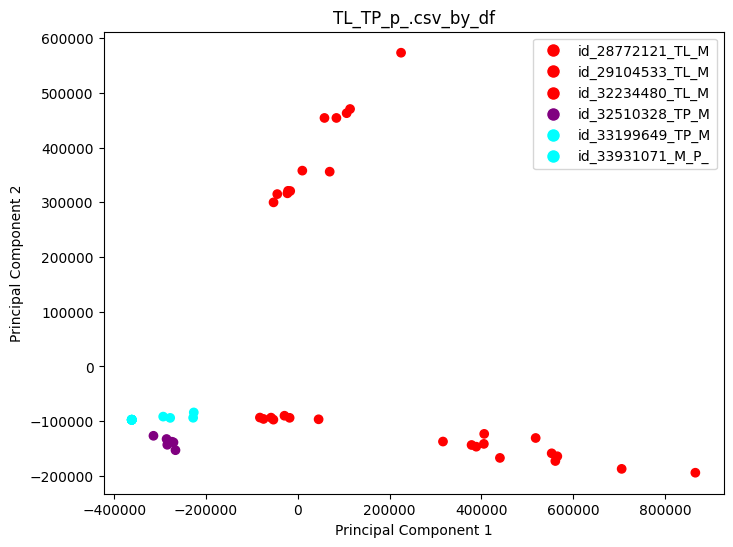

TL_TP_p_combat.csv


id_33931071_M_P_P_WT_rep1_33931071  \
Gene.name                                       
Odf2                              1325.525993   
Tmem245                           1522.700885   
Aip                               1685.866746   
Csnk2a2                            840.034451   
Cops6                             2536.219470   
...                                       ...   
Sart1                             1801.086924   
Top3b                              728.351505   
Itpr2                              410.879833   
Kcnq2                             5252.858436   
Osbpl10                            421.471123   

           id_33931071_M_P_P_WT_rep2_33931071  \
Gene.name                                       
Odf2                              1325.279335   
Tmem245                           1522.698751   
Aip                               1685.618531   
Csnk2a2                            840.179007   
Cops6                             2535.361773   
...                                       ...   
Sart1                             1801.040208   
Top3b                              728.359502   
Itpr2                              410.933527   
Kcnq2                             5253.046660   
Osbpl10                            421.660242   

           id_33931071_M_P_P_WT_rep3_33931071  \
Gene.name                                       
Odf2                              1325.720485   
Tmem245                           1522.687777   
Aip                               1686.116872   
Csnk2a2                            840.330150   
Cops6                             2534.928411   
...                                       ...   
Sart1                             1802.586233   
Top3b                              728.317608   
Itpr2                              410.840802   
Kcnq2                             5252.630162   
Osbpl10                            421.216442   

           id_33931071_M_P_P_WT_rep4_33931071  \
Gene.name                                       
Odf2                              1326.076888   
Tmem245                           1522.700768   
Aip                               1685.906357   
Csnk2a2                            840.043461   
Cops6                             2535.046307   
...                                       ...   
Sart1                             1802.036221   
Top3b                              728.345826   
Itpr2                              410.911909   
Kcnq2                             5252.879994   
Osbpl10                            421.522168   

           id_33931071_M_P_P_KO_rep1_33931071  \
Gene.name                                       
Odf2                              1326.188631   
Tmem245                           1522.703411   
Aip                               1685.474675   
Csnk2a2                            839.687958   
Cops6                             2535.987794   
...                                       ...   
Sart1                             1801.116076   
Top3b                              728.357976   
Itpr2                              410.878634   
Kcnq2                             5252.878558   
Osbpl10                            421.462617   

           id_33931071_M_P_P_KO_rep2_33931071  \
Gene.name                                       
Odf2                              1326.282017   
Tmem245                           1522.744550   
Aip                               1684.985801   
Csnk2a2                            840.032519   
Cops6                             2536.283777   
...                                       ...   
Sart1                             1800.760664   
Top3b                              728.347056   
Itpr2                              410.939181   
Kcnq2                             5253.056338   
Osbpl10                            421.564926   

           id_33931071_M_P_P_KO_rep3_33931071  \
Gene.name                                       
Odf2                              1326.106410   
Tmem245                           15

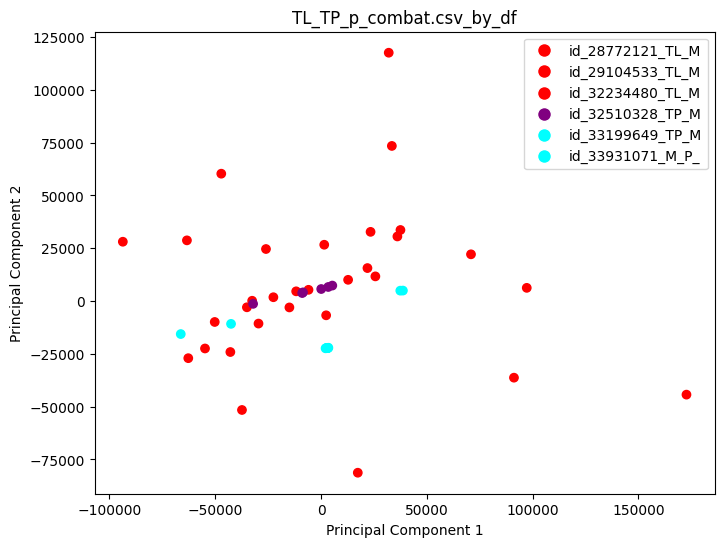

TL_TP_p_min_max_norm.csv


id_33931071_M_P_P_WT_rep1_33931071  \
Gene.name                                       
Odf2                                 0.000015   
Tmem245                              0.000288   
Aip                                  0.000842   
Csnk2a2                              0.001100   
Cops6                                0.002150   
...                                       ...   
Sart1                                0.000708   
Top3b                                0.000189   
Itpr2                                0.000295   
Kcnq2                                0.000261   
Osbpl10                              0.000083   

           id_33931071_M_P_P_WT_rep2_33931071  \
Gene.name                                       
Odf2                                 0.000012   
Tmem245                              0.000232   
Aip                                  0.000666   
Csnk2a2                              0.000907   
Cops6                                0.001665   
...                                       ...   
Sart1                                0.000572   
Top3b                                0.000155   
Itpr2                                0.000256   
Kcnq2                                0.000265   
Osbpl10                              0.000083   

           id_33931071_M_P_P_WT_rep3_33931071  \
Gene.name                                       
Odf2                                 0.000009   
Tmem245                              0.000157   
Aip                                  0.000490   
Csnk2a2                              0.000643   
Cops6                                0.001133   
...                                       ...   
Sart1                                0.000489   
Top3b                                0.000101   
Itpr2                                0.000160   
Kcnq2                                0.000103   
Osbpl10                              0.000032   

           id_33931071_M_P_P_WT_rep4_33931071  \
Gene.name                                       
Odf2                                 0.000011   
Tmem245                              0.000203   
Aip                                  0.000597   
Csnk2a2                              0.000778   
Cops6                                0.001421   
...                                       ...   
Sart1                                0.000569   
Top3b                                0.000132   
Itpr2                                0.000216   
Kcnq2                                0.000189   
Osbpl10                              0.000062   

           id_33931071_M_P_P_KO_rep1_33931071  \
Gene.name                                       
Odf2                                 0.000015   
Tmem245                              0.000274   
Aip                                  0.000764   
Csnk2a2                              0.001006   
Cops6                                0.002012   
...                                       ...   
Sart1                                0.000674   
Top3b                                0.000180   
Itpr2                                0.000279   
Kcnq2                                0.000254   
Osbpl10                              0.000077   

           id_33931071_M_P_P_KO_rep2_33931071  \
Gene.name                                       
Odf2                                 0.000013   
Tmem245                              0.000260   
Aip                                  0.000614   
Csnk2a2                              0.000885   
Cops6                                0.001736   
...                                       ...   
Sart1                                0.000543   
Top3b                                0.000150   
Itpr2                                0.000255   
Kcnq2                                0.000265   
Osbpl10                              0.000074   

           id_33931071_M_P_P_KO_rep3_33931071  \
Gene.name                                       
Odf2                                 0.000014   
Tmem245                             

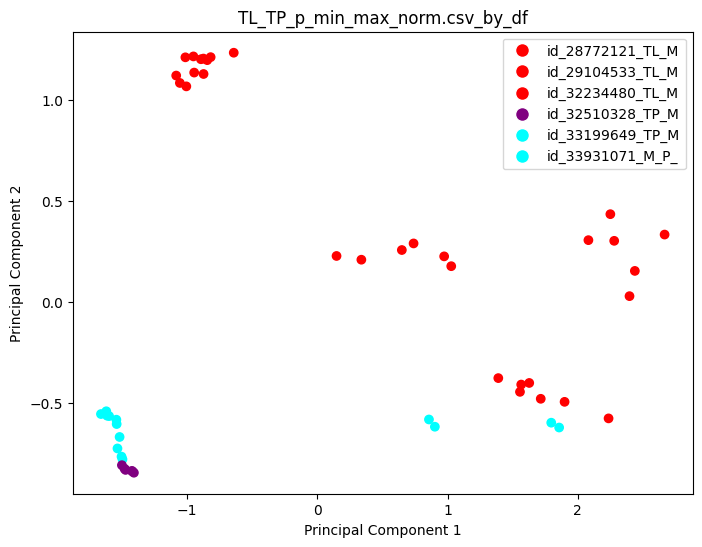

TL_TP_p_min_max_norm_combat.csv


id_33931071_M_P_P_WT_rep1_33931071  \
Gene.name                                       
Odf2                                 0.012386   
Tmem245                              0.014252   
Aip                                  0.015795   
Csnk2a2                              0.007794   
Cops6                                0.023839   
...                                       ...   
Sart1                                0.016885   
Top3b                                0.006737   
Itpr2                                0.003734   
Kcnq2                                0.049539   
Osbpl10                              0.003834   

           id_33931071_M_P_P_WT_rep2_33931071  \
Gene.name                                       
Odf2                                 0.012370   
Tmem245                              0.014235   
Aip                                  0.015775   
Csnk2a2                              0.007785   
Cops6                                0.023805   
...                                       ...   
Sart1                                0.016865   
Top3b                                0.006729   
Itpr2                                0.003729   
Kcnq2                                0.049486   
Osbpl10                              0.003831   

           id_33931071_M_P_P_WT_rep3_33931071  \
Gene.name                                       
Odf2                                 0.012407   
Tmem245                              0.014273   
Aip                                  0.015821   
Csnk2a2                              0.007809   
Cops6                                0.023861   
...                                       ...   
Sart1                                0.016924   
Top3b                                0.006748   
Itpr2                                0.003741   
Kcnq2                                0.049604   
Osbpl10                              0.003839   

           id_33931071_M_P_P_WT_rep4_33931071  \
Gene.name                                       
Odf2                                 0.012394   
Tmem245                              0.014254   
Aip                                  0.015799   
Csnk2a2                              0.007795   
Cops6                                0.023833   
...                                       ...   
Sart1                                0.016897   
Top3b                                0.006738   
Itpr2                                0.003734   
Kcnq2                                0.049550   
Osbpl10                              0.003835   

           id_33931071_M_P_P_KO_rep1_33931071  \
Gene.name                                       
Odf2                                 0.012395   
Tmem245                              0.014254   
Aip                                  0.015794   
Csnk2a2                              0.007792   
Cops6                                0.023841   
...                                       ...   
Sart1                                0.016888   
Top3b                                0.006738   
Itpr2                                0.003735   
Kcnq2                                0.049547   
Osbpl10                              0.003835   

           id_33931071_M_P_P_KO_rep2_33931071  \
Gene.name                                       
Odf2                                 0.012385   
Tmem245                              0.014243   
Aip                                  0.015777   
Csnk2a2                              0.007787   
Cops6                                0.023827   
...                                       ...   
Sart1                                0.016872   
Top3b                                0.006731   
Itpr2                                0.003730   
Kcnq2                                0.049517   
Osbpl10                              0.003830   

           id_33931071_M_P_P_KO_rep3_33931071  \
Gene.name                                       
Odf2                                 0.012385   
Tmem245                             

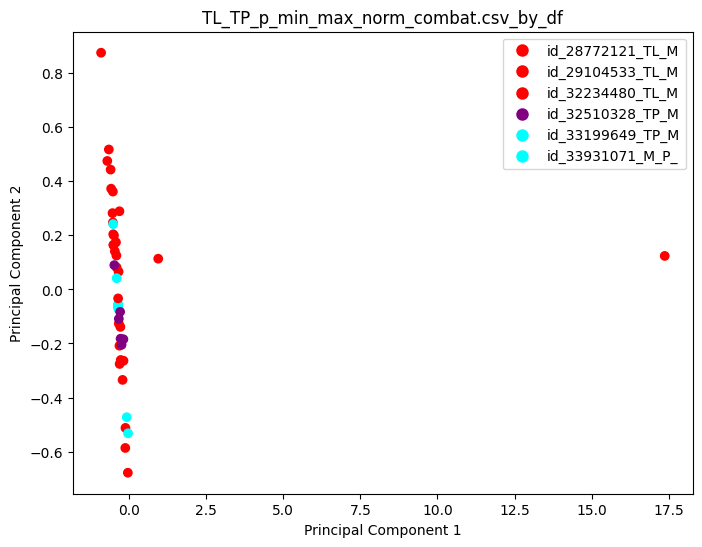

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os


col_by= input("press '1' for wt vs ko and '2' to color by df:")

folder_path = f".\integration_horizontale"
dfs = [f for f in os.listdir(folder_path) if f.startswith('TL_TP_p') and f.endswith('.csv')]

print(dfs)

for df in dfs:

    print(df)

    # combined_df = befor combat seq
    combined_df = pd.read_csv(f".\integration_horizontale\{df}", sep=',')



    # Set the first column as the index
    combined_df.set_index(combined_df.columns[0], inplace=True)

    display(combined_df)

    # Perform PCA
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    pca_result = pca.fit_transform(combined_df.T)  # Transpose the DataFrame for PCA

    if col_by == '1':

        # Determine colors based on column names (ignoring case)
        colors = ['green' if 'wt' in col.lower() else 'red' for col in combined_df.columns]

        # Create a scatter plot of PCA components
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors)
        plt.title(f'{df}_wt_vs_ko')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        # Add legends for colors
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Wt', markerfacecolor='g', markersize=10),
                                plt.Line2D([0], [0], marker='o', color='w', label='Ko', markerfacecolor='r', markersize=10)])

        df=df[:-4]
        plt.savefig(f'.\integration_horizontale\\wt_vs_ko_{df}.png')
        plt.show()
        
    if col_by == '2':

        # Define a mapping of prefixes to colors
        prefix_to_color = {
        'id_28772121_TL_M': 'red',
            'id_29104533_TL_M': 'red',
            'id_32234480_TL_M': 'red',
            'id_32510328_TP_M': 'purple',
            'id_33199649_TP_M': 'cyan',
            'id_33931071_M_P_': 'cyan'}

            
        
        # Determine colors based on column names using the mapping
        colors = [prefix_to_color[col[:16]] for col in combined_df.columns]

        # Create a scatter plot of PCA components
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors)
        plt.title(f'{df}_by_df')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        # Add legends for colors
        legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=prefix, markerfacecolor=color, markersize=10) for prefix, color in prefix_to_color.items()]

        plt.legend(handles=legend_labels)

        # Add names/labels to data points
        #for i, col_name in enumerate(combined_df.columns):
            #plt.text(pca_result[i, 0], pca_result[i, 1], col_name, fontsize=12, ha='right')

        df = df[:-4]

        # Use forward slashes or raw string for the file path
        plt.savefig(r'.\integration_horizontale\\by_df_{}.png'.format(df))
    
    plt.show()

0         1         2     \
id_33931071_M_P_P_WT_rep1_33931071        0.000015  0.000288  0.000842   
id_33931071_M_P_P_WT_rep2_33931071        0.000012  0.000232  0.000666   
id_33931071_M_P_P_WT_rep3_33931071        0.000009  0.000157  0.000490   
id_33931071_M_P_P_WT_rep4_33931071        0.000011  0.000203  0.000597   
id_33931071_M_P_P_KO_rep1_33931071        0.000015  0.000274  0.000764   
id_33931071_M_P_P_KO_rep2_33931071        0.000013  0.000260  0.000614   
id_33931071_M_P_P_KO_rep3_33931071        0.000014  0.000278  0.000688   
id_33931071_M_P_P_KO_rep4_33931071        0.000012  0.000202  0.000537   
id_33931071_M_P_P_WT_rep5_33931071        0.000016  0.000260  0.000799   
id_33931071_M_P_P_WT_rep6_33931071        0.000012  0.000192  0.000523   
id_28772121_TL_MWT1                       0.004538  0.015710  0.004793   
id_28772121_TL_MWT2                       0.005367  0.011677  0.006356   
id_28772121_TL_MWT3                       0.006580  0.017107  0.004293   
id_28772121_TL_MWT4                       0.004894  0.007839  0.002202   
id_28772121_TL_MWT5                       0.005084  0.007791  0.002275   
id_28772121_TL_MWT6                       0.003648  0.011413  0.004576   
id_28772121_TL_MKO1                       0.007497  0.020939  0.007086   
id_28772121_TL_MKO2                       0.004383  0.014803  0.005946   
id_28772121_TL_MKO3                       0.005965  0.016298  0.004081   
id_28772121_TL_MKO4                       0.007369  0.011260  0.003013   
id_28772121_TL_MKO5                       0.003084  0.010465  0.003025   
id_28772121_TL_MKO6                       0.003011  0.008972  0.002496   
id_29104533_TL_MKO1                       0.016119  0.001237  0.026653   
id_29104533_TL_MKO2                       0.014376  0.001092  0.026131   
id_29104533_TL_MKO3                       0.015513  0.001119  0.022986   
id_29104533_TL_MKO4                       0.018101  0.001662  0.024842   
id_29104533_TL_MKO5                       0.012120  0.000694  0.015938   
id_29104533_TL_MKO6                       0.006110  0.000459  0.011421   
id_29104533_TL_MWT1                       0.008750  0.000810  0.017477   
id_29104533_TL_MWT2                       0.009070  0.000712  0.014352   
id_29104533_TL_MWT3                       0.014525  0.001084  0.025050   
id_29104533_TL_MWT4                       0.014875  0.001614  0.023181   
id_29104533_TL_MWT5                       0.008743  0.000850  0.014789   
id_29104533_TL_MWT6                       0.006737  0.000691  0.013810   
id_32234480_TL_Mko_rpf_rep1_count         0.007966  0.006998  0.015536   
id_32234480_TL_Mko_rpf_rep2_count         0.006087  0.006506  0.013945   
id_32234480_TL_Mko_rpf_rep3_count         0.006438  0.006672  0.014018   
id_32234480_TL_Mwt_rpf_rep1_count         0.005503  0.006604  0.012049   
id_32234480_TL_Mwt_rpf_rep2_count         0.004664  0.006615  0.011485   
id_32234480_TL_Mwt_rpf_rep3_count         0.005917  0.006215  0.012517   
id_32234480_TL_Mwt_rpf_rep4_count         0.005268  0.007328  0.012760   
id_32510328_TP_Mest_counts_WT_A           0.005671  0.001620  0.000326   
id_32510328_TP_Mest_counts_WT_B           0.006691  0.001291  0.000372   
id_32510328_TP_Mest_counts_WT_C           0.006386  0.001671  0.000130   
id_32510328_TP_Mest_counts_KO_A           0.008448  0.001257  0.000517   
id_32510328_TP_Mest_counts.1_KO_B         0.007715  0.001772  0.000466   
id_32510328_TP_Mest_counts.2_KO_C         0.007636  0.001954  0.000453   
id_33199649_TP_Mexpected_count_wt_rep1    0.019208  0.023631  0.016104   
id_33199649_TP_Mexpected_count_wt_rep2    0.016102  0.021910  0.018935   
id_33199649_TP_Mexpected_count_ko_rep1    0.012165  0.013816  0.012568   
id_33199649_TP_Mexpected_count.1_ko_rep2  0.013313  0.017902  0.010434   

                                              3         4         5     \
id_33931071_M_P_P_WT_rep1_33931071        0.001100  0.002150  0.000923   
id_33931071_M_P_P_WT_rep2_33931071        0.00090

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 4889)]       0                                            
__________________________________________________________________________________________________
hidden_encoder_1 (Dense)        (None, 2500)         12225000    encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_norm_1 (BatchNormalizat (None, 2500)         10000       hidden_encoder_1[0][0]           
__________________________________________________________________________________________________
elu_12 (ELU)                    (None, 2500)         0           encoder_norm_1[0][0]             
____________________________________________________________________________________________

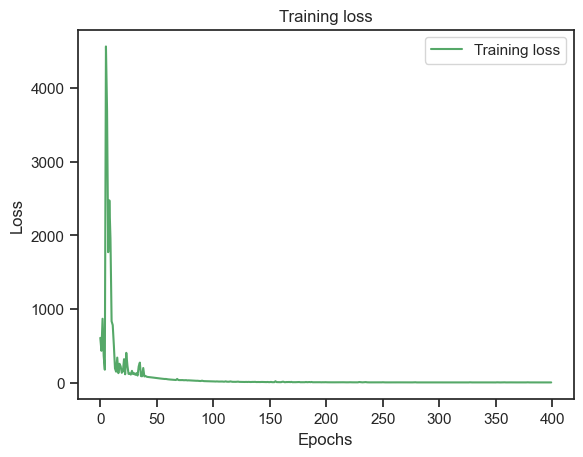

MSE score: 0       3.480359
1       2.725215
2       2.779536
3       6.339388
4       3.358183
          ...   
4884    1.694008
4885    2.080442
4886    3.128614
4887    5.277628
4888    2.782692
Length: 4889, dtype: float64
MSE mean: 3.939645950718384
Perplexity score: [1.25618962 1.6692808  1.44183768 ... 1.42618211 1.33795926 1.49110648]
Perplexity mean: inf


In [22]:
import os
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import xgboost as xgb
import re
from collections import Counter
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib_venn import venn2
from matplotlib_venn import venn3
#from tabpfn import TabPFNClassifier

#########################################################################################################################################
###################################### CREATE FOLDERS #########################################################################################

#mixomics
if not os.path.exists(".\integration_horizontale\mixomics"):
    # Si le dossier n'existe pas, créez-le
    os.makedirs(".\integration_horizontale\mixomics")

#Resultats_VAE
if not os.path.exists(".\integration_horizontale\Resultats_VAE"):
    # Si le dossier n'existe pas, créez-le
    os.makedirs(".\integration_horizontale\Resultats_VAE")

#Enrichissement
if not os.path.exists(".\integration_horizontale\Enrichissement"):
    # Si le dossier n'existe pas, créez-le
    os.makedirs(".\integration_horizontale\Enrichissement")

#variation_mol_levels
if not os.path.exists(".\integration_horizontale\\variation_mol_levels"):
    # Si le dossier n'existe pas, créez-le
    os.makedirs(".\integration_horizontale\\variation_mol_levels")

#########################################################################################################################################
###################################### CHOOSE DATASET #########################################################################################

### en fonction des PCA, choisir le dataset, pour cette etude nous avons choisi le datatset normalise min-max et combat seq
if combatseq !="y":

    if combat != "y":

        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv")
        else:
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv")
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all.csv")
    else:
        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_combat.csv")

        else:
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combat.csv", sep=",")
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=",")
            #display(data)
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv", sep=';')
    else:
        if all !='y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv")
        if all == 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combatseq.csv")



#data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=';')
data_copy=data.copy(deep=True)
data_copy=data_copy.set_index(data_copy.columns[0]) 
#display(data_copy)

del data['Gene.name']
t_data =data.transpose()
display(t_data)

#########################################################################################################################################
###################################### VAE #########################################################################################

#history,latent_space, pred, encoder,decoder, vae =Vae_function(t_data, latent_size=40, epochs=400)
history,latent_space, pred, encoder,decoder, vae =Vae_function(t_data, latent_size=80, epochs=400)

##############
# je telecharge le latent space
### je defini egalement ou trouver le dataset que j'ai telecharger

#print(latent_space)
latent_space.to_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv', sep=",")

#print(type(latent_space))

#encoder.save('.\integration_horizontale\Resultats_VAE\VAEncoder_rare.h5')

############LOSS FUNCTION

plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##########METRIX PERPLEXITY

# define the function to calculate the MSE
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# define the function to calculate the FID score
def fid_score(real_samples, generated_samples, eps=1e-6):
    mu1 = np.mean(real_samples, axis=0)
    mu2 = np.mean(generated_samples, axis=0)
    cov1 = np.cov(real_samples, rowvar=False)
    cov2 = np.cov(generated_samples, rowvar=False)
    diff = mu1 - mu2
    # product might be almost singular
    covmean, _ = np.linalg.sqrtm(cov1.dot(cov2), disp=False)
    if not np.isfinite(covmean).all():
        msg = f'fid calculation produces singular product; adding {eps} to diagonal of cov estimates'
        print(msg)
        offset = np.eye(cov1.shape[0]) * eps
        covmean = np.linalg.sqrtm((cov1 + offset).dot(cov2 + offset))
    # numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError(f'Imaginary component {m}')
        covmean = covmean.real
    trace = np.trace(cov1 + cov2 - 2 * covmean)
    return diff.dot(diff) + trace

# define the function to calculate the perplexity score
def perplexity(y_true, y_pred):
    true_len = y_true.shape[0]
    pred_len = y_pred.shape[0]
    pad_length = pred_len - true_len
    if pad_length > 0:
        y_true = pad_sequences([y_true], maxlen=pred_len, padding='post', truncating='post')[0]
    elif pad_length < 0:
        y_pred = pad_sequences([y_pred], maxlen=true_len, padding='post', truncating='post')[0]
    cross_entropy = entropy(y_true, y_pred)
    return np.power(2.0, cross_entropy)

# generate the samples using the VAE model
#prediction, latent_space, history, encoder, decoder = Vae_function(make_features(data))
#latent_samples = np.random.normal(size=(len(data), 16))
#generated_samples = decoder.predict(latent_samples)

# calculate the MSE score
reconstructed_data = decoder.predict(encoder.predict(t_data)[2])
reconstructed_data = decoder.predict(tf.convert_to_tensor(encoder.predict(t_data)[2], dtype=tf.float32))

mse_score = mse(t_data, reconstructed_data)
mse_mean = np.mean(mse_score)
print('MSE score:', mse_score)
print('MSE mean:', mse_mean)
# calculate the perplexity score
perplexity_score = perplexity(t_data, reconstructed_data)
mean_perplexity= np.mean(perplexity_score)
print('Perplexity score:', perplexity_score)
print('Perplexity mean:', mean_perplexity)

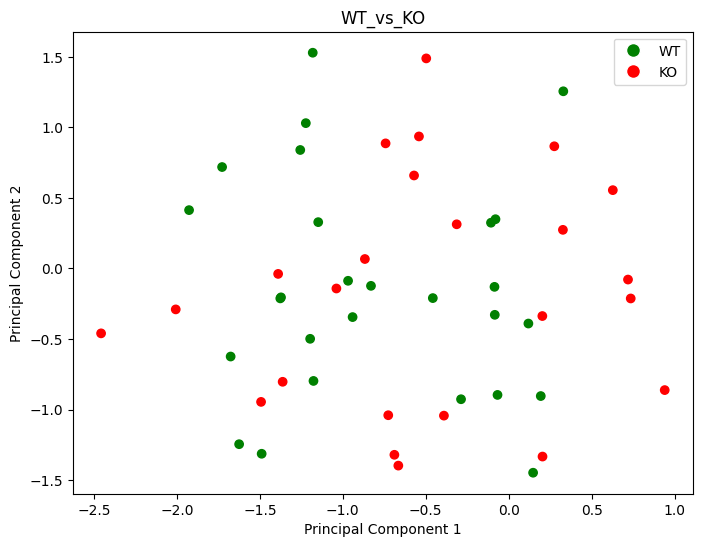

In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


col_by= input("press '1' for wt vs ko and '2' to color by df:")


# combined_df = befor combat seq
data = pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv', sep=",")
data.set_index(data.columns[0], inplace=True)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

combined_df= pd.read_csv('.\integration_horizontale\TL_TP_p_.csv', sep=",")
combined_df.set_index(combined_df.columns[0], inplace=True)

#display(combined_df)

if col_by == '1':

    # Determine colors based on column names (ignoring case)
    colors = ['green' if 'wt' in col.lower() else 'red' for col in combined_df.columns]

    # Create a scatter plot of PCA components
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
    plt.title('WT_vs_KO')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add legends for colors
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='WT', markerfacecolor='g', markersize=10),
                            plt.Line2D([0], [0], marker='o', color='w', label='KO', markerfacecolor='r', markersize=10)])

    #df=df[:-4]
    #plt.savefig(f'.\integration_horizontale_TL\\wt_vs_ko_{df}.png')
    plt.show()
        
if col_by == '2':

        
    prefix_to_color = {
        'id_28772': 'red',
            'id_29104': 'red',
            'id_32234': 'red',
            'id_32510': 'purple',
            'id_33199': 'cyan',
            'id_33931': 'cyan'}

            
        
    # Determine colors based on column names using the mapping
    colors = [prefix_to_color[col[:8]] for col in combined_df.columns]

    # Create a scatter plot of PCA components
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
    plt.title('by_df')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add legends for colors
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=prefix, markerfacecolor=color, markersize=10) for prefix, color in prefix_to_color.items()]

    plt.legend(handles=legend_labels)

        # Add names/labels to data points
        #for i, col_name in enumerate(combined_df.columns):
            #plt.text(pca_result[i, 0], pca_result[i, 1], col_name, fontsize=12, ha='right')

    #df = df[:-4]

        # Use forward slashes or raw string for the file path
    #plt.savefig(r'.\integration_horizontale_TL\\by_df_{}.png'.format(df))
    
plt.show()

SHAP

In [ ]:
import shap

explainer = shap.Explainer(vae.encode, t_data)
shap_values = explainer.shap_values(t_data)

BEST LATENT SPACE

In [ ]:
import os
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import xgboost as xgb
import re
from collections import Counter
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib_venn import venn2
from matplotlib_venn import venn3

if combatseq !="y":

    if combat != "y":

        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv")
        else:
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv")
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all.csv")
    else:
        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_combat.csv")

        else:
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combat.csv", sep=",")
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=",")
            #display(data)
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv", sep=';')
    else:
        if all !='y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv")
        if all == 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combatseq.csv")


del data['Gene.name']
t_data =data.transpose()


tests= [i for i in range(20, 101) if i % 10 == 0]

mse_dict={}
mae_dict={}
perplexity_dict={}
rmsle_dict={}
kl_divergence_dict={}

for test in tests:

    history,latent_space, pred, encoder,decoder, vae =Vae_function(t_data, latent_size=test, epochs=400)

    ##############
    #########LOSS FUNCTION

    plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    ##########METRIX 

    # define the function to calculate the MSE
    def mse(y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))
    
    # define the function to calculate the FID score
    def fid_score(real_samples, generated_samples, eps=1e-6):
        mu1 = np.mean(real_samples, axis=0)
        mu2 = np.mean(generated_samples, axis=0)
        cov1 = np.cov(real_samples, rowvar=False)
        cov2 = np.cov(generated_samples, rowvar=False)
        diff = mu1 - mu2
        # product might be almost singular
        covmean, _ = np.linalg.sqrtm(cov1.dot(cov2), disp=False)
        if not np.isfinite(covmean).all():
            msg = f'fid calculation produces singular product; adding {eps} to diagonal of cov estimates'
            print(msg)
            offset = np.eye(cov1.shape[0]) * eps
            covmean = np.linalg.sqrtm((cov1 + offset).dot(cov2 + offset))
        # numerical error might give slight imaginary component
        if np.iscomplexobj(covmean):
            if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
                m = np.max(np.abs(covmean.imag))
                raise ValueError(f'Imaginary component {m}')
            covmean = covmean.real
        trace = np.trace(cov1 + cov2 - 2 * covmean)
        return diff.dot(diff) + trace
    
    # define the function to calculate the perplexity score
    def perplexity(y_true, y_pred):
        true_len = y_true.shape[0]
        pred_len = y_pred.shape[0]
        pad_length = pred_len - true_len
        if pad_length > 0:
            y_true = pad_sequences([y_true], maxlen=pred_len, padding='post', truncating='post')[0]
        elif pad_length < 0:
            y_pred = pad_sequences([y_pred], maxlen=true_len, padding='post', truncating='post')[0]
        cross_entropy = entropy(y_true, y_pred)
        return np.power(2.0, cross_entropy)




    #y pred
    reconstructed_data = decoder.predict(encoder.predict(t_data)[2])
    reconstructed_data = decoder.predict(tf.convert_to_tensor(encoder.predict(t_data)[2], dtype=tf.float32))


    #mae
    mae = tf.keras.losses.MeanAbsoluteError()
    mae_score = mae(t_data, reconstructed_data)
    mae_mean = np.mean(mae_score)
    mae_dict[test]=mae_mean

    # calculate the MSE score
    reconstructed_data = decoder.predict(encoder.predict(t_data)[2])
    reconstructed_data = decoder.predict(tf.convert_to_tensor(encoder.predict(t_data)[2], dtype=tf.float32))
    mse_score = mse(t_data, reconstructed_data)
    mse_mean = np.mean(mse_score)
    mse_dict[test]=mse_mean
    #print('MSE score:', mse_score)
    #print('MSE mean:', mse_mean)

    # calculate the perplexity score
    perplexity_score = perplexity(t_data, reconstructed_data)
    mean_perplexity= np.mean(perplexity_score)
    perplexity_dict[test]=mean_perplexity
    #print('Perplexity score:', perplexity_score)
    #print('Perplexity mean:', mean_perplexity)

    #kl div
    def kl_divergence(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
        return tf.reduce_sum(y_true * tf.math.log(y_true / y_pred))

    kl_divergence_result = kl_divergence(t_data, reconstructed_data)
    kl_divergence_dict[test]=np.mean(kl_divergence_result)

    #rmsle
    def rmsle(y_true, y_pred):
        y_true = tf.math.log1p(y_true)
        y_pred = tf.math.log1p(y_pred)
        return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

    rmsle_result = rmsle(tf.constant(t_data, dtype=tf.float32), tf.constant(reconstructed_data, dtype=tf.float32))
    rmsle_dict[test]=np.mean(rmsle_result)


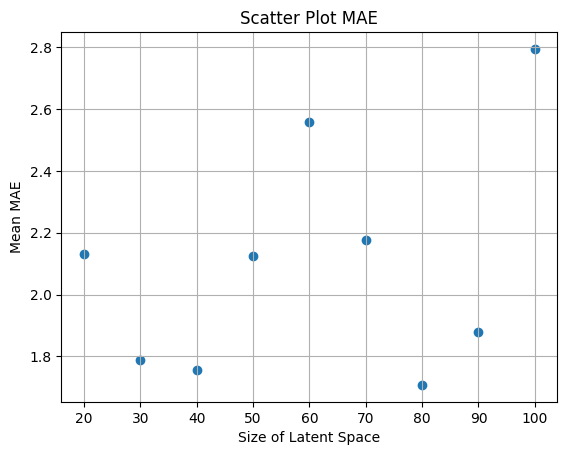

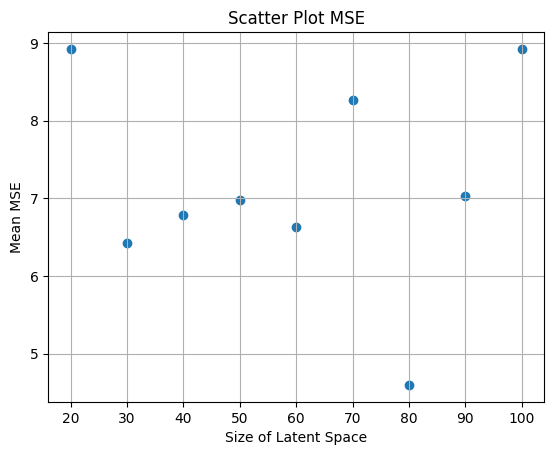

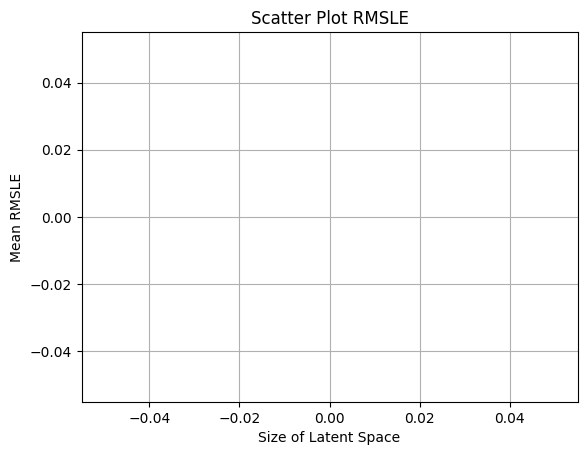

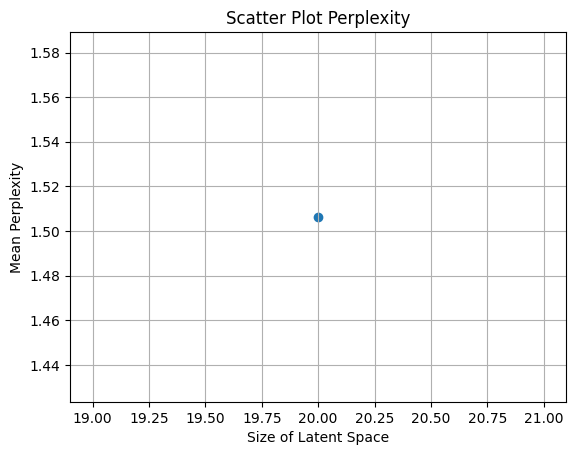

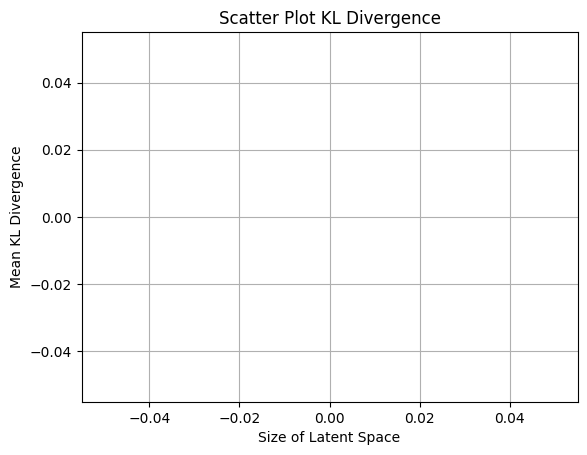

In [22]:
def plot_scatter(x, y, ylabel, title):
    plt.scatter(x, y)
    plt.xlabel("Size of Latent Space")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_scatter(list(mae_dict.keys()), list(mae_dict.values()), "Mean MAE", "Scatter Plot MAE")
plot_scatter(list(mse_dict.keys()), list(mse_dict.values()), "Mean MSE", "Scatter Plot MSE")
plot_scatter(list(rmsle_dict.keys()), list(rmsle_dict.values()), "Mean RMSLE", "Scatter Plot RMSLE")
plot_scatter(list(perplexity_dict.keys()), list(perplexity_dict.values()), "Mean Perplexity", "Scatter Plot Perplexity")
plot_scatter(list(kl_divergence_dict.keys()), list(kl_divergence_dict.values()), "Mean KL Divergence", "Scatter Plot KL Divergence")

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import xgboost as xgb
import re
from collections import Counter
from functools import reduce
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import shap
from sklearn.preprocessing import LabelEncoder
#from tabpfn import TabPFNClassifier


def shap_general_f(feat_data, fit_model):
    explainer = shap.Explainer(fit_model.predict, feat_data, seed=42)
    shap_values = explainer.shap_values(feat_data) # this is a vector not a matrix

    figure = plt.figure()
    return shap.summary_plot(shap_values, feat_data, max_display=7)

data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv", sep=",")

data_copy=data.copy(deep=True)
data_copy=data_copy.set_index(data_copy.columns[0]) 
#display(data_copy)
del data['Gene.name']
                  
t_data =data.transpose()
#display(t_data)


#######################################################################################################################################
#####################################SELECTION DES FEATURES############################################################################

#####labels
dict={}

datasets=["id_28772","id_29104","id_32234","id_32510","id_33199","id_33931"]


for dataset in datasets:

    filtered_df = t_data[t_data.index.str.contains(dataset)]
    indices_list = list(filtered_df.index)

    row_numbers = [t_data.index.get_loc(name) for name in indices_list]

    labels=[]

    for index in filtered_df.index:
        #print(index)
        row_name = index
        if "wt" in row_name.lower():
            labels.append(1)
        elif "ko" in row_name.lower():
            labels.append(0)
    
    dict[dataset]=[row_numbers,labels]

#print(dict)

########


latent_space= pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv', sep=",")
latent_space.set_index(latent_space.columns[0], inplace=True)


X = latent_space
y = labels

x = 3

methods= input("select a method to choose your features:\n if Random forest press 'rf'\n if XGboost press 'xgb', if you want multiple approaches you can put multiple options separated by a ',' exemple: 'dt, rf, xgb'")
methods=methods.lower()

#split methods over ,
methods = [item.strip() for item in methods.split(',')]
print(len(methods))

results={}

for method in methods:

        
    if method == 'xgb':

        if not os.path.exists(".\integration_horizontale\Resultats_VAE\\xgb"):
            os.makedirs(".\integration_horizontale\Resultats_VAE\\xgb")

        if not os.path.exists(".\integration_horizontale\Enrichissement\\xgb"):
            os.makedirs(".\integration_horizontale\Enrichissement\\xgb")

        # Number of trees to examine
        num_trees = int(input("number of trees for xgb"))

        selected_features_all=[]

        for dataset in datasets:

            clf = xgb.XGBClassifier(n_estimators=num_trees, random_state=42) 
            
            X2= X.iloc[dict[dataset][0]]

            y=dict[dataset][1]
            le = LabelEncoder()
            y=le.fit_transform(y)


            clf.fit(X2, y)
        

            ###############model importance
            importance_scores = clf.feature_importances_
            feature_importance_list = list(enumerate(importance_scores))
            sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
            selected_features = sorted_feature_importance[:x]
            
            selected_features = [list(t) for t in selected_features]
            selected_features = [sublist for sublist in selected_features if sublist[1] != 0]
            selected_features = [t[0] for t in selected_features]

            selected_features_all.append(selected_features)

            ###########shap
            #shap_general_f(t_data, clf)

        selected_features = [item for sublist in selected_features_all for item in sublist]

        results[method] = list(set(selected_features))
        

    elif method == "rf":

        if not os.path.exists(".\integration_horizontale\Resultats_VAE\\rf"):
            os.makedirs(".\integration_horizontale\Resultats_VAE\\rf")

        if not os.path.exists(".\integration_horizontale\Enrichissement\\rf"):
            os.makedirs(".\integration_horizontale\Enrichissement\\rf")
        
        
        num_trees = int(input("number of trees for rf"))

        #param_dist = {'n_estimators': [num for num in range(100, 1001) if num % 100 == 0]}
        #rf = RandomForestClassifier()
        #randomized_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)
        #randomized_search.fit(X, y)
        #best_params = randomized_search.best_params_
        #print(best_params)


        #rf = RandomForestClassifier(**best_params)

        selected_features_all=[]

        for dataset in datasets:

            selected_features=[]
        

            rf = RandomForestClassifier(n_estimators=num_trees, random_state=42)
            X2= X.iloc[dict[dataset][0]]

            y=dict[dataset][1]

            rf.fit(X2, y)

            # Get feature importances
            importances = rf.feature_importances_

            # Get the indices that would sort the importances in descending order
            indices = np.argsort(importances)[::-1]

            # Get the feature names in the order of importance
            feature_names = X2.columns

            ##########shap values
            #shap_general_f(t_data, rf)

            # Print the top 7 features and their importance scores
            print("Top x most important features:")
            for f in range(x):
                if importances[indices[f]] !=0:
                    selected_features.append(int(feature_names[indices[f]]))
                    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

            selected_features_all.append(selected_features)
        
        
        selected_features = [item for sublist in selected_features_all for item in sublist]

        results[method]=selected_features



    else:
        method= input("select a method to choose your features:\n if Random forest press 'rf'\n if XGboost press 'xgb'")
        method=method.lower()


####################################################################### TO COMPARE THE 3 METHODS

#######PAIRPLOT
labels=[]

for index in t_data.index:
    #print(index)
    row_name = index
    if "wt" in row_name.lower():
        labels.append(1)
    elif "ko" in row_name.lower():
        labels.append(0)
    

#LABELS 1/0 into WT/KO
str_labels= ["WT" if num == 1 else "KO" for num in labels]


for key in results:

    #print(key)

    liste=results[key]

    selected_columns = latent_space.iloc[:,liste]

    palette = {'KO': 'red',  'WT': 'green'}
    selected_columns['Label'] = str_labels

    # Create a pairplot with the specified colors
    sns.set(style="ticks")
    #pairplot=sns.pairplot(selected_columns, hue="Label", palette=palette)

    #pairplot.savefig(f".\integration_horizontale\Resultats_VAE\{key}_pairplot.png")

    # Show the plot
    plt.show()
    
    plt.close()



#######################################################################################################################################
#####################################GET THE MOLECULES IN EACH SELECTED FEATURE###########################################################

X=t_data.values

#latent_space= pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv')
print("MOL IDENTIFICATION")


for method in methods:

    selected_features=results[method]

    df_list=[]
    binary_df_list=[]

    for feature in selected_features:
        

        column = latent_space.iloc[:, feature]

        y= column.values

        ### Je tourne le modele de randomm forest regression
        rf = RandomForestRegressor(n_estimators=100, random_state=42) 
        rf.fit(X, y)

        #shap_general_f(t_data, rf)

        # Récupération des molecules avec leur score d'importance
        importances = rf.feature_importances_
        df_importances=pd. DataFrame(importances)
        df_importances.rename(columns={df_importances.columns[0]: f'feature_{feature}'},inplace=True)
        

        df_importances['Gene.name'] = data_copy.index
        df_importances = df_importances.set_index('Gene.name')
        
        df_list.append(df_importances)

        ###################### sorting by importance and selecting top mol

        # Sort the DataFrame based on the 'Value' column in descending order
        df_importances2 = df_importances.sort_values(by=f'feature_{feature}', ascending=False)
        print(f'feature_{feature}')
        print('reordered')
        display(df_importances2)

        # Define the number of rows (x) you want to set to 1
        x = 100

        # 1 for the first x rows, and 0 for the rest
        df_importances2[f'feature_{feature}'] = [1 if i < x else 0 for i in range(len(df_importances2))]
        binary_df_list.append(df_importances2)

    # Affichage des variables d'importance
    combined_df = pd.concat(df_list, axis=1)
    #print(combined_df.head())

    combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_molecules_importance_in_features.csv', index=True)

    #binary_combined_df = pd.concat(binary_df_list, axis=1, ignore_index=True)
    binary_combined_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), binary_df_list)
    print(binary_combined_df.head())
        
    binary_combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv', index=True)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


2
Top x most important features:
47: 0.06348205348205349
37: 0.047654389082960526
13: 0.035126385920036717
Top x most important features:
79: 0.044407796788749176
73: 0.03921767572561224
31: 0.03374633136537899
Top x most important features:
75: 0.045994733265375475
16: 0.04199371389738363
22: 0.030619266055045877
Top x most important features:
39: 0.044284243048403706
25: 0.037075180226570546
14: 0.03604531410916581
Top x most important features:
2: 0.029646522234891677
26: 0.028126187761307486
71: 0.027366020524515394
Top x most important features:
34: 0.05007320468509983
18: 0.045042882744495666
51: 0.03725838453661035



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MOL IDENTIFICATION
feature_47
reordered


feature_47
Gene.name            
Tfrc         0.033170
Cobll1       0.024847
Trmt1l       0.020754
Cand2        0.017166
Gpatch8      0.013604
...               ...
Tacc1        0.000000
Sbf1         0.000000
Ube2o        0.000000
Zfyve28      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_37
reordered


feature_37
Gene.name            
Lsm2         0.031518
Vezt         0.029394
Fmr1         0.024144
Atat1        0.018769
Mtss1        0.013737
...               ...
Usp34        0.000000
Mlec         0.000000
Ncapd3       0.000000
Spcs3        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_13
reordered


feature_13
Gene.name            
Fmr1         0.035742
Acat2        0.025659
G6pdx        0.018554
Coa6         0.017822
Gap43        0.017373
...               ...
Tbc1d4       0.000000
Rab8a        0.000000
Ythdf3       0.000000
Sh3bp1       0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_79
reordered


feature_79
Gene.name            
Pter         0.073005
Calr         0.028758
Hcn4         0.019484
Pycr1        0.019110
Snrpn        0.017214
...               ...
Pigs         0.000000
Ppp2r5b      0.000000
Phldb1       0.000000
Fbxo42       0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_73
reordered


feature_73
Gene.name            
Hk2          0.033997
Lrrc4b       0.031848
Stmn1        0.022312
Psmd3        0.021475
Mcm2         0.020815
...               ...
Erc2         0.000000
Rab35        0.000000
Naa35        0.000000
Cacna2d2     0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_31
reordered


feature_31
Gene.name            
Macf1        0.035762
Jup          0.034974
Pycr1        0.030798
Fmr1         0.025349
Gpc6         0.018214
...               ...
Naa35        0.000000
Cacna2d2     0.000000
Nudcd1       0.000000
Atp2b4       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_75
reordered


feature_75
Gene.name            
Dek          0.114876
Tex9         0.079236
Prkar2a      0.039153
Sap130       0.036171
Actl6a       0.032047
...               ...
Fchsd1       0.000000
Naa50        0.000000
Dhx29        0.000000
Atraid       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_16
reordered


feature_16
Gene.name            
Ada          0.022356
Fitm2        0.021403
Chuk         0.013474
Gng10        0.012841
Cend1        0.012158
...               ...
Nrd1         0.000000
Cggbp1       0.000000
Hspa1l       0.000000
Serinc5      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_22
reordered


feature_22
Gene.name            
Senp7        0.039559
Hmgcs1       0.029800
Phgdh        0.025682
Nrm          0.023809
Sik2         0.023129
...               ...
Ppp2r5a      0.000000
Ip6k1        0.000000
Ankrd13d     0.000000
Pigs         0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_39
reordered


feature_39
Gene.name            
Acaa1b       0.023990
Med14        0.014917
Fmr1         0.013248
Bsn          0.011017
Ggh          0.010825
...               ...
Rictor       0.000000
Magi1        0.000000
Vkorc1l1     0.000000
Ccdc88c      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_25
reordered


feature_25
Gene.name            
Fmr1         0.055790
Slco3a1      0.026494
Dock7        0.022443
Slc6a6       0.022092
Pofut2       0.017784
...               ...
Bnip1        0.000000
Rictor       0.000000
Magi1        0.000000
Ccdc88c      0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_14
reordered


feature_14
Gene.name            
Raver1       0.033469
Ercc6l       0.029538
Iws1         0.026053
Fmr1         0.019206
Itga6        0.018855
...               ...
Rictor       0.000000
Ppp1r9b      0.000000
Magi1        0.000000
Cenpe        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_2
reordered


feature_2
Gene.name           
Glipr2      0.030983
Pdpr        0.028758
Vangl2      0.017192
Fbxo22      0.014087
Samhd1      0.013556
...              ...
Ube2q1      0.000000
Pgm2        0.000000
Ahcyl1      0.000000
Gng5        0.000000
Osbpl10     0.000000

[4889 rows x 1 columns]

feature_26
reordered


feature_26
Gene.name            
Ak3          0.072079
Sod1         0.031512
Dhfr         0.020271
Fmr1         0.019941
Lzic         0.015612
...               ...
Klhl11       0.000000
Rps6         0.000000
Map2k7       0.000000
Trmt6        0.000000
Odf2         0.000000

[4889 rows x 1 columns]

feature_71
reordered


feature_71
Gene.name            
Ctnna1       0.030810
Fmr1         0.019744
Nqo2         0.017354
Pfkp         0.015064
Dhfr         0.014478
...               ...
Vps37a       0.000000
Actg1        0.000000
Epn2         0.000000
Eif2b5       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_34
reordered


feature_34
Gene.name            
Glipr2       0.030529
Ubb          0.022015
Sp4          0.015911
Acad10       0.014496
Anapc4       0.012740
...               ...
Zc3h4        0.000000
Fnbp4        0.000000
Efr3b        0.000000
Taok2        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_18
reordered


feature_18
Gene.name            
H1f0         0.018401
Lgalsl       0.017352
Pcbd2        0.014333
Slc9a3r2     0.013677
Ada          0.013373
...               ...
Atp2b4       0.000000
Magi1        0.000000
Cenpe        0.000000
Vkorc1l1     0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_51
reordered


feature_51
Gene.name            
Wdr54        0.040006
Actg1        0.018111
Eno3         0.015812
Snrpd1       0.015714
Ttc30b       0.015343
...               ...
Orai1        0.000000
Slc38a7      0.000000
Atp6v1a      0.000000
Pithd1       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

           feature_47  feature_37  feature_13  feature_79  feature_73  \
Gene.name                                                               
Tfrc                1           1           1           1           1   
Cobll1              1           1           0           1           0   
Trmt1l              1           0           0           0           0   
Cand2               1           0           0           0           0   
Gpatch8             1           0           0           0           0   

           feature_31  feature_75  feature_16  feature_22  feature_39  \
Gene.name                                                               
Tfrc                0           0           0           0           0   
Cobll1              0           0           0           0           0   
Trmt1l              0           0           0           0           0   
Cand2               0           0           0           0           1   
Gpatch8             0           0           0     

feature_0
Gene.name           
Usf2        0.048286
Hmgcs1      0.025530
Ddx19a      0.019852
Zfp219      0.018677
Iws1        0.015789
...              ...
Rragd       0.000000
Ahcyl1      0.000000
Prpf38b     0.000000
Gng5        0.000000
Man2a2      0.000000

[4889 rows x 1 columns]

feature_34
reordered


feature_34
Gene.name            
Glipr2       0.030529
Ubb          0.022015
Sp4          0.015911
Acad10       0.014496
Anapc4       0.012740
...               ...
Zc3h4        0.000000
Fnbp4        0.000000
Efr3b        0.000000
Taok2        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_3
reordered


feature_3
Gene.name           
Galns       0.021502
Bmp1        0.015977
Marcksl1    0.014828
Twsg1       0.014670
Nos1        0.014525
...              ...
Nat10       0.000000
Abcf3       0.000000
Diras2      0.000000
Cntfr       0.000000
Osbpl10     0.000000

[4889 rows x 1 columns]

feature_37
reordered


feature_37
Gene.name            
Lsm2         0.031518
Vezt         0.029394
Fmr1         0.024144
Atat1        0.018769
Mtss1        0.013737
...               ...
Usp34        0.000000
Mlec         0.000000
Ncapd3       0.000000
Spcs3        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_5
reordered


feature_5
Gene.name           
Fmr1        0.023920
Osgep       0.020933
Nif3l1      0.015222
Cask        0.012922
Pgm2        0.012078
...              ...
Pcnt        0.000000
Fndc3a      0.000000
Golim4      0.000000
Clptm1l     0.000000
Odf2        0.000000

[4889 rows x 1 columns]

feature_6
reordered


feature_6
Gene.name           
Ckap4       0.085954
Crmp1       0.056824
Gapdh       0.046656
Ankrd54     0.026376
Scrn1       0.018891
...              ...
Lsm14a      0.000000
Hmox1       0.000000
Rplp0       0.000000
Agfg1       0.000000
Siae        0.000000

[4889 rows x 1 columns]

feature_47
reordered


feature_47
Gene.name            
Tfrc         0.033170
Cobll1       0.024847
Trmt1l       0.020754
Cand2        0.017166
Gpatch8      0.013604
...               ...
Tacc1        0.000000
Sbf1         0.000000
Ube2o        0.000000
Zfyve28      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_23
reordered


feature_23
Gene.name            
Lsm2         0.059239
Macf1        0.027668
Ank3         0.023212
Atp1b1       0.021372
Mex3d        0.019135
...               ...
Ppp2r5b      0.000000
Smarcc2      0.000000
Phldb1       0.000000
Fbxo42       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

           feature_0  feature_34  feature_3  feature_37  feature_5  feature_6  \
Gene.name                                                                       
Usf2               1           0          0           0          0          0   
Hmgcs1             1           0          0           0          0          0   
Ddx19a             1           0          0           0          1          0   
Zfp219             1           0          0           0          0          0   
Iws1               1           1          0           0          0          0   

           feature_47  feature_23  
Gene.name                          
Usf2                0           0  
Hmgcs1              0           0  
Ddx19a              0           0  
Zfp219              0           0  
Iws1                0           0  


[5, 5, 5, 5, 11, 11, 11, 11, 5, 5, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 8, 8, 8, 2, 2, 2, 2, 3, 3, 3, 9, 9, 9, 4, 4, 10, 10]
2
Top x most important features:
37: 0.02744328084648348
74: 0.02371272444178144
4: 0.02314994717746827
16: 0.020232221847581677
67: 0.01963424182224357
6: 0.018610135375363428
3: 0.017364322075624373
[(16, 0.044831395), (69, 0.03589727), (4, 0.031829175), (48, 0.03129832), (28, 0.030668112), (56, 0.02863815), (77, 0.027354907)]
['WT cortex', 'WT cortex', 'WT cortex', 'WT cortex', 'KO cortex', 'KO cortex', 'KO cortex', 'KO cortex', 'WT cortex', 'WT cortex', 'WT hippocampal', 'WT hippocampal', 'WT hippocampal', 'WT hippocampal', 'WT hippocampal', 'WT hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'KO hippocampal', 'WT hippocampal', 'WT hippocampal', 'WT hippocampal', 

C:\Users\wassila\AppData\Local\Temp\ipykernel_4808\2845366376.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Label'] = str_labels


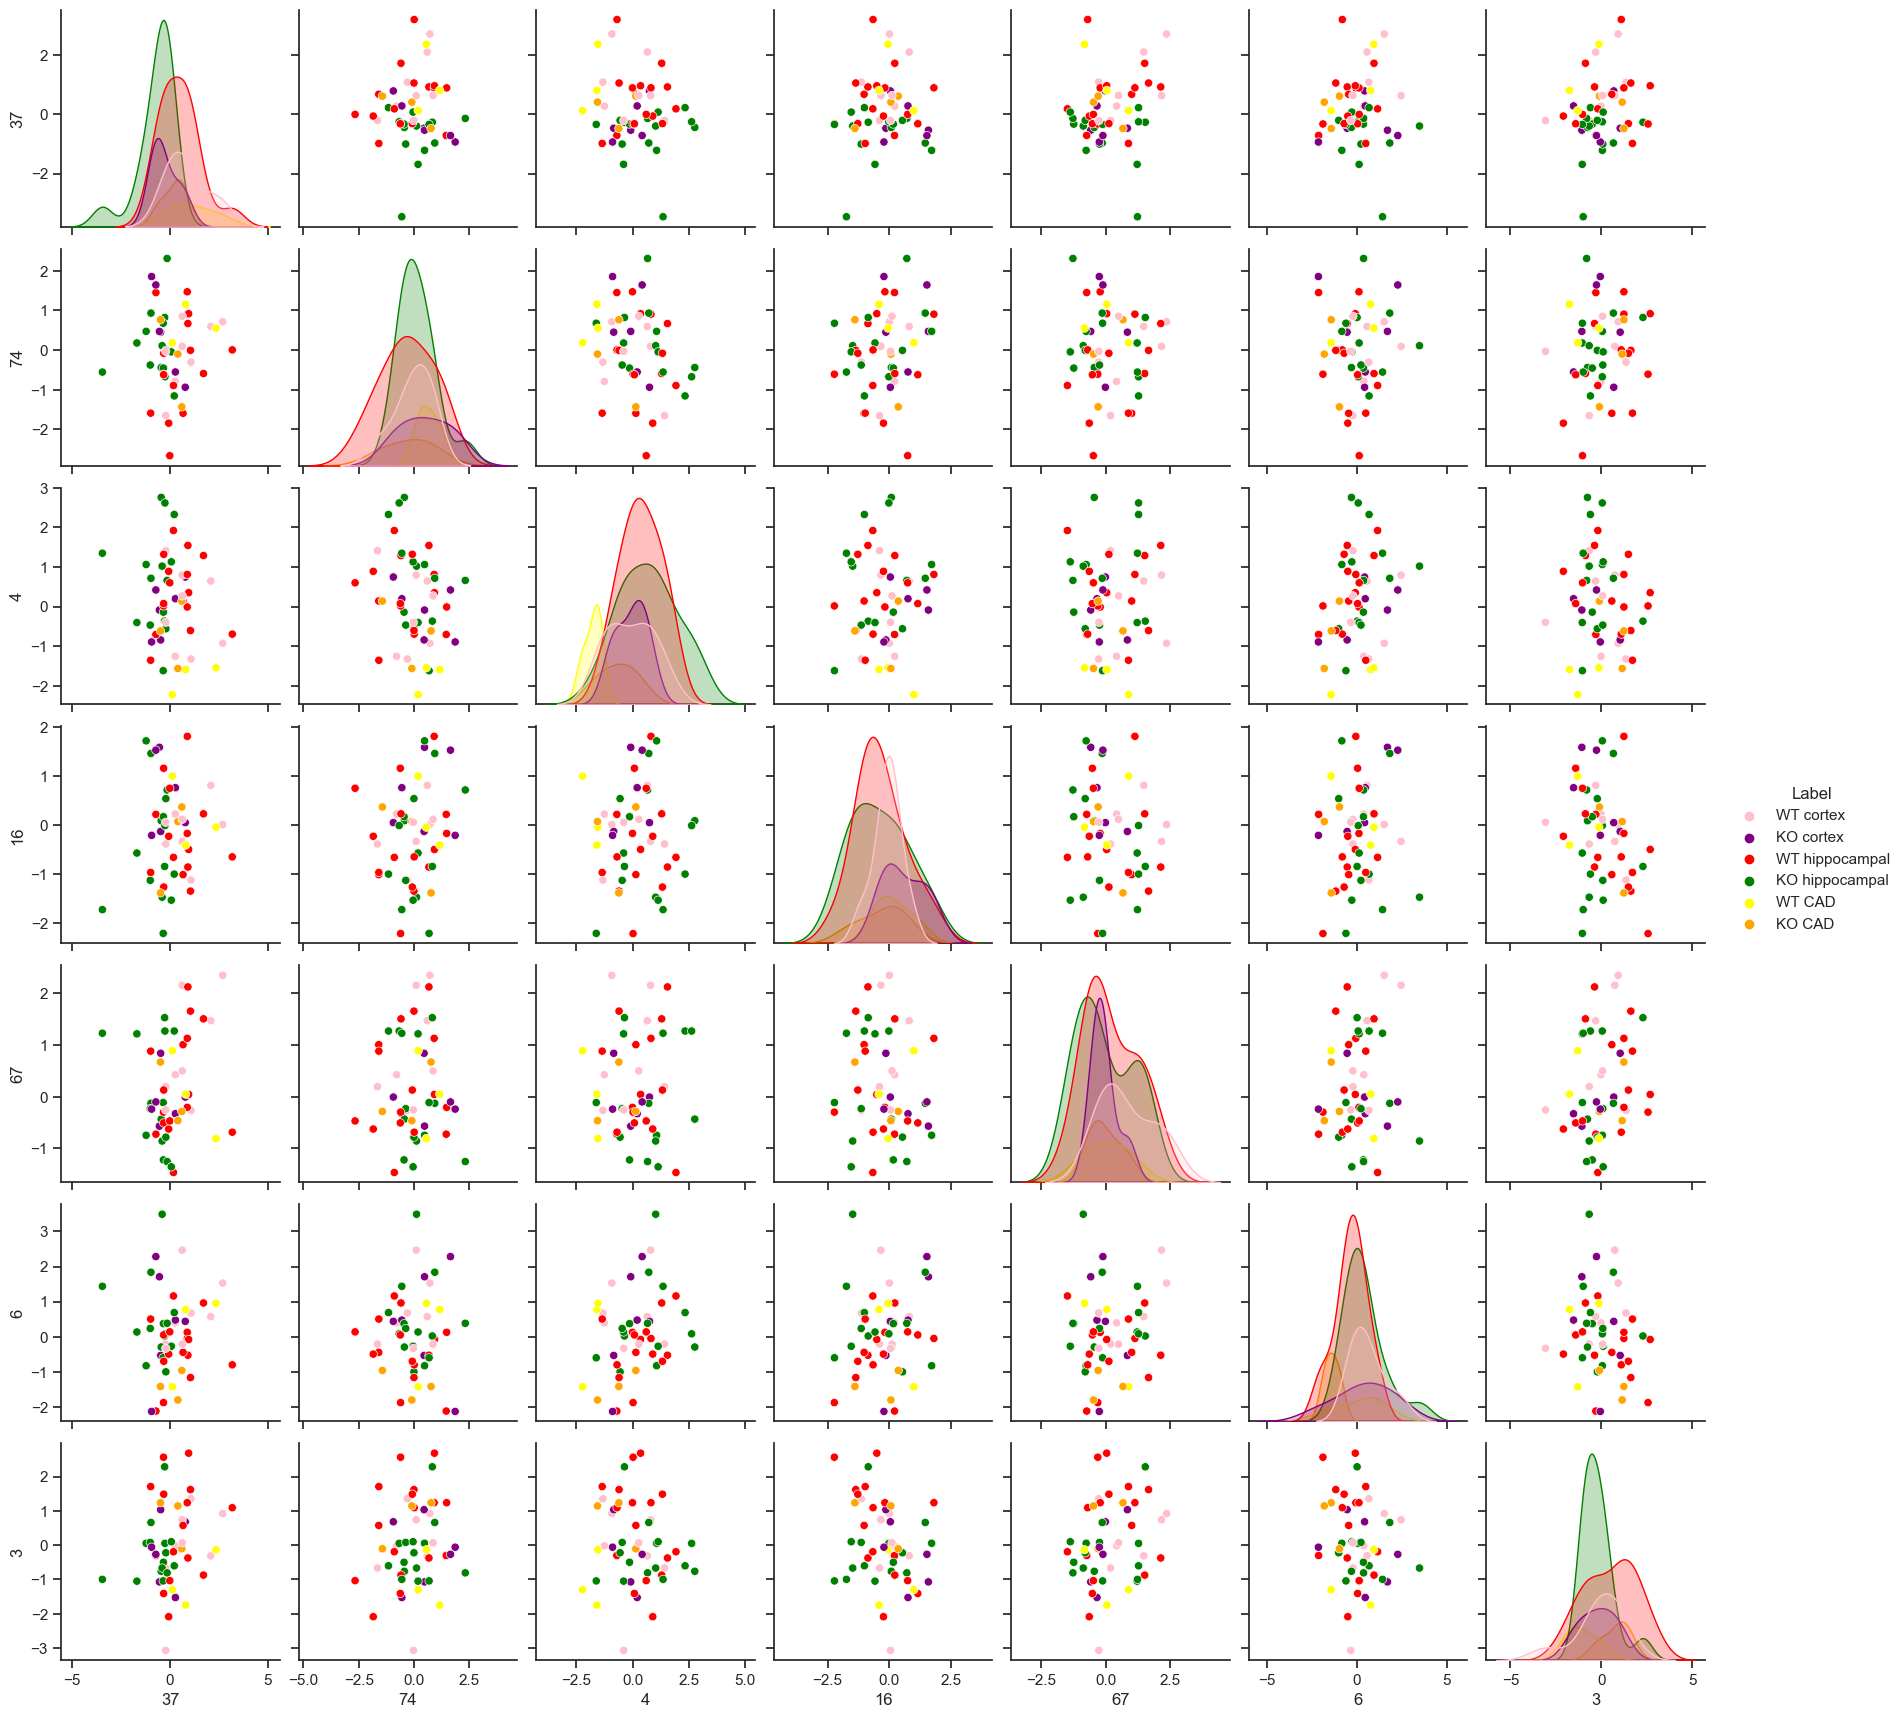

C:\Users\wassila\AppData\Local\Temp\ipykernel_4808\2845366376.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Label'] = str_labels


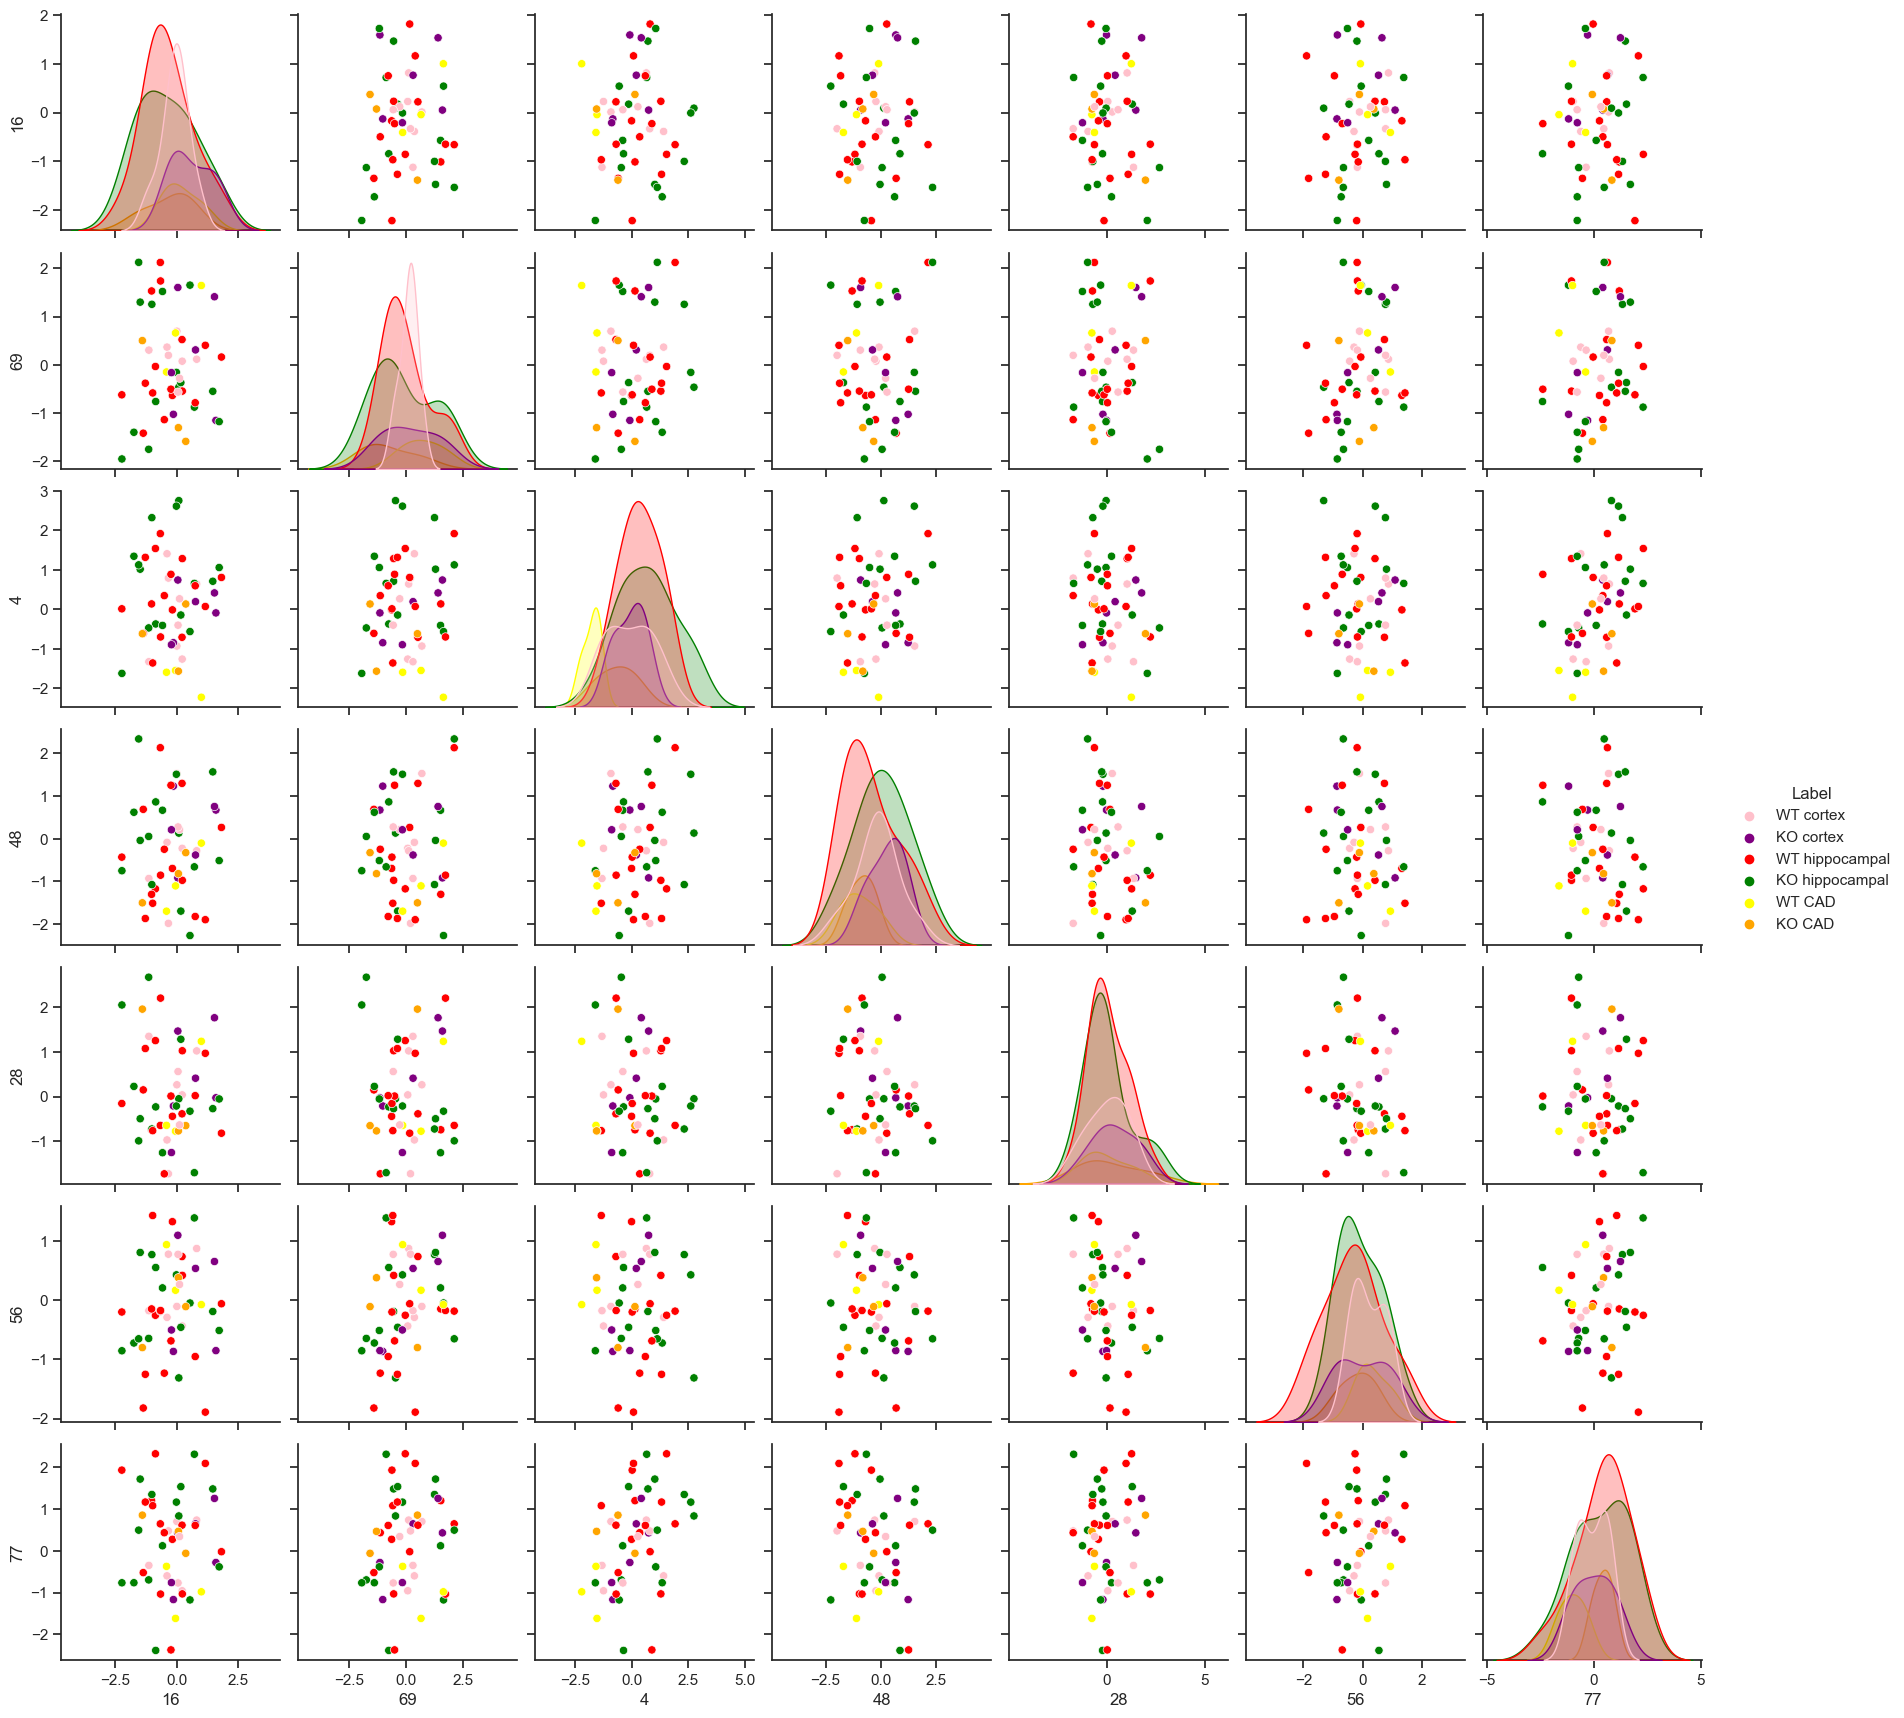

MOL IDENTIFICATION
feature_37
reordered


feature_37
Gene.name            
Lsm2         0.031518
Vezt         0.029394
Fmr1         0.024144
Atat1        0.018769
Mtss1        0.013737
...               ...
Usp34        0.000000
Mlec         0.000000
Ncapd3       0.000000
Spcs3        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_74
reordered


feature_74
Gene.name            
Golga4       0.030176
Ranbp17      0.027623
Fsd1l        0.020844
Sh3kbp1      0.019584
Cux1         0.018730
...               ...
Csnk1a1      0.000000
Ahsa1        0.000000
Rcc2         0.000000
Mrps27       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_4
reordered


feature_4
Gene.name           
Akr1b8      0.030540
Cplx1       0.025467
Cpne1       0.016324
Mcm3        0.016292
Myl6b       0.015685
...              ...
Mapre3      0.000000
Pik3c3      0.000000
Dlgap3      0.000000
Nup98       0.000000
Osbpl10     0.000000

[4889 rows x 1 columns]

feature_16
reordered


feature_16
Gene.name            
Ada          0.022356
Fitm2        0.021403
Chuk         0.013474
Gng10        0.012841
Cend1        0.012158
...               ...
Nrd1         0.000000
Cggbp1       0.000000
Hspa1l       0.000000
Serinc5      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_67
reordered


feature_67
Gene.name            
Scfd1        0.108997
Dazap1       0.039592
Iqgap1       0.031757
Ckap2        0.026413
Srpr         0.017301
...               ...
Gnl3l        0.000000
Ubtd2        0.000000
Bud31        0.000000
Dclk2        0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_6
reordered


feature_6
Gene.name           
Ckap4       0.085954
Crmp1       0.056824
Gapdh       0.046656
Ankrd54     0.026376
Scrn1       0.018891
...              ...
Lsm14a      0.000000
Hmox1       0.000000
Rplp0       0.000000
Agfg1       0.000000
Siae        0.000000

[4889 rows x 1 columns]

feature_3
reordered


feature_3
Gene.name           
Galns       0.021502
Bmp1        0.015977
Marcksl1    0.014828
Twsg1       0.014670
Nos1        0.014525
...              ...
Nat10       0.000000
Abcf3       0.000000
Diras2      0.000000
Cntfr       0.000000
Osbpl10     0.000000

[4889 rows x 1 columns]

           feature_37  feature_74  feature_4  feature_16  feature_67  \
Gene.name                                                              
Lsm2                1           0          0           0           0   
Vezt                1           0          0           0           0   
Fmr1                1           1          0           1           0   
Atat1               1           0          0           0           0   
Mtss1               1           0          0           1           0   

           feature_6  feature_3  
Gene.name                        
Lsm2               0          0  
Vezt               0          0  
Fmr1               1          1  
Atat1              0          0  
Mtss1              0          0  
feature_16
reordered


feature_16
Gene.name            
Ada          0.022356
Fitm2        0.021403
Chuk         0.013474
Gng10        0.012841
Cend1        0.012158
...               ...
Nrd1         0.000000
Cggbp1       0.000000
Hspa1l       0.000000
Serinc5      0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_69
reordered


feature_69
Gene.name            
Ada          0.045035
Twsg1        0.023814
Dhfr         0.023424
Fmr1         0.017567
Lsm2         0.017335
...               ...
Klhl13       0.000000
Smg5         0.000000
Kdm3b        0.000000
Zc3h4        0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_4
reordered


feature_4
Gene.name           
Akr1b8      0.030540
Cplx1       0.025467
Cpne1       0.016324
Mcm3        0.016292
Myl6b       0.015685
...              ...
Mapre3      0.000000
Pik3c3      0.000000
Dlgap3      0.000000
Nup98       0.000000
Osbpl10     0.000000

[4889 rows x 1 columns]

feature_48
reordered


feature_48
Gene.name            
Fbxo3        0.027651
Wwox         0.026923
Phf5a        0.023249
Cdc27        0.016205
Ddt          0.012962
...               ...
Snrnp40      0.000000
Abhd10       0.000000
Pik3c3       0.000000
Dlgap3       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

feature_28
reordered


feature_28
Gene.name            
Fmnl2        0.029404
Lsm2         0.023662
Rai14        0.013692
Srek1        0.013141
Diras2       0.012709
...               ...
Copa         0.000000
Sidt2        0.000000
Prmt5        0.000000
Cdc123       0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_56
reordered


feature_56
Gene.name            
Ddah1        0.063826
Ap1s2        0.025736
Plxnd1       0.023483
Akap7        0.021510
Heatr6       0.020755
...               ...
Cand1        0.000000
Larp1        0.000000
Kdm1a        0.000000
Igsf3        0.000000
Oxa1l        0.000000

[4889 rows x 1 columns]

feature_77
reordered


feature_77
Gene.name            
Ptpn6        0.054163
Cyb5r1       0.047743
Cplx1        0.023411
Fgfr1        0.016525
Gnaq         0.015706
...               ...
Ppp1r9b      0.000000
Cenpe        0.000000
Vkorc1l1     0.000000
Ift172       0.000000
Osbpl10      0.000000

[4889 rows x 1 columns]

           feature_16  feature_69  feature_4  feature_48  feature_28  \
Gene.name                                                              
Ada                 1           1          1           1           0   
Fitm2               1           0          0           0           0   
Chuk                1           0          0           0           0   
Gng10               1           0          0           0           0   
Cend1               1           0          0           0           0   

           feature_56  feature_77  
Gene.name                          
Ada                 1           0  
Fitm2               0           0  
Chuk                0           0  
Gng10               0           0  
Cend1               0           0  


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import xgboost as xgb
import re
from collections import Counter
from functools import reduce
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from sklearn.preprocessing import LabelEncoder
#from tabpfn import TabPFNClassifier


data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv", sep=",")

data_copy=data.copy(deep=True)
data_copy=data_copy.set_index(data_copy.columns[0]) 
#display(data_copy)
del data['Gene.name']
                  
t_data =data.transpose()
#display(t_data)


#######################################################################################################################################
#####################################SELECTION DES FEATURES############################################################################

#####labels
labels=[]

for index in t_data.index:
    row_name = index
    #print(row_name.lower())

    #if "wt"in row_name.lower():
        #labels.append(0)
    #elif "ko" in row_name.lower() and "id_28772" in row_name.lower():
        #labels.append(1)
    #elif "ko" in row_name.lower() and "id_29104" in row_name.lower():
        #labels.append(1)
    #elif "ko" in row_name.lower() and "id_32234" in row_name.lower():
        #labels.append(1)
    #elif "ko" in row_name.lower() and "id_32510" in row_name.lower():
        #labels.append(2)
    #elif "ko" in row_name.lower() and "id_33199" in row_name.lower():
        #labels.append(3)
    #elif "ko" in row_name.lower() and "id_33931"in row_name.lower():
        #labels.append(3)

    if "wt" in row_name.lower() and "id_28772" in row_name.lower():
        labels.append(0)
    elif "wt" in row_name.lower() and "id_29104" in row_name.lower():
        labels.append(1)
    elif "wt" in row_name.lower() and "id_32234" in row_name.lower():
        labels.append(2)
    elif "wt" in row_name.lower() and "id_32510" in row_name.lower():
        labels.append(3)
    elif "wt" in row_name.lower() and "id_33199" in row_name.lower():
        labels.append(4)
    elif "wt" in row_name.lower() and "id_33931" in row_name.lower():
        labels.append(5)

    elif "ko" in row_name.lower() and "id_28772" in row_name.lower():
        labels.append(6)
    elif "ko" in row_name.lower() and "id_29104" in row_name.lower():
        labels.append(7)
    elif "ko" in row_name.lower() and "id_32234" in row_name.lower():
        labels.append(8)
    elif "ko" in row_name.lower() and "id_32510" in row_name.lower():
        labels.append(9)
    elif "ko" in row_name.lower() and "id_33199" in row_name.lower():
        labels.append(10)
    elif "ko" in row_name.lower() and "id_33931" in row_name.lower():
        labels.append(11)

# Check the 'labels' list
print(labels)

########

latent_space= pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv', sep=",")
latent_space.set_index(latent_space.columns[0], inplace=True)


X = latent_space
y = labels

x = 7

methods= input("select a method to choose your features:\n if Random forest press 'rf'\n if XGboost press 'xgb', if you want multiple approaches you can put multiple options separated by a ',' exemple: 'dt, rf, xgb'")
methods=methods.lower()

#split methods over ,
methods = [item.strip() for item in methods.split(',')]
print(len(methods))

results={}

for method in methods:

        
    if method == 'xgb':

        if not os.path.exists(".\integration_horizontale\Resultats_VAE\\xgb"):
            os.makedirs(".\integration_horizontale\Resultats_VAE\\xgb")

        if not os.path.exists(".\integration_horizontale\Enrichissement\\xgb"):
            os.makedirs(".\integration_horizontale\Enrichissement\\xgb")

        # Number of trees to examine
        num_trees = int(input("number of trees for xgb"))

        clf = xgb.XGBClassifier(n_estimators=num_trees, random_state=42)
        le = LabelEncoder()
        y=le.fit_transform(y) 
        clf.fit(X, y)

        importance_scores = clf.feature_importances_

        # Create a list of (feature_index, importance_score) pairs
        feature_importance_list = list(enumerate(importance_scores))

        # Sort the list by importance score in descending order
        sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

        # Get the x most important features
        selected_features = sorted_feature_importance[:x]
        print(selected_features)
        selected_features = [t[0] for t in selected_features]

        # Print the selected features and their importance scores
        #for feature_index, importance_score in selected_features:
            #print(f"Feature {feature_index}: Importance Score = {importance_score}")

        results[method] = selected_features
        

    elif method == "rf":

        if not os.path.exists(".\integration_horizontale\Resultats_VAE\\rf"):
            os.makedirs(".\integration_horizontale\Resultats_VAE\\rf")

        if not os.path.exists(".\integration_horizontale\Enrichissement\\rf"):
            os.makedirs(".\integration_horizontale\Enrichissement\\rf")
        
        selected_features=[]
        
        num_trees = int(input("number of trees for rf"))

        #param_dist = {'n_estimators': [num for num in range(100, 1001) if num % 100 == 0]}
        #rf = RandomForestClassifier()
        #randomized_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)
        #randomized_search.fit(X, y)
        #best_params = randomized_search.best_params_
        #print(best_params)


        #rf = RandomForestClassifier(**best_params)
        
        rf = RandomForestClassifier(n_estimators=num_trees, random_state=42)
        rf.fit(X, y)

        # Get feature importances
        importances = rf.feature_importances_

        # Get the indices that would sort the importances in descending order
        indices = np.argsort(importances)[::-1]

        # Get the feature names in the order of importance
        feature_names = X.columns

        # Print the top 7 features and their importance scores
        print("Top x most important features:")
        for f in range(x):
            selected_features.append(int(feature_names[indices[f]]))
            print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")
        

        results[method]=selected_features

        #print(selected_features)


    else:
        method= input("select a method to choose your features:\n if Random forest press 'rf'\n if XGboost press 'xgb'")
        method=method.lower()


####################################################################### TO COMPARE THE 3 METHODS

#######PAIRPLOT

#LABELS 1/0 into WT/KO
#label_mappings = {
    #0: "WT",
    #1: "hippocampal",
    #2: "CAD",
    #3: "cortex"
#}

label_mappings = {
    0: "WT hippocampal",
    1: "WT hippocampal",
    2: "WT hippocampal",
    6: "KO hippocampal",
    7: "KO hippocampal",
    8: "KO hippocampal",

    4: "WT cortex",
    5: "WT cortex",
    10: "KO cortex",
    11: "KO cortex",

    3: "WT CAD",
    9: "KO CAD"
}

# Apply the mapping to create a list of string labels
#print(labels)
str_labels = [label_mappings[num] if num in label_mappings else f"Label_{num}" for num in labels]
print(str_labels)

for key in results:

    #print(key)

    liste=results[key]

    #print(liste)
    selected_columns = latent_space.iloc[:,liste]

    # Create a custom color palette for the labels
    #palette = {"WT": 'red',  
               #"hippocampal": 'green',
               #"CAD": 'yellow',
               #"cortex": 'orange'}
    
    palette = {"WT hippocampal": 'red',  
               "KO hippocampal": 'green',
               "WT CAD": 'yellow',
               "KO CAD": 'orange',
               "WT cortex": 'pink',
               "KO cortex": 'purple'}

    # Add the 'Label' column to the DataFrame for use with 'hue' parameter
    selected_columns['Label'] = str_labels

    #display(selected_columns)

    # Create a pairplot with the specified colors
    sns.set(style="ticks")
    pairplot=sns.pairplot(selected_columns, hue="Label", palette=palette)

    pairplot.savefig(f".\integration_horizontale\Resultats_VAE\{key}_pairplot.png")

    # Show the plot
    plt.show()
    
    plt.close()



#######################################################################################################################################
#####################################GET THE MOLECULES IN EACH SELECTED FEATURE###########################################################

X=t_data.values

#latent_space= pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv')
print("MOL IDENTIFICATION")


for method in methods:

    selected_features=results[method]

    df_list=[]
    binary_df_list=[]

    for feature in selected_features:
        

        column = latent_space.iloc[:, feature]

        y= column.values

        ### Je tourne le modele de randomm forest regression
        rf = RandomForestRegressor(n_estimators=100, random_state=42) 
        rf.fit(X, y)

        # Récupération des molecules avec leur score d'importance
        importances = rf.feature_importances_
        df_importances=pd. DataFrame(importances)
        df_importances.rename(columns={df_importances.columns[0]: f'feature_{feature}'},inplace=True)
        

        df_importances['Gene.name'] = data_copy.index
        df_importances = df_importances.set_index('Gene.name')
        
        df_list.append(df_importances)

        ###################### sorting by importance and selecting top mol

        # Sort the DataFrame based on the 'Value' column in descending order
        df_importances2 = df_importances.sort_values(by=f'feature_{feature}', ascending=False)
        print(f'feature_{feature}')
        print('reordered')
        display(df_importances2)

        # Define the number of rows (x) you want to set to 1
        x = 50

        # 1 for the first x rows, and 0 for the rest
        df_importances2[f'feature_{feature}'] = [1 if i < x else 0 for i in range(len(df_importances2))]
        binary_df_list.append(df_importances2)

    # Affichage des variables d'importance
    combined_df = pd.concat(df_list, axis=1)
    #print(combined_df.head())

    combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_molecules_importance_in_features.csv', index=True)

    #binary_combined_df = pd.concat(binary_df_list, axis=1, ignore_index=True)
    binary_combined_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), binary_df_list)
    print(binary_combined_df.head())
        
    binary_combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv', index=True)


for index in t_data.index:
    #print(index)
    row_name = index
    if "wt" and "id_28772" in row_name.lower():
        labels.append(1)
    elif "ko" and "id_28772" in row_name.lower():
        labels.append(0)

    elif "wt" and "id_29104" in row_name.lower():
        labels.append(2)
    elif "ko" and "id_29104" in row_name.lower():
        labels.append(0)
    
    elif "wt" and "id_32234" in row_name.lower():
        labels.append(3)
    elif "ko" and "id_32234" in row_name.lower():
        labels.append(0)

    elif "wt" and "id_32510" in row_name.lower():
        labels.append(4)
    elif "ko" and "id_32510" in row_name.lower():
        labels.append(0)

    elif "ko" and "id_33199" in row_name.lower():
        labels.append(5)
    elif "ko" and "id_33199" in row_name.lower():
        labels.append(0)

    elif "ko" and "id_33931"in row_name.lower():
        labels.append(6)
    elif "ko" and "id_33931"in row_name.lower():
        labels.append(0)

['feature_37', 'feature_74', 'feature_4', 'feature_16', 'feature_67', 'feature_6', 'feature_3', 'feature_69', 'feature_48', 'feature_28', 'feature_56', 'feature_77']
feature_16


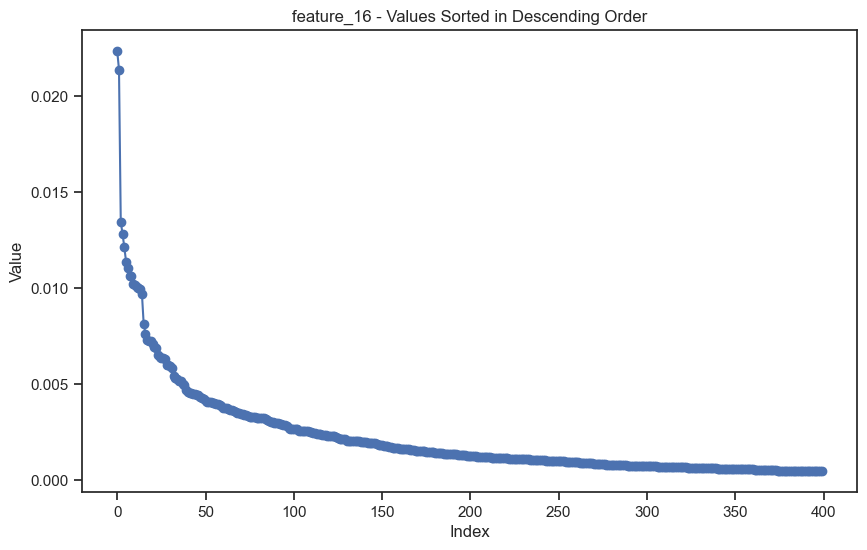

feature_69


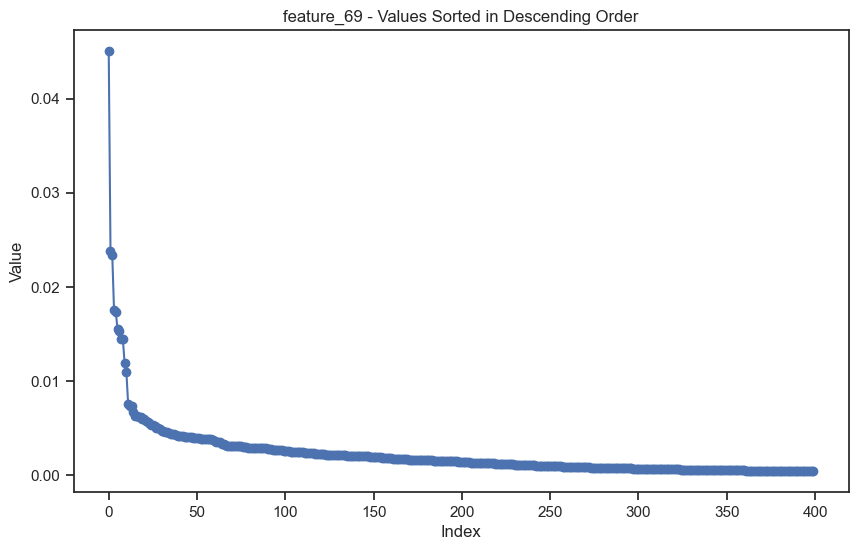

feature_4


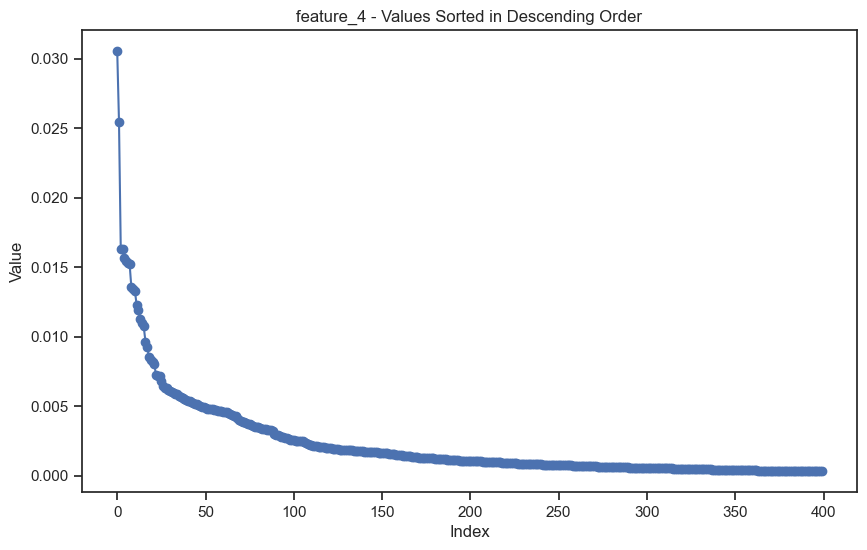

feature_48


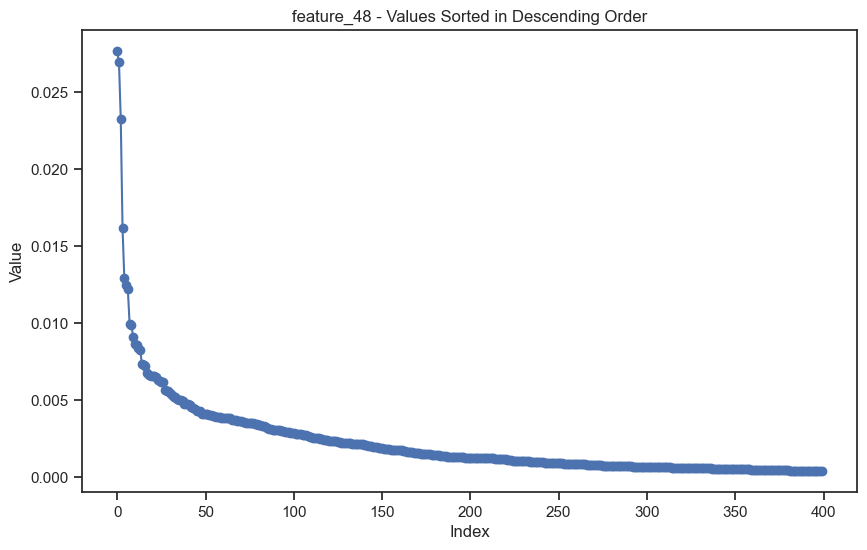

feature_28


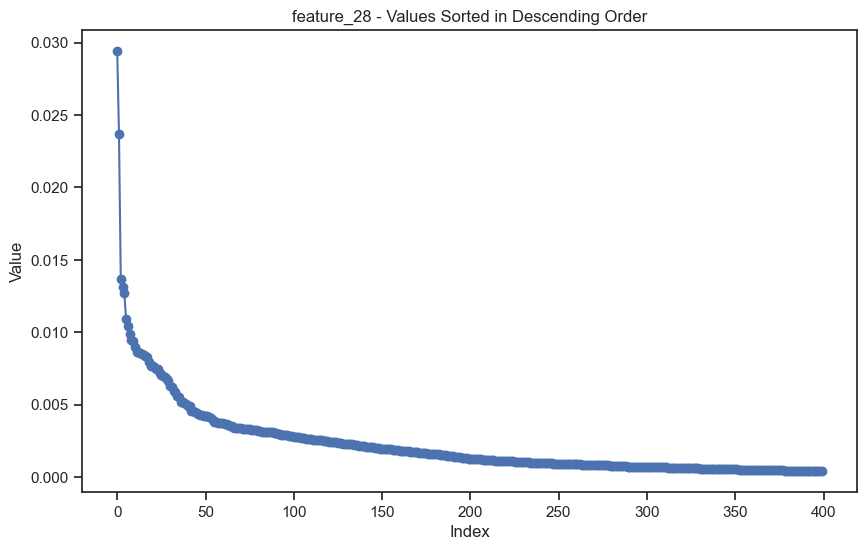

feature_56


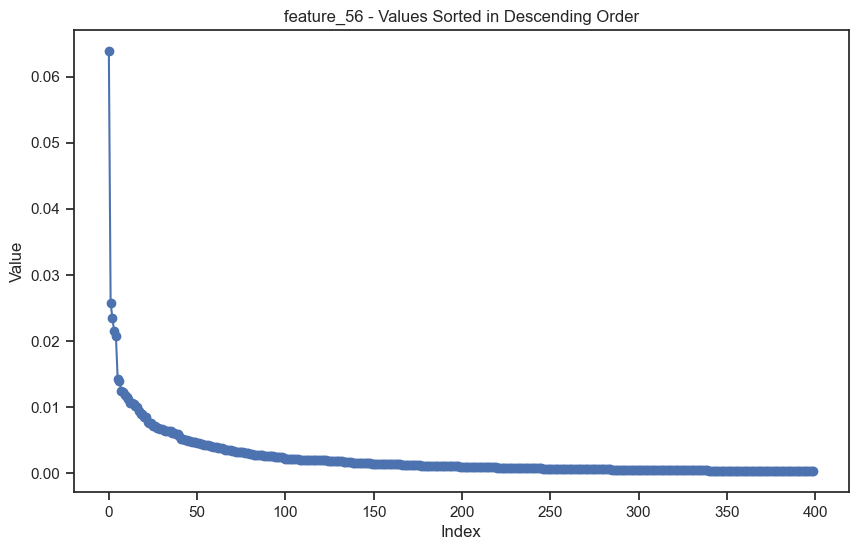

feature_77


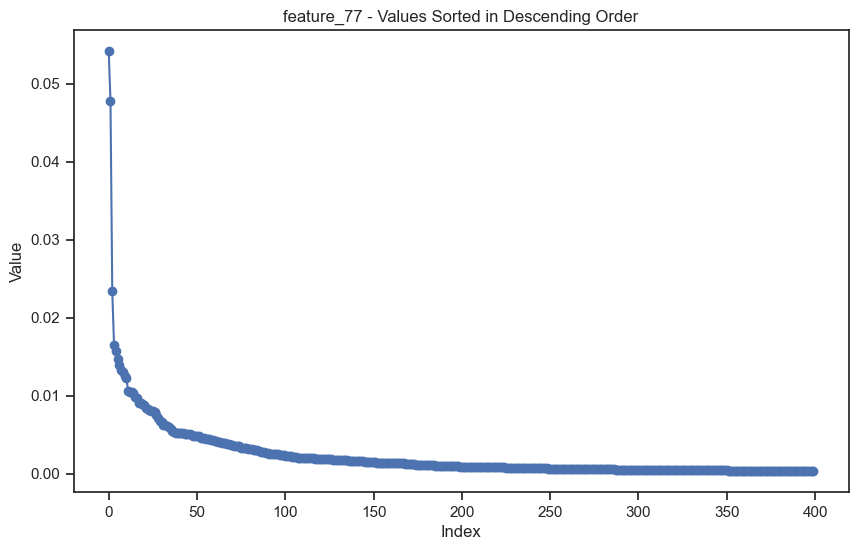

feature_16


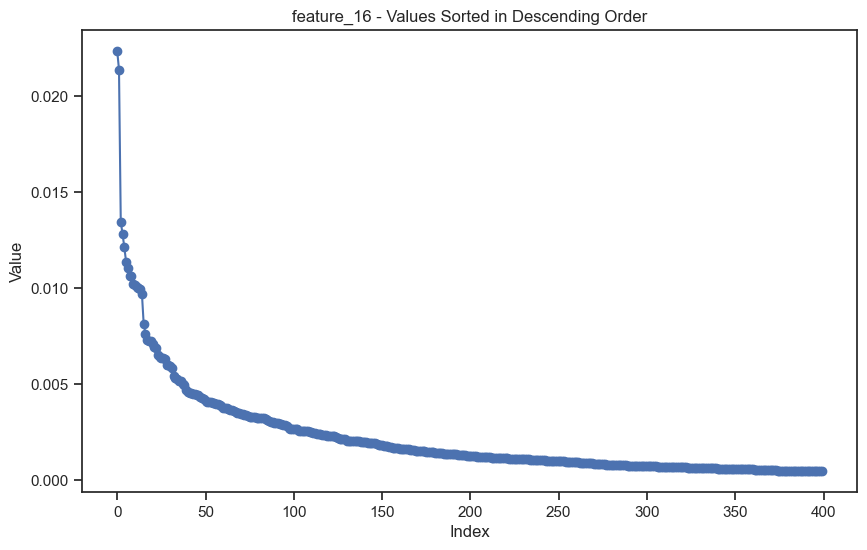

feature_69


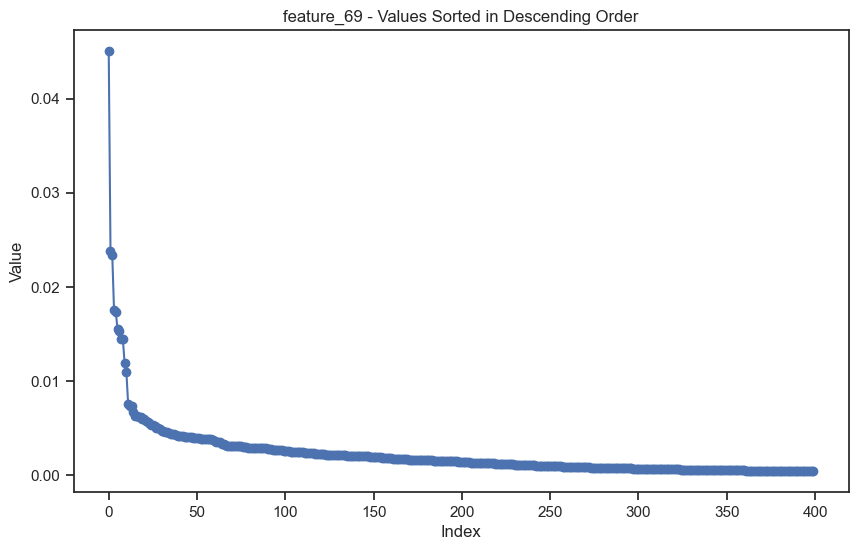

feature_4


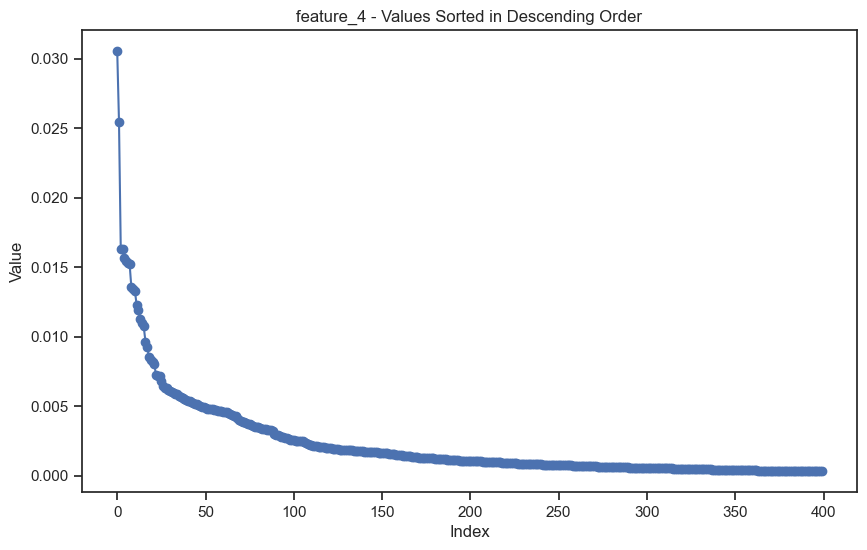

feature_48


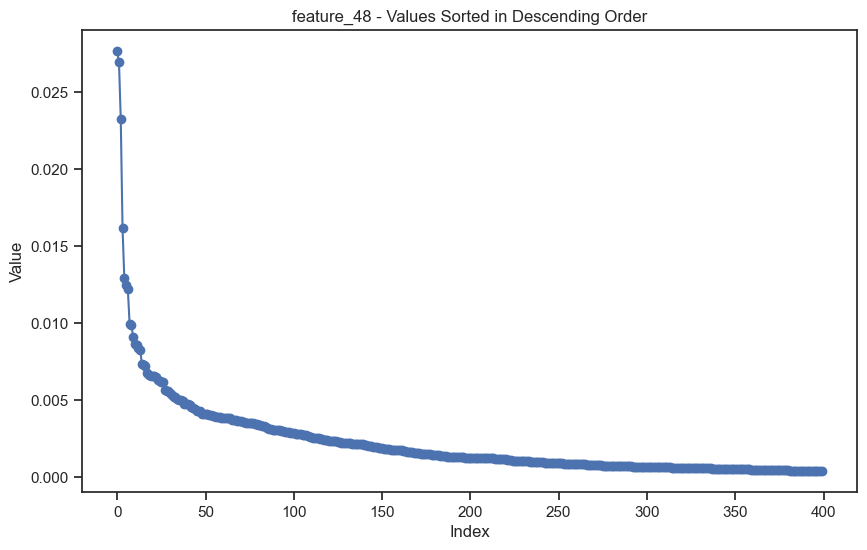

feature_28


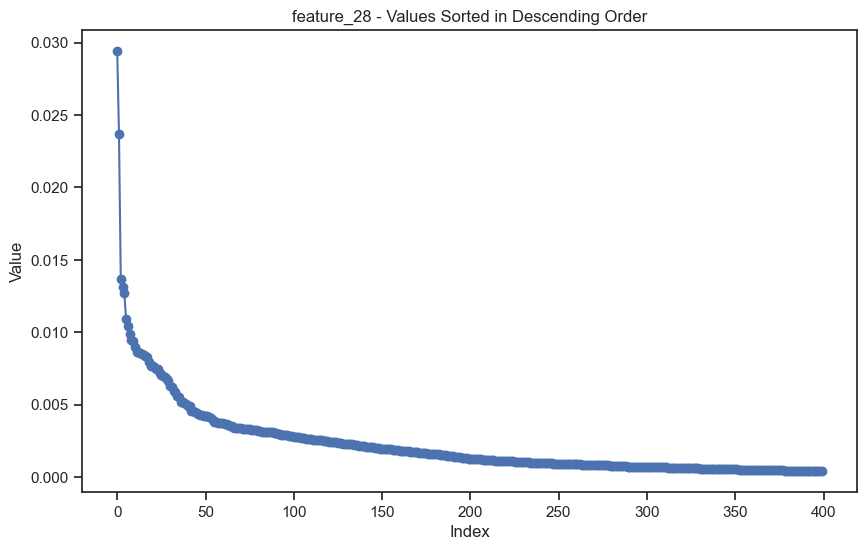

feature_56


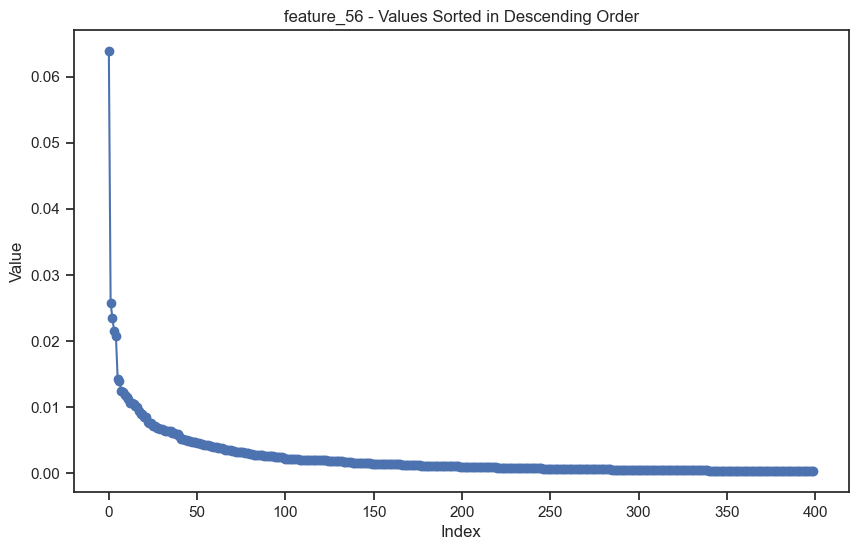

feature_77


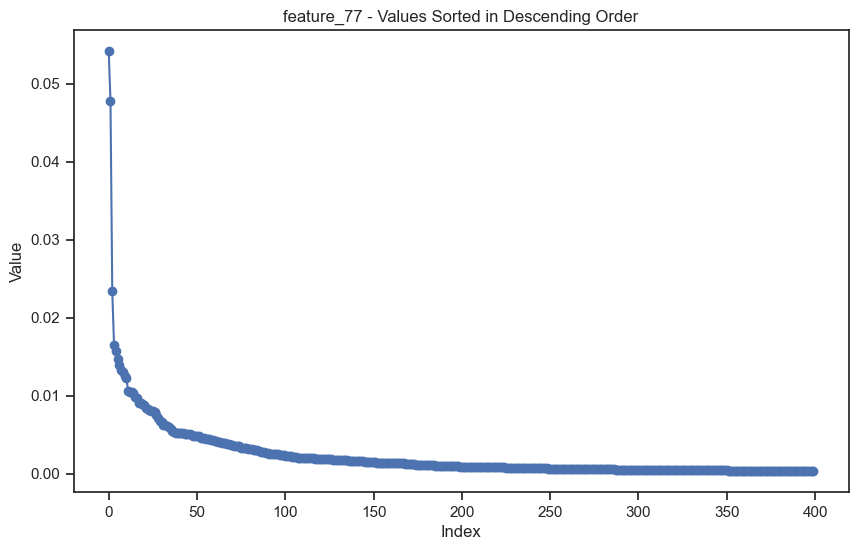

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


features_all_methods=[]

for method in methods:

    df = pd.read_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_molecules_importance_in_features.csv')
    df = df.drop("Gene.name", axis=1)
    features=df.columns
    
    features_all_methods.append(features)

unique_values = []

# Iterate through the list of lists
for sub_list in features_all_methods:
    for item in sub_list:
        # Check if the item is not already in the unique_values list
        if item not in unique_values:
            unique_values.append(item)

print(unique_values)

for method in methods:

    for column in df.columns:

        print(column)
        
        if column in unique_values:

            df_sorted = df[column].sort_values(ascending=False).reset_index(drop=True)

            start_index = 0
            end_index = 400
            df_subset = df_sorted.iloc[start_index:end_index]
                    
            plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
            plt.plot(df_subset, marker='o', linestyle='-')
                
            plt.xlabel('Index')
            plt.ylabel('Value')
            plt.title(f'{column} - Values Sorted in Descending Order')
                
            plt.show()


           feature_37  feature_74  feature_4  feature_16  feature_67  \
Gene.name                                                              
Lsm2                1           0          0           0           0   
Vezt                1           0          0           0           0   
Fmr1                1           1          0           1           0   
Atat1               1           0          0           0           0   
Mtss1               1           0          0           1           0   
...               ...         ...        ...         ...         ...   
Usp34               0           1          0           0           0   
Mlec                0           0          0           0           0   
Ncapd3              0           0          0           0           0   
Spcs3               0           0          0           0           0   
Osbpl10             0           0          0           0           0   

           feature_6  feature_3  
Gene.name                    

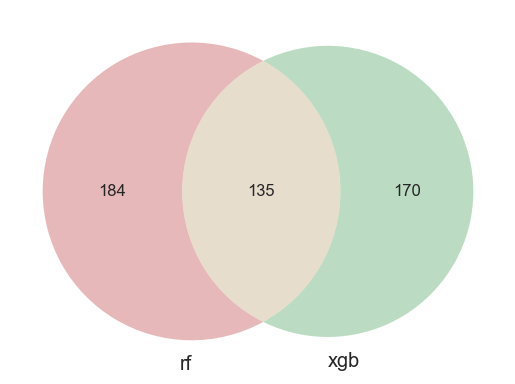

shared mol
['Lsm2', 'Fmr1', 'Mtss1', 'Macf1', 'Pbxip1', 'Ntm', 'Lrch3', 'Bbs1', 'Rsu1', 'Tex9', 'Glipr2', 'Cnot4', 'Fmr1', 'Ube2c', 'Zmym4', 'Chuk', 'Gap43', 'Wwox', 'Ranbp17', 'Rai14', 'Dek', 'Fsd1l', 'Cdc27', 'Ttc12', 'Fnbp4', 'Stag1', 'Ankrd44', 'Prkar2b', 'Cplx1', 'Shd', 'G6pdx', 'Lactb2', 'Ada', 'Ugdh', 'Myh9', 'Mcm3', 'Ddah1', 'Ddah2', 'Rrbp1', 'Hk2', 'Phb2', 'Akr1b8', 'Rps21', 'Cggbp1', 'Nkap', 'Bace1', 'Rab11a', 'Npc1', 'Lrrc8c', 'Lyrm4', 'Polr3b', 'Stmn2', 'Ccdc92', 'Bag2', 'Fundc1', 'Nfkb2', 'Adi1', 'Tmem263', 'Rab6b', 'Vasp', 'Lmna', 'Aak1', 'Mthfd1l', 'Ppp1r7', 'Rcn1', 'Nrp2', 'Prdx4', 'Osbpl8', 'Tln1', 'Ercc6l', 'Cpne1', 'Vps37a', 'Myl6b', 'Ostf1', 'Vat1', 'Ralgapa1', 'Acaca', 'Fmr1', 'Mtss1', 'Rsu1', 'Glipr2', 'Pabpc1', 'Chuk', 'Ada', 'Gap43', 'Flnb', 'Fitm2', 'Stmn1', 'Rgl1', 'Gclm', 'L3hypdh', 'B3gntl1', 'Acaa1b', 'Szrd1', 'Rims2', 'Eif1a', 'Tubb6', 'Gas1', 'Phpt1', 'Arpc3', 'Pter', 'Lyrm4', 'Fzd3', 'Gar1', 'Wasl', 'Pgpep1', 'Cd2ap', 'Ybx3', 'Cend1', 'Dctn3', 'Ndufs5', 

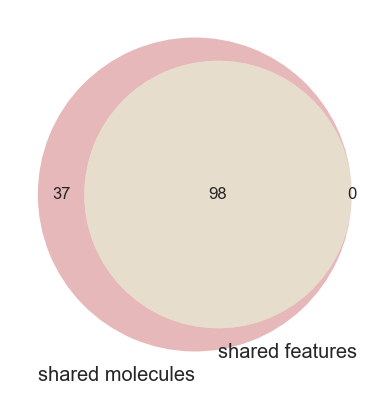

Gene.name  id_33931071_M_P_P_WT_rep1_33931071  \
0         Odf2                            0.000015   
1      Tmem245                            0.000288   
2          Aip                            0.000842   
3      Csnk2a2                            0.001100   
4        Cops6                            0.002150   
...        ...                                 ...   
4884     Sart1                            0.000708   
4885     Top3b                            0.000189   
4886     Itpr2                            0.000295   
4887     Kcnq2                            0.000261   
4888   Osbpl10                            0.000083   

      id_33931071_M_P_P_WT_rep2_33931071  id_33931071_M_P_P_WT_rep3_33931071  \
0                               0.000012                            0.000009   
1                               0.000232                            0.000157   
2                               0.000666                            0.000490   
3                               0.000907                            0.000643   
4                               0.001665                            0.001133   
...                                  ...                                 ...   
4884                            0.000572                            0.000489   
4885                            0.000155                            0.000101   
4886                            0.000256                            0.000160   
4887                            0.000265                            0.000103   
4888                            0.000083                            0.000032   

      id_33931071_M_P_P_WT_rep4_33931071  id_33931071_M_P_P_KO_rep1_33931071  \
0                               0.000011                            0.000015   
1                               0.000203                            0.000274   
2                               0.000597                            0.000764   
3                               0.000778                            0.001006   
4                               0.001421                            0.002012   
...                                  ...                                 ...   
4884                            0.000569                            0.000674   
4885                            0.000132                            0.000180   
4886                            0.000216                            0.000279   
4887                            0.000189                            0.000254   
4888                            0.000062                            0.000077   

      id_33931071_M_P_P_KO_rep2_33931071  id_33931071_M_P_P_KO_rep3_33931071  \
0                               0.000013                            0.000014   
1                               0.000260                            0.000278   
2                               0.000614                            0.000688   
3                               0.000885                            0.000918   
4                               0.001736                            0.001867   
...                                  ...                                 ...   
4884                            0.000543                            0.000596   
4885                            0.000150                            0.000168   
4886                            0.000255                            0.000277   
4887                            0.000265                            0.000282   
4888                            0.000074                            0.000076   

      id_33931071_M_P_P_KO_rep4_33931071  id_33931071_M_P_P_WT_rep5_33931071  \
0                               0.000012                            0.000016   
1                               0.000202                            0.000260   
2                               0.000537                            0.000799   
3                               0.000699                            0.001040   
4                               0.001418                            0.002

12791


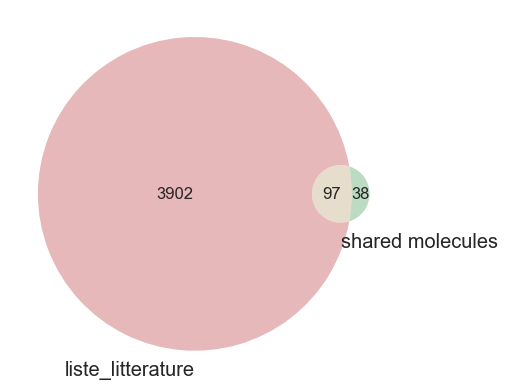

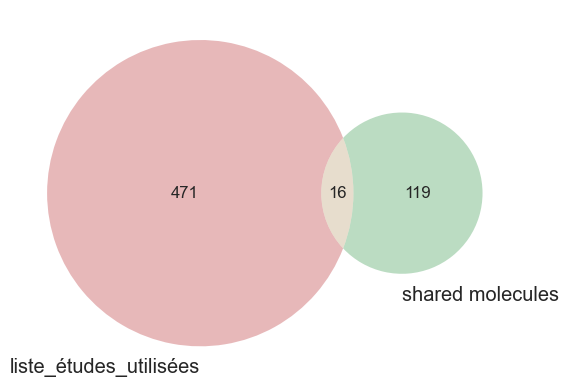

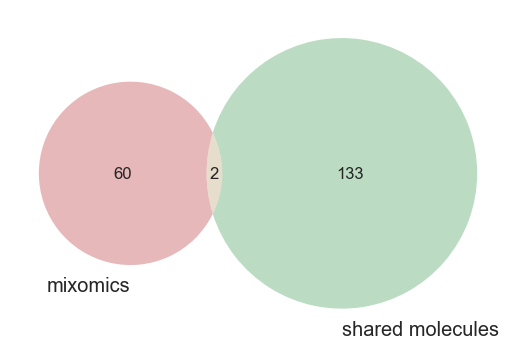

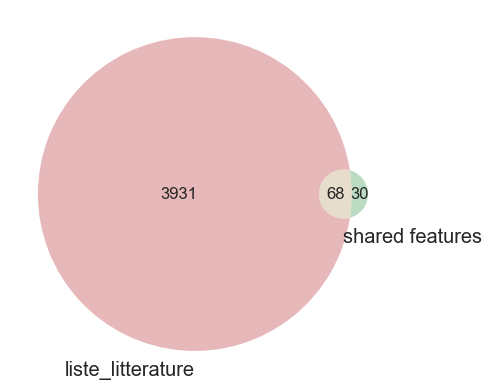

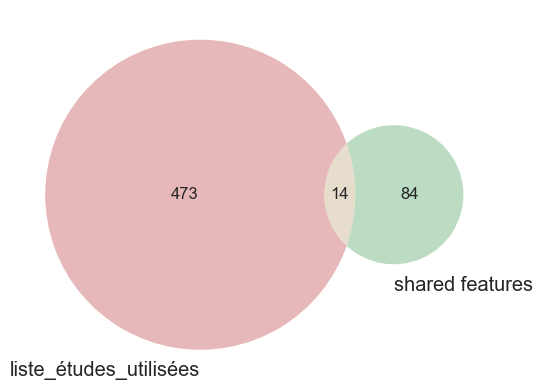

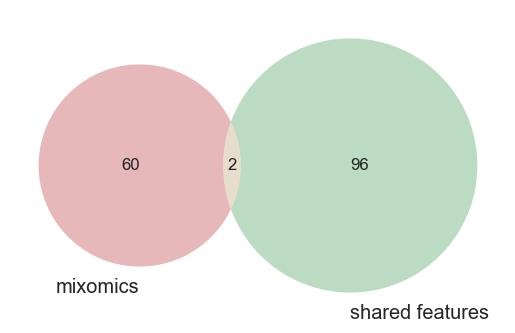

In [2]:
from matplotlib_venn import venn2
import pandas as pd
import os
import matplotlib.pyplot as plt

########SHARED MOLECULES

combat='n'
min_max='y'
combatseq='n'

lists_to_compare=[]

for method in methods:

    
    df= pd.read_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv')
    df.set_index(df.columns[0], inplace=True)
    print(df)
    
    gene_lists=[]

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Use the 'loc' function to get the indices where the value is 1
        indices = df[df[column] == 1].index.tolist()
        # Store the indices in the dictionary
        gene_lists.append(indices)
    
    flat_list = [item for sublist in gene_lists for item in sublist]
    lists_to_compare.append(flat_list)

print('lists to compare')
print(lists_to_compare)


###venn of molecules
venn2(subsets=(set(lists_to_compare[0]), set(lists_to_compare[1])), set_labels=('rf', 'xgb'))
plt.show()
plt.close()

out = [x for x in lists_to_compare[0] if x in lists_to_compare[1]]
print('shared mol')
print(out)
out = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in out]
out = [s.lower() for s in out]
print(out)

# Create a DataFrame
df = pd.DataFrame(set(out), columns=['Gene.name'])

df.to_csv(f'.\integration_horizontale\Resultats_VAE\\shared_important_molecules.csv', index=False)

###############SHARED FEATURES

list_features=[]

for method in methods:

    selected_features=results[method]
    list_features.append(selected_features)
    print(selected_features)

result_list = set(list_features[0]).intersection(set(list_features[1]))

#shared features
print('shared features')
print(result_list)

columns_to_select = result_list

#open df
df= pd.read_csv(f'.\integration_horizontale\Resultats_VAE\\{methods[0]}\\{methods[0]}_important_molecules_for_each_feature.csv')
df.set_index(df.columns[0], inplace=True)

str_list = ["feature_" + str(num) for num in list(columns_to_select)]


selected_columns = df[str_list]

selected_columns.to_csv(f'.\integration_horizontale\Resultats_VAE\\shared_features_important_molecules_for_each_feature.csv', index=True)

############################################################################################################################

df= pd.read_csv('.\integration_horizontale\Resultats_VAE\\shared_features_important_molecules_for_each_feature.csv')
df.set_index(df.columns[0], inplace=True)


gene_lists=[]

# Iterate through each column in the DataFrame
for column in df.columns:
    # Use the 'loc' function to get the indices where the value is 1
    indices = df[df[column] == 1].index.tolist()

    gene_lists.append(indices)

# Print the dictionary containing the index lists
#print(gene_dict)

unique_genes = []

# Iterate through the sublists and add unique elements to the new list
for sublist in gene_lists:
    for item in sublist:
        if item not in unique_genes:
            unique_genes.append(item)

unique_genes = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in unique_genes]
unique_genes = [s.lower() for s in unique_genes]

print(unique_genes)

# venn shared mol vs shared features

venn2([set(out), set(unique_genes)], ('shared molecules', 'shared features'))
plt.show()
plt.close()

#######################################################################################################################################



##### GENES USED DF
    
df3= pd.read_csv('.\\bibliography\\list_from_used_studies.csv', sep=";")
liste_used_df = df3['molecules_litterature'].str.lower().tolist()

#df3= pd.read_csv('.\\bibliography\\Deseq\\DE_genes.csv')
#display(df3)
#liste_used_df = df3['DE'].str.lower().tolist()
#liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]
#liste_used_df = list(set(liste_used_df))

#remove genes not kept during horizontal integration

if combat != "y":
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv", sep=",")
    else:
        if all != 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv", sep=",")
        if all == 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all.csv", sep=",")
else:
    if min_max != "y":

        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combat.csv", sep=",")
    else:
        if all != 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=",")
        if all == 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combat.csv", sep=",")


#data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=";")
display(data)

keep_list = data['Gene.name'].str.lower().tolist()
keep_list= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in keep_list]

common_elements = list(set(liste_used_df) & set(keep_list))
liste_used_df = list(common_elements)

##### GENES USED DF CONSENSUS
    
#df5= pd.read_csv('.\\bibliography\\consensus_used_studies.csv', sep=";", encoding='ISO-8859-1')
#consensus_used_df = df5['molecules_litterature'].str.lower().tolist()
#consensus_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in consensus_used_df]
#common_elements2 = list(set(consensus_used_df) & set(keep_list))
#consensus_used_df = list(common_elements2)

###### GENES LITTERATURE

df2= pd.read_csv('.\\bibliography\\liste_litteratures_CLIP.csv', sep=";", encoding='ISO-8859-1')
df2=df2.dropna()

liste_litterature = df2['molecules_litterature'].str.lower().tolist()
liste_litterature = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_litterature]
#liste_litterature = list(set(liste_litterature))

#print(liste_litterature)
print(len(liste_litterature))
common_elements2 = list(set(liste_litterature) & set(keep_list))
liste_litterature = list(common_elements2)
##### GENES MIXOMICS
    
df4= pd.read_csv('.\integration_horizontale\mixomics\\MINT_results.csv', sep=";", header=0)

liste_mixomics = df4['data_all_list'].str.lower().tolist()
liste_mixomics= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_mixomics]

################

dico2={'shared molecules':set(out), 'shared features':set(unique_genes)}

for key in dico2:

    liste=dico2[key]

    #VAE vs litterature, keep only clip here

    venn2([set(liste_litterature), set(liste)], ('liste_litterature', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_litterature_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies used

    venn2([set(liste_used_df), set(liste)], ('liste_études_utilisées', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies consensus
    #venn2([set(consensus_used_df), set(liste)], ('consensus_études_utilisées', key))
    #plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    #plt.show()
    #plt.close()


    #VAE vs Mixomics
    venn2([set(liste_mixomics), set(liste)], ('mixomics', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_mixomics_VS_VAE.png')
    plt.show()


COMPARAISON LISTES

(1583, 2)
1354
216
13
['strbp', 'ppp2ca', 'gcdh', 'fam89b', 'tfeb', 'dusp7', 'trafd1', 'crip2', 'gga3', 'amdhd2', 'josd1', 'mmadhc', 'nploc4', 'nudt10', 'mtmr11', 'usp3', 'ppp2r5c', '9130011e15rik', 'nosip', 'hck', 'ppp1r1a', 'foxp4', 'hnrnpa0', 'dbnl', 'asb6', 'tfip11', 'clp1', 'pgam2', 'dcp1a', 'gnb1', 'dmkn', 'actl6b', 'shc4', 'napa', 'ccnd3', 'pik3ap1', 'adrm1', 'ddx59', 'acd', 'mcm4', 'tm4sf5', 'ccdc113', 'fam160b2', 'vrk1', 'kctd5', 'xrn2', 'mansc4', 'lcor', 'tmem150a', 'arpc1a', 'irf5', '2410141k09rik', 'psmf1', 'ppp4c', '1700007g11rik', '2300009a05rik', 'fchsd1', 'hspbap1', 'rela', 'aprt', 'sgta', 'gpr132', 'srp54b', 'fhl2', 'bola3', 'tsg101', 'fbxo30', 'cops5', 'dgcr14', 'drg1', 'pdcd4', '1110038f14rik', 'kpna2', 'ttc36', 'gapdh', 'mkrn1', 'gtpbp6', 'ppp1r36', 'pkn2', 'parp2', 'arhgap12', 'fermt2', 'rab40c', 'akt1s1', 'gmppa', 'pwp1', 'cmss1', 'rnd3', 'tbr1', 'cbx6', 'fam124a', 'ilk', '2310061i04rik', 'limd2', 'chrac1', 'nupl2', 'zfp692', 'psmb1', 'mark4', 'plcxd1', '1110032f0

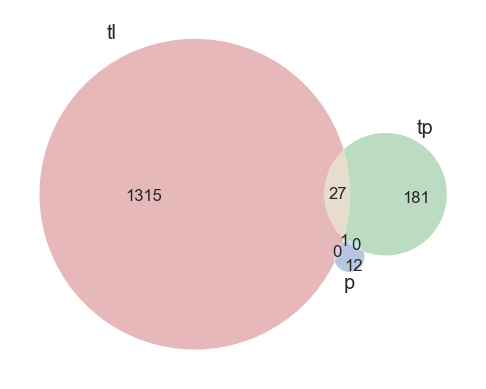

['id_29104533_change_TP_Efficiency' 'id_33199649_TP']
['id_29104533_change_TP_Efficiency' 'id_33199649_TP']
['arhgap35', 'prrc2b', 'fmr1', 'atmin', 'dlgap3']


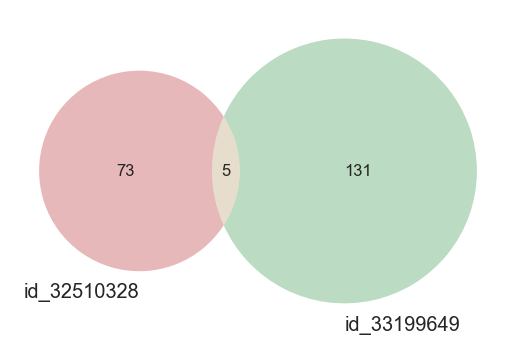

['id_32234480_change_TL_Efficiency' 'id_28772121_change_TL'
 'id_32510328_change_TL']
['id_32234480_change_TL_Efficiency' 'id_28772121_change_TL'
 'id_32510328_change_TL']
['id_32234480_change_TL_Efficiency' 'id_28772121_change_TL'
 'id_32510328_change_TL']
['mag', 'gpr165', 'pcdhgc5', 'rnd2', 'mphosph9', 'mpeg1']
['taf15', 'pros1', 'golim4', 'relb', 'baiap3']


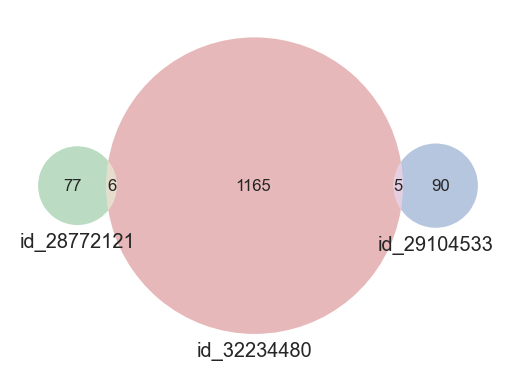

(4807, 52)
28
(14, 52)


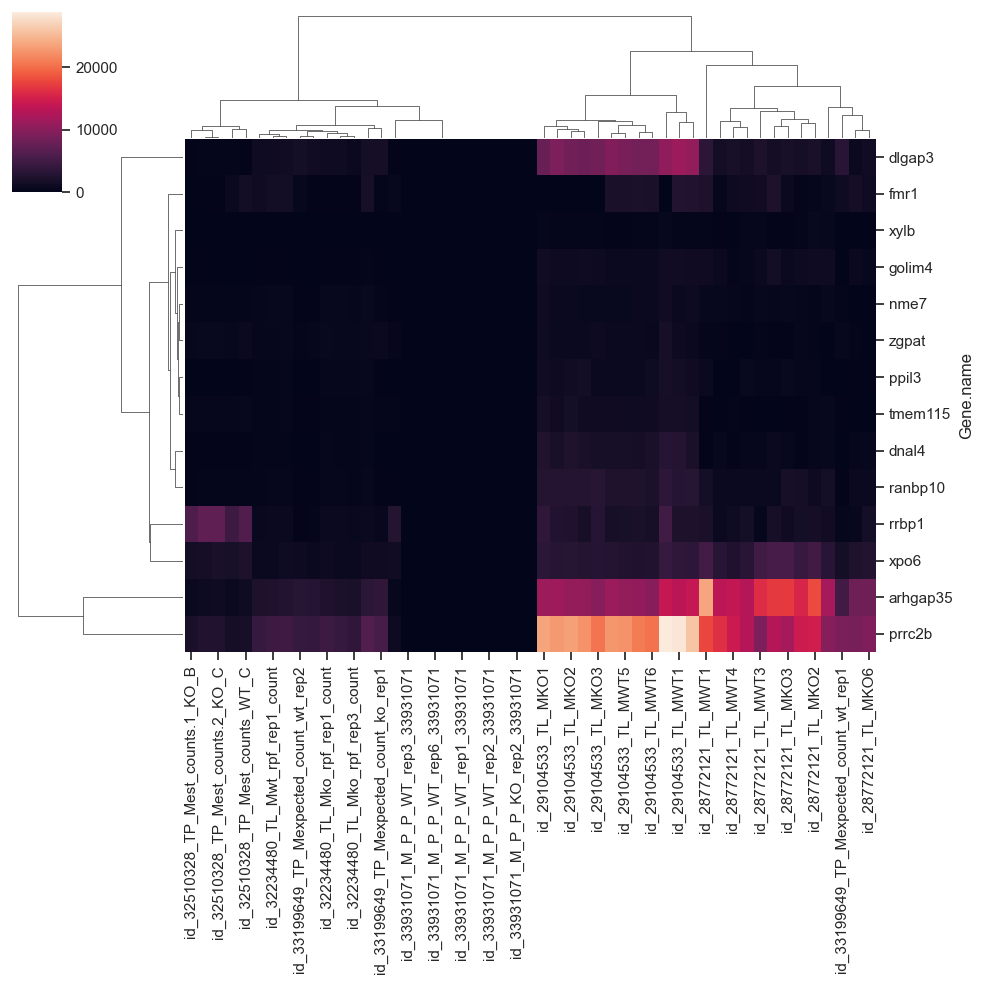

In [8]:
import pandas as pd
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns

comabt='y'
min_max='y'

df = pd.read_csv(".\\bibliography\list_from_used_studies.csv", sep=";")
print(df.shape)

# Create masks for the patterns in the "study" column
mask_tl = df['study'].str.contains("TL")
mask_tp = df['study'].str.contains("TP")
mask_p = df['study'].str.contains("_P")

# Create sub-DataFrames based on the masks
df_tl = df[mask_tl]
df_tp = df[mask_tp]
df_p = df[mask_p]


column_list_tl = df_tl['molecules_litterature'].str.lower().tolist()
column_list_tl = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in column_list_tl]
column_list_tp = df_tp['molecules_litterature'].str.lower().tolist()
column_list_tp = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in column_list_tp]
column_list_p = df_p['molecules_litterature'].str.lower().tolist()
column_list_p = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in column_list_p]

print(len(column_list_tl))
print(len(column_list_tp))
print(len(column_list_p))

print(column_list_tl)

venn = venn3([set(column_list_tl), set(column_list_tp), set(column_list_p)],
             set_labels=('tl', 'tp', 'p'))
plt.show()
plt.close()


######################TP
unique_studies = df_tp['study'].unique()
#print(unique_studies)
split_dataframes = []
# Iterate through unique values and split the DataFrame
for study_value in unique_studies:
    print(unique_studies)
    new_df=df_tp[df_tp['study'] == study_value]
    split_dataframes.append(new_df)

study1=split_dataframes[0]['molecules_litterature'].str.lower().tolist()
study1 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in study1]
study2=split_dataframes[1]['molecules_litterature'].str.lower().tolist()
study2 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in study2]

common_elements = set(study1).intersection(set(study2))
common_elements_list = list(common_elements)
print(common_elements_list)

venn2([set(study1), set(study2)], ('id_32510328', 'id_33199649'))
# Display the plot
plt.show()
plt.close() 
######################TL
unique_studies = df_tl['study'].unique()
#print(unique_studies)
split_dataframes = []
# Iterate through unique values and split the DataFrame
for study_value in unique_studies:
    print(unique_studies)
    new_df=df_tl[df_tl['study'] == study_value]
    split_dataframes.append(new_df)

study1=split_dataframes[0]['molecules_litterature'].str.lower().tolist()
study1 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in study1]
study2=split_dataframes[1]['molecules_litterature'].str.lower().tolist()
study2 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in study2]
study3=split_dataframes[2]['molecules_litterature'].str.lower().tolist()
study3 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in study3]

common_elements = set(study1).intersection(set(study2))
common_elements_list = list(common_elements)
print(common_elements_list)
common_elements = set(study1).intersection(set(study3))
common_elements_list = list(common_elements)
print(common_elements_list)

venn = venn3([set(study1), set(study2), set(study3)],
             set_labels=('id_32234480', 'id_28772121', 'id_29104533'))
# Display the plot
plt.show()
plt.close()

########################################################################################################################################


file_path = '.\integration_horizontale\TL_TP_p_.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df['Gene.name'] = df['Gene.name'].str.lower()
print(df.shape)

#######keep mol of interest
file_path_keep = '.\\bibliography\consensus_used_studies.csv'
# Read the CSV file into a DataFrame
df_keep = pd.read_csv(file_path_keep, sep=";")


my_list= df_keep['molecules_litterature'].str.lower().tolist()
my_list = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in my_list]
print(len(set(my_list)))

#######################################################

# Filter the DataFrame based on the list
df = df[df['Gene.name'].isin(my_list)]
print(df.shape)
df.set_index('Gene.name', inplace=True)

strings_to_find = ['id_33931071', 'id_28772121', 'id_29104533', 'id_32234480', 'id_32510328', 'id_33199649']


median_dict={}

# Loop through the list of strings and select columns that contain them
for string in strings_to_find:

    
    matching_cols = [col for col in df.columns if string in col]
    selected_df = df[matching_cols]

    wt_columns = [col for col in selected_df.columns if 'wt' in col.lower()]
    ko_columns = [col for col in selected_df.columns if 'ko' in col.lower()]

    df_wt = selected_df[wt_columns]
    df_ko = selected_df[ko_columns]

    median_wt = df_wt.median(axis=1)
    median_ko = df_ko.median(axis=1)

    median_diff = median_wt - median_ko

    median_diff_df = pd.DataFrame(median_diff)
    median_diff_df.name = string
    median_dict[string]=median_diff_df


#concatenated_df = pd.concat(mean_dict, axis=1)
#concatenated_df.columns = mean_dict.keys()

sns.clustermap(df)
plt.show()
plt.close()


COMPARE METHODS

Gene.name  id_33931071_M_P_P_WT_rep1_33931071  \
0         Odf2                            0.192248   
1      Tmem245                            0.193277   
2          Aip                            0.194128   
3      Csnk2a2                            0.189716   
4        Cops6                            0.198562   
...        ...                                 ...   
4884     Sart1                            0.194728   
4885     Top3b                            0.189134   
4886     Itpr2                            0.187478   
4887     Kcnq2                            0.212730   
4888   Osbpl10                            0.187533   

      id_33931071_M_P_P_WT_rep2_33931071  id_33931071_M_P_P_WT_rep3_33931071  \
0                               0.192247                            0.192249   
1                               0.193277                            0.193277   
2                               0.194126                            0.194129   
3                               0.189717                            0.189718   
4                               0.198558                            0.198556   
...                                  ...                                 ...   
4884                            0.194728                            0.194736   
4885                            0.189134                            0.189134   
4886                            0.187479                            0.187478   
4887                            0.212731                            0.212729   
4888                            0.187534                            0.187532   

      id_33931071_M_P_P_WT_rep4_33931071  id_33931071_M_P_P_KO_rep1_33931071  \
0                               0.192251                            0.192252   
1                               0.193277                            0.193277   
2                               0.194128                            0.194126   
3                               0.189716                            0.189715   
4                               0.198556                            0.198561   
...                                  ...                                 ...   
4884                            0.194733                            0.194729   
4885                            0.189134                            0.189134   
4886                            0.187478                            0.187478   
4887                            0.212730                            0.212730   
4888                            0.187534                            0.187533   

      id_33931071_M_P_P_KO_rep2_33931071  id_33931071_M_P_P_KO_rep3_33931071  \
0                               0.192252                            0.192251   
1                               0.193277                            0.193277   
2                               0.194123                            0.194125   
3                               0.189716                            0.189715   
4                               0.198563                            0.198563   
...                                  ...                                 ...   
4884                            0.194727                            0.194728   
4885                            0.189134                            0.189134   
4886                            0.187479                            0.187479   
4887                            0.212731                            0.212731   
4888                            0.187534                            0.187534   

      id_33931071_M_P_P_KO_rep4_33931071  id_33931071_M_P_P_WT_rep5_33931071  \
0                               0.192255                            0.192252   
1                               0.193277                            0.193277   
2                               0.194127                            0.194127   
3                               0.189715                            0.189715   
4                               0.198564                            0.198

14
3999
192


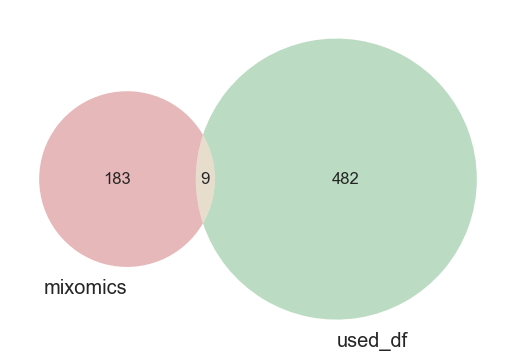

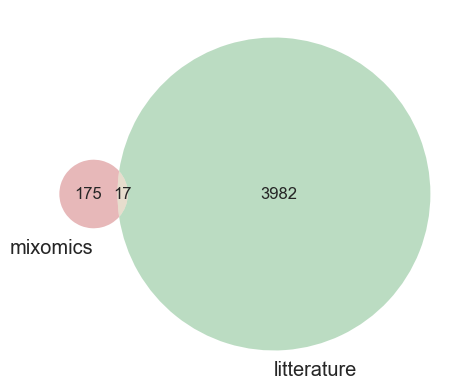

rf
{'feature_37': ['Hmgb2', 'H2-K1', 'Kdm5a', 'Cpsf7', 'Stk38l', 'Fmr1', 'Farsa', 'Cnot7', 'Cnp', 'Ppp1r18', 'Wdr81', 'Fgd4', 'Ube2e3', 'Synpo2', 'Bphl', 'Ube2c', 'Plgrkt', 'Asl', 'Gnaz', 'Cmtm4', 'Cad', 'Macf1', 'Cand2', 'Pitpnc1', 'Ptbp1', 'Fads2', 'Slc9a3r1', 'Txnl4a', 'Mcm2', 'Nsun2', 'Amacr', 'Samd14', 'Rab33b', 'Snx8', 'Ddx3x', 'Rps3', 'Eci2', 'Mccc1', 'Arhgap12', 'Synj2bp', 'Ccdc39', 'Ubr1', 'Parp1', 'Ppp4r1', 'Cyp20a1', 'Phlda3', 'Acss2', 'Lama1', 'Spon1', 'Ckap5', 'Ostc', 'Snrnp40', 'Eif5b', 'Camsap3', 'Prom1', 'Faxc', 'Ubb', 'Slc25a25', 'Itpr2', 'Tmem33', 'Tagln2', 'Rbm42', 'Adcyap1r1', 'Snx12', 'Mef2d', 'Kpna6', 'Paip1', 'Ubash3b', 'Ssu72', 'Prpf38a', 'Aldh1l2', 'Pdia3', 'Nr2c2ap', 'Naga', 'Ralbp1', 'Ablim2', 'Kcnt1', 'Ndc1', 'Cat', 'Metap2', 'Exoc7', 'Ift80', 'Mmgt1', 'Lss', 'Gan', 'Clybl', 'Nck1', 'Mcm3ap', 'Inf2', 'Ythdc2', 'Ctnnd1', 'Lars2', 'Rragb', 'Arl6', 'Mpc1', 'Mcm3', 'Eif2ak2', 'Cnpy4', 'Slc7a5', 'Agap2'], 'feature_34': ['Fmr1', 'Cmtm4', 'Ptbp1', 'Ppp4r1', 'Lama1'

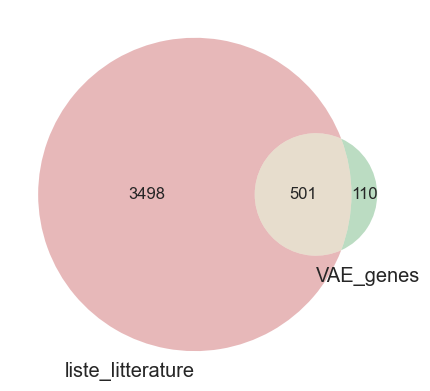

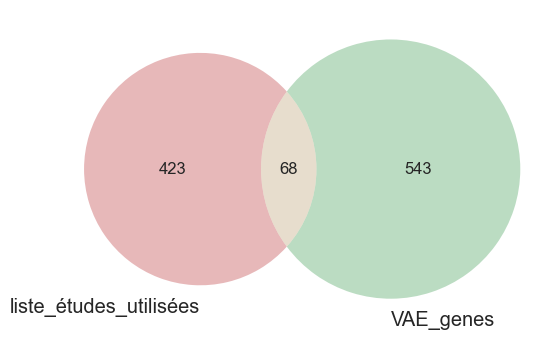

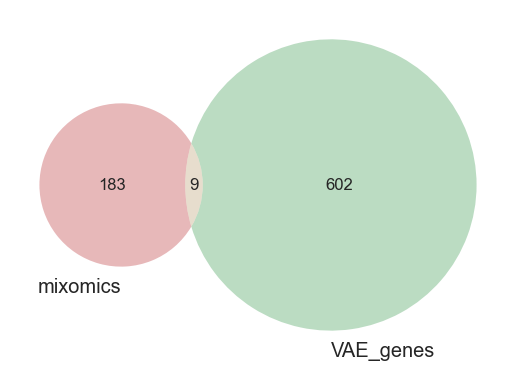

xgb
{'feature_17': ['B3gntl1', 'Ntng2', 'Cmc2', 'Crb2', 'Usp30', 'Hdhd3', 'Rgs6', 'M6pr', 'Cacna2d2', 'Ubtd2', 'Wfs1', 'Prkar2b', 'Pigk', 'Mtor', 'Ptma', 'Xkr4', 'Reep5', 'Srrm1', 'Tuba1b', 'Nqo2', 'Vps33a', 'Tubgcp6', 'Mettl13', 'Smad5', 'Shroom3', 'Lrfn4', 'Bcl2l1', 'Lrrc4b', 'Slc20a2', 'Fundc2', 'Pck2', 'Nup160', 'Megf8', 'Sh3pxd2b', 'Lpl', 'Mms19', 'Tmed3', 'Cib1', 'Med23', 'Dph7', 'Rdh11', 'Psat1', 'Dnmt1', 'Abhd16a', 'Tjp1', 'Ankib1', 'Vim', 'Fbxo4', 'Itgb1', 'Ptk2', 'Slc25a15', 'Ranbp10', 'Wdfy2', 'Fgd1', 'Lmbrd2', 'Ccdc93', 'Trmt1', 'Gpsm1', 'Cdk1', 'Cox6a1', 'Leo1', 'Ttc28', 'P4ha1', 'Mtap', 'Focad', 'Adcyap1r1', 'Acat2', 'Ints1', 'Phldb1', 'Mib1', 'Eif2ak4', 'Irak4', 'Plec', 'Mcur1', 'Rer1', 'Dok4', 'Tulp3', 'Sod1', 'Srsf10', 'Podxl', 'Commd6', 'Gnb4', 'Txlng', 'Ptpn12', 'Nup88', 'Lmnb1', 'Ube2a', 'Mlycd', 'Ccdc85c', 'Serbp1', 'Farp2', 'Cstf3', 'Mapk8', 'Igdcc4', 'Hsd17b7', 'Nlgn2', 'Iars', 'Vcl', 'Sparc', 'Cars'], 'feature_74': ['Cacna2d2', 'Dnmt1', 'Ptpn12', 'Lmnb1', 'Myo16

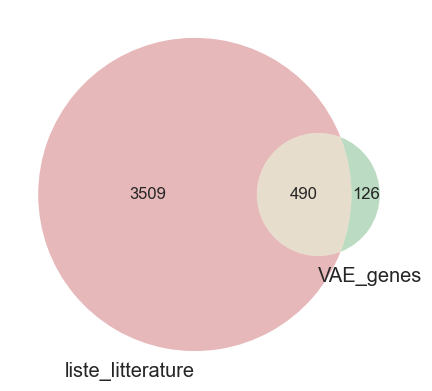

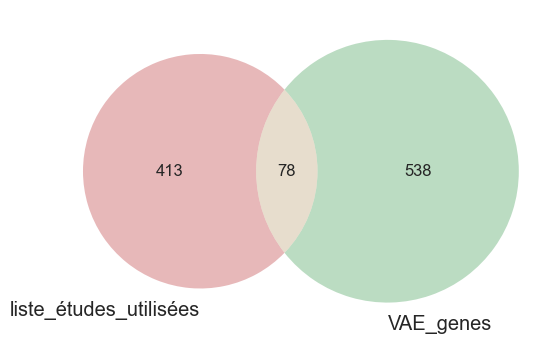

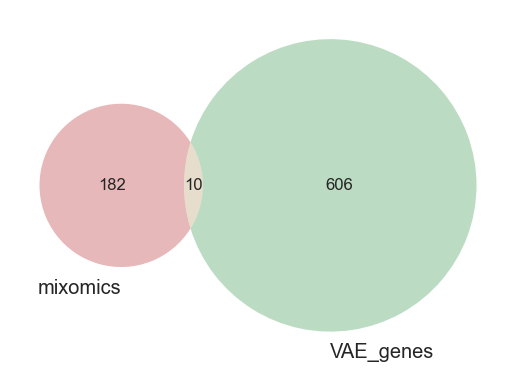

In [9]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt



##### GENES USED DF
    
#df3= pd.read_csv('.\\bibliography\\Deseq\\DE_genes.csv', sep=";", encoding='ISO-8859-1')
#liste_used_df = df3['DE'].str.lower().tolist()
#liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]
#liste_used_df = list(set(liste_used_df))

df3= pd.read_csv('.\\bibliography\\list_from_used_studies.csv', sep=";")
liste_used_df = df3['molecules_litterature'].str.lower().tolist()
liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]

#remove genes not kept during horizontal integration

if combatseq !="y":

    if combat != "y":

        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv")
        else:
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv")
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all.csv")
    else:
        if min_max != "y":

            data= pd.read_csv(".\integration_horizontale\TL_TP_p_combat.csv")

        else:
            if all == 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combat.csv", sep=",")
            if all != 'y':
                data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combat.csv", sep=",")
            #display(data)
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv", sep=';')
    else:
        if all !='y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv")
        if all == 'y':
            data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_all_combatseq.csv")

display(data)
keep_list = data['Gene.name'].str.lower().tolist()
keep_list= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in keep_list]

common_elements = list(set(liste_used_df) & set(keep_list))
liste_used_df = list(common_elements)

##### GENES USED DF CONSENSUS
    
df5= pd.read_csv('.\\bibliography\\consensus_used_studies.csv', sep=";", encoding='ISO-8859-1')
consensus_used_df = df5['molecules_litterature'].str.lower().tolist()
consensus_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in consensus_used_df]
common_elements2 = list(set(consensus_used_df) & set(keep_list))
consensus_used_df = list(common_elements2)
print(len(consensus_used_df))

###### GENES LITTERATURE

df2= pd.read_csv('.\\bibliography\\liste_litteratures_CLIP.csv', sep=";", encoding='ISO-8859-1')
df2=df2.dropna()

liste_litterature = df2['molecules_litterature'].str.lower().tolist()
liste_litterature = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '') for s in liste_litterature]
#liste_litterature = list(set(liste_litterature))

common_elements = list(set(liste_litterature) & set(keep_list))
liste_litterature = list(common_elements)


#print(liste_litterature)
print(len(liste_litterature))

##### GENES MIXOMICS
    
df4= pd.read_csv('.\integration_horizontale\mixomics\\MINT_results.csv', sep=";", header=0)

liste_mixomics = df4['data_all_list'].str.lower().tolist()
liste_mixomics= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_mixomics]
liste_mixomics = list(set(liste_mixomics))
print(len(liste_mixomics))

######################################################################################

## consensus used df vs Mixomics
#consensus = [item for item in set(liste_mixomics) if item in set(consensus_used_df)]
#print(consensus)
#venn2([set(liste_mixomics), set(consensus_used_df)], ('mixomics', 'consensus_used_df'))
#plt.savefig(f'.\integration_horizontale\mixomics\\mixomics_vs_consensus_used_df.png')
#plt.show()

## used df vs Mixomics
venn2([set(liste_mixomics), set(liste_used_df)], ('mixomics', 'used_df'))
plt.savefig(f'.\integration_horizontale\mixomics\\mixomics_vs_used_df.png')
plt.show()

## litterature vs Mixomics    
venn2([set(liste_mixomics), set(liste_litterature)], ('mixomics', 'litterature'))
plt.savefig(f'.\integration_horizontale\mixomics\\mixomics_vs_litterature.png')
plt.show()


################################################################################################################################################

for method in methods:
    print(method)
    
    df= pd.read_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv')
    df.set_index(df.columns[0], inplace=True)
    #display(df)

    gene_dict = {}
    gene_lists=[]

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Use the 'loc' function to get the indices where the value is 1
        indices = df[df[column] == 1].index.tolist()
        # Store the indices in the dictionary
        gene_dict[column] = indices
        gene_lists.append(indices)

    # Print the dictionary containing the index lists
    print(gene_dict)

    ################################ GENES SELECTED VAE

    unique_genes = []

    # Iterate through the sublists and add unique elements to the new list
    for sublist in gene_lists:
        for item in sublist:
            if item not in unique_genes:
                unique_genes.append(item)

    unique_genes = [s.lower() for s in unique_genes]
    unique_genes = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in unique_genes]
    unique_genes = list(set(unique_genes))


    #print(unique_genes)
    print(len(unique_genes))


    ###########VENN

    #VAE vs litterature

    #common_elements = list(set(unique_genes) & set(liste_litterature))
    #print(len(common_elements))

    venn2([set(liste_litterature), set(unique_genes)], ('liste_litterature', 'VAE_genes'))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_litterature_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies used

    venn2([set(liste_used_df), set(unique_genes)], ('liste_études_utilisées', 'VAE_genes'))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies consensus
    #venn2([set(consensus_used_df), set(unique_genes)], ('consensus_études_utilisées', 'VAE_genes'))
    #plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    #plt.show()
    #plt.close()

    #VAE vs Mixomics
    venn2([set(liste_mixomics), set(unique_genes)], ('mixomics', 'VAE_genes'))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_mixomics_VS_VAE.png')
    plt.show()


In [ ]:
#######################################################################################################################################
#####################################GET THE MOLECULES IN EACH SELECTED FEATURE###########################################################

X=t_data.values

#latent_space= pd.read_csv('.\integration_horizontale\Resultats_VAE\latent_space.csv')
print("MOL IDENTIFICATION")
print(results)

for method in methods:

    selected_features=results[method]
    print(selected_features)

    df_list=[]
    binary_df_list=[]

    for feature in selected_features:

        column = latent_space.iloc[:, feature]

        y= column.values
        #print(y)

        ### Je tourne le modele de randomm forest regression
        rf = RandomForestRegressor(n_estimators=100, random_state=42) 
        rf.fit(X, y)

        # Récupération des molecules avec leur score d'importance
        importances = rf.feature_importances_
        df_importances=pd. DataFrame(importances)
        df_importances.rename(columns={df_importances.columns[0]: f'feature_{feature}'},inplace=True)

        df_importances['Gene.name'] = data_copy.index
        df_importances = df_importances.set_index('Gene.name')
        
        df_list.append(df_importances)
        #display(df_importances)

        ######################

        # Sort the DataFrame based on the 'Value' column in descending order
        df_importances = df_importances.sort_values(by=f'feature_{feature}', ascending=False)

        # Define the number of rows (x) you want to set to 1
        x = 100

        # 1 for the first x rows, and 0 for the rest
        df_importances[f'feature_{feature}'] = [1 if i < x else 0 for i in range(len(df_importances))]
        binary_df_list.append(df_importances)


    # Affichage des variables d'importance
    combined_df = pd.concat(df_list, axis=1)
    binary_combined_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), binary_df_list)
    #display(combined_df)
    #display(binary_combined_df)

    combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_molecules_importance_in_features.csv', index=True)
    binary_combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv', index=True)

lists to compare
[['Dpp8', 'Rab22a', 'Yaf2', 'Agtpbp1', 'Gle1', 'Fdx1', 'Wnk1', 'Twsg1', 'Ehd3', 'Iws1', 'Sptan1', 'Shmt1', 'Cttn', 'Usp11', 'Cisd1', 'Xrcc5', 'Spr', 'Pipox', 'Tbc1d9', 'Zfyve19', 'Rfk', 'Txlng', 'Sms', 'Tbl1xr1', 'Fmr1', 'Znrf2', 'Trmt61a', 'Map2', 'Idh2', 'Ptcd1', 'Uchl1', 'Dlgap3', 'Azi2', 'Ibtk', 'Dpysl5', 'Sacs', 'Rspry1', 'Tpm4', 'Nt5dc3', 'Ube2c', 'Maea', 'Rpe', 'Als2', 'Aida', 'Eif5b', 'Cep131', 'Klhl11', 'Cotl1', 'Akap5', 'Prune2', 'Man2a2', 'Csrp2', 'Sh3bgrl', 'Syt7', 'Crmp1', 'Plxnd1', 'Puf60', 'Pde4dip', 'Fig4', 'Jak1', 'Clcc1', 'Mycbp2', 'Actr3', 'Ksr1', 'Pom121', 'Rab31', 'Tnrc6b', 'Trmt1', 'Erlin2', 'Tubb2b', 'Myo18a', 'Mapk14', 'Slc25a46', 'Smarcd1', 'Eif2d', 'Ccdc91', 'Dgkz', 'Dagla', 'Dync1h1', 'Fyn', 'Chp1', 'Trappc3', 'Dlg4', 'Il1rap', 'Rbm10', 'Huwe1', 'Ppm1b', 'Med20', 'Ddhd1', 'Gprasp1', 'Sptb', 'Pde4d', 'Ppp1r14c', 'Iqgap1', 'Trim2', 'Wwc2', 'Luzp1', 'Fkbp1a', 'Parp14', 'Smc3', 'Zc3h4', 'Pgam5', 'Sos1', 'Dock4', 'Arhgap32', 'Ptms', 'Sec11a', 'Mrg

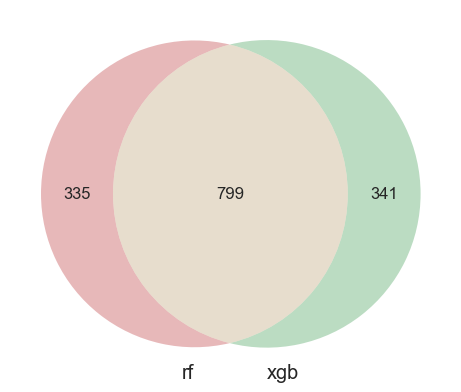

shared mol
['dpp8', 'rab22a', 'yaf2', 'agtpbp1', 'gle1', 'fdx1', 'wnk1', 'twsg1', 'ehd3', 'iws1', 'sptan1', 'shmt1', 'cttn', 'usp11', 'cisd1', 'xrcc5', 'spr', 'pipox', 'tbc1d9', 'zfyve19', 'rfk', 'txlng', 'sms', 'tbl1xr1', 'fmr1', 'znrf2', 'trmt61a', 'map2', 'idh2', 'ptcd1', 'uchl1', 'dlgap3', 'azi2', 'ibtk', 'dpysl5', 'sacs', 'rspry1', 'tpm4', 'nt5dc3', 'ube2c', 'maea', 'rpe', 'als2', 'aida', 'eif5b', 'cep131', 'klhl11', 'cotl1', 'akap5', 'prune2', 'man2a2', 'csrp2', 'sh3bgrl', 'syt7', 'crmp1', 'plxnd1', 'puf60', 'pde4dip', 'fig4', 'jak1', 'clcc1', 'mycbp2', 'actr3', 'ksr1', 'pom121', 'rab31', 'tnrc6b', 'trmt1', 'erlin2', 'tubb2b', 'myo18a', 'mapk14', 'slc25a46', 'smarcd1', 'eif2d', 'ccdc91', 'dgkz', 'dagla', 'dync1h1', 'fyn', 'chp1', 'trappc3', 'dlg4', 'il1rap', 'rbm10', 'huwe1', 'ppm1b', 'med20', 'ddhd1', 'gprasp1', 'sptb', 'pde4d', 'ppp1r14c', 'iqgap1', 'trim2', 'wwc2', 'luzp1', 'fkbp1a', 'parp14', 'smc3', 'zc3h4', 'pgam5', 'sos1', 'dock4', 'arhgap32', 'ptms', 'sec11a', 'mrgbp', 'a

KeyboardInterrupt: 

In [15]:
from matplotlib_venn import venn2


########SHARED MOLECULES

lists_to_compare=[]

for method in methods:

    
    df= pd.read_csv(f'.\integration_horizontale\Resultats_VAE\\{method}\\{method}_important_molecules_for_each_feature.csv')
    df.set_index(df.columns[0], inplace=True)
    
    gene_lists=[]

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Use the 'loc' function to get the indices where the value is 1
        indices = df[df[column] == 1].index.tolist()
        # Store the indices in the dictionary
        gene_lists.append(indices)
    
    flat_list = [item for sublist in gene_lists for item in sublist]
    lists_to_compare.append(flat_list)

print('lists to compare')
print(lists_to_compare)


###venn of molecules
venn2(subsets=(set(lists_to_compare[0]), set(lists_to_compare[1])), set_labels=('rf', 'xgb'))
plt.show()
plt.close()

out = [x for x in lists_to_compare[0] if x in lists_to_compare[1]]
print('shared mol')
out = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in out]
out = [s.lower() for s in out]
print(out)

# Create a DataFrame
df = pd.DataFrame(out, columns=['Gene.name'])

df.to_csv(f'.\integration_horizontale\Resultats_VAE\\shared_important_molecules_in_features.csv', index=False)

###############SHARED FEATURES

list_features=[]

for method in methods:

    selected_features=results[method]
    list_features.append(selected_features)
    print(selected_features)

result_list = set(list_features[0]).intersection(set(list_features[1]))

#shared features
print('shared features')
print(result_list)

df_list=[]
binary_df_list=[]

for feature in result_list:

    column = latent_space.iloc[:, feature]

    y= column.values
    #print(y)

    ### Je tourne le modele de randomm forest regression
    rf = RandomForestRegressor(n_estimators=100, random_state=42) 
    rf.fit(X, y)

    # Récupération des molecules avec leur score d'importance
    importances = rf.feature_importances_
    df_importances=pd. DataFrame(importances)
    df_importances.rename(columns={df_importances.columns[0]: f'feature_{feature}'},inplace=True)

    df_importances['Gene.name'] = data_copy.index
    df_importances = df_importances.set_index('Gene.name')
        
    df_list.append(df_importances)
    #display(df_importances)

    ######################

    # Sort the DataFrame based on the 'Value' column in descending order
    df_importances = df_importances.sort_values(by=f'feature_{feature}', ascending=False)

    # Define the number of rows (x) you want to set to 1
    x = 100

    # 1 for the first x rows, and 0 for the rest
    df_importances[f'feature_{feature}'] = [1 if i < x else 0 for i in range(len(df_importances))]
    binary_df_list.append(df_importances)


# Affichage des variables d'importance
combined_df = pd.concat(df_list, axis=1)
binary_combined_df = pd.concat(binary_df_list, axis=1)
#display(combined_df)
#display(binary_combined_df)

combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\shared_features_molecules_importance_in_features.csv', index=True)
binary_combined_df.to_csv(f'.\integration_horizontale\Resultats_VAE\\shared_features_important_molecules_for_each_feature.csv', index=True)

############################################################################################################################

df= pd.read_csv('.\integration_horizontale\Resultats_VAE\\shared_features_important_molecules_for_each_feature.csv')
df.set_index(df.columns[0], inplace=True)


gene_lists=[]

# Iterate through each column in the DataFrame
for column in df.columns:
    # Use the 'loc' function to get the indices where the value is 1
    indices = df[df[column] == 1].index.tolist()

    gene_lists.append(indices)

# Print the dictionary containing the index lists
#print(gene_dict)

unique_genes = []

# Iterate through the sublists and add unique elements to the new list
for sublist in gene_lists:
    for item in sublist:
        if item not in unique_genes:
            unique_genes.append(item)

unique_genes = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in unique_genes]
unique_genes = [s.lower() for s in unique_genes]

print(unique_genes)

# venn shared mol vs shared features

venn2([set(out), set(unique_genes)], ('shared molecules', 'shared features'))
plt.show()
plt.close()

#######################################################################################################################################



##### GENES USED DF
    
df3= pd.read_csv('.\\bibliography\\list_from_used_studies.csv', sep=";", encoding='ISO-8859-1')
liste_used_df = df3['molecules_litterature'].str.lower().tolist()
liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]
#liste_used_df = list(set(liste_used_df))

#remove genes not kept during horizontal integration

if combatseq != "y":
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv", sep=",")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv", sep=",")
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv", sep=",")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv", sep=",")

display(data)
keep_list = data['Gene.name'].str.lower().tolist()
keep_list= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in keep_list]

common_elements = list(set(liste_used_df) & set(keep_list))
liste_used_df = list(common_elements)

##### GENES USED DF CONSENSUS
    
df5= pd.read_csv('.\\bibliography\\consensus_used_studies.csv', sep=";", encoding='ISO-8859-1')
consensus_used_df = df5['molecules_litterature'].str.lower().tolist()
consensus_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in consensus_used_df]
common_elements2 = list(set(consensus_used_df) & set(keep_list))
consensus_used_df = list(common_elements2)

###### GENES LITTERATURE

df2= pd.read_csv('.\\bibliography\\liste_litteratures_all.csv', sep=";", encoding='ISO-8859-1')
df2=df2.dropna()

liste_litterature = df2['molecules_litterature'].str.lower().tolist()
liste_litterature = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_litterature]
#liste_litterature = list(set(liste_litterature))

#print(liste_litterature)
print(len(liste_litterature))
common_elements2 = list(set(liste_litterature) & set(keep_list))
liste_litterature = list(common_elements2)
##### GENES MIXOMICS
    
df4= pd.read_csv('.\integration_horizontale\mixomics\\MINT_results.csv', sep=";", header=0)

liste_mixomics = df4['data_all_list'].str.lower().tolist()
liste_mixomics= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_mixomics]

################

dico2={'shared molecules':set(out), 'shared features':set(unique_genes)}

for key in dico2:

    liste=dico2[key]

    #VAE vs litterature

    venn2([set(liste_litterature), set(liste)], ('liste_litterature', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_litterature_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies used

    venn2([set(liste_used_df), set(liste)], ('liste_études_utilisées', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    plt.show()
    plt.close()

    #VAE vs studies consensus
    venn2([set(consensus_used_df), set(liste)], ('consensus_études_utilisées', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_udes_studies_VS_VAE.png')
    plt.show()
    plt.close()


    #VAE vs Mixomics
    venn2([set(liste_mixomics), set(liste)], ('mixomics', key))
    plt.savefig(f'.\integration_horizontale\Enrichissement\\{method}\\{method}_venn_diagram_mixomics_VS_VAE.png')
    plt.show()


heatmap shared mol

(4807, 59)
166
(165, 59)


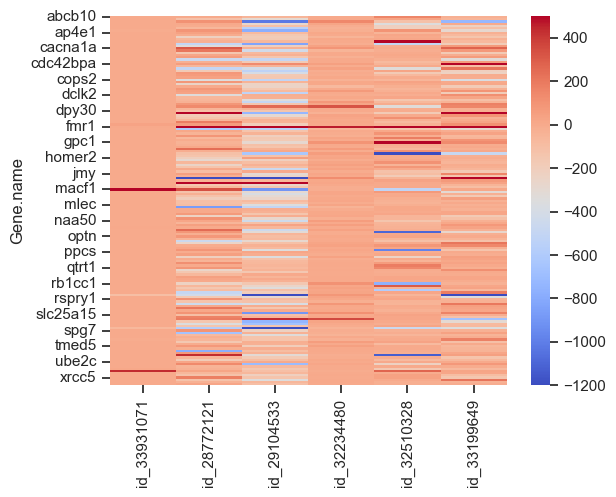

(4642, 58)


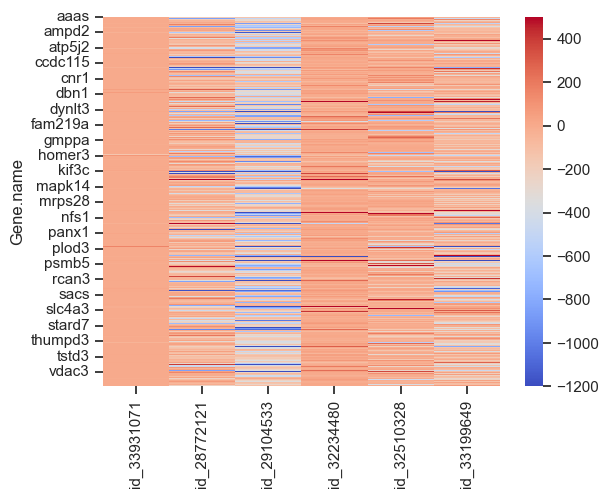

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '.\integration_horizontale\TL_TP_p_combatseq.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df['Gene.name'] = df['Gene.name'].str.lower()
print(df.shape)

#######keep mol of interest
file_path_keep = '.\integration_horizontale\Resultats_VAE\shared_important_molecules_in_features.csv'
# Read the CSV file into a DataFrame
df_keep = pd.read_csv(file_path_keep)

my_list= df_keep['Gene.name'].str.lower().tolist()
my_list = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in my_list]
print(len(set(my_list)))
#######################################################
cmap = 'coolwarm'
vmin = -1200  # Minimum value for the color scale
vmax = 500  # Maximum value for the color scale

# Filter the DataFrame based on the list
df = df[df['Gene.name'].isin(my_list)]
print(df.shape)
df.set_index('Gene.name', inplace=True)

strings_to_find = ['id_33931071', 'id_28772121', 'id_29104533', 'id_32234480', 'id_32510328', 'id_33199649']


mean_dict={}

# Loop through the list of strings and select columns that contain them
for string in strings_to_find:

    
    matching_cols = [col for col in df.columns if string in col]
    selected_df = df[matching_cols]

    wt_columns = [col for col in selected_df.columns if 'wt' in col.lower()]
    ko_columns = [col for col in selected_df.columns if 'ko' in col.lower()]

    df_wt = selected_df[wt_columns]
    df_ko = selected_df[ko_columns]

    mean_wt = df_wt.mean(axis=1)
    mean_ko = df_ko.mean(axis=1)

    mean_diff = mean_wt - mean_ko

    mean_diff_df = pd.DataFrame(mean_diff)
    mean_diff_df.name = string
    mean_dict[string]=mean_diff_df


concatenated_df = pd.concat(mean_dict, axis=1)
concatenated_df.columns = mean_dict.keys()

sns.heatmap(concatenated_df, cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()
plt.close()

############################

file_path = '.\integration_horizontale\TL_TP_p_combatseq.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df['Gene.name'] = df['Gene.name'].str.lower()

# Filter the DataFrame based on the list
df_not =  df[~df['Gene.name'].isin(my_list)]
df_not.set_index('Gene.name', inplace=True)
print(df_not.shape)

mean_dict_not={}

# Loop through the list of strings and select columns that contain them
for string in strings_to_find:
    
    matching_cols = [col for col in df_not.columns if string in col]
    selected_df_not = df_not[matching_cols]

    wt_columns_not = [col for col in selected_df_not.columns if 'wt' in col.lower()]
    ko_columns_not = [col for col in selected_df_not.columns if 'ko' in col.lower()]

    df_wt_not = selected_df_not[wt_columns_not]
    df_ko_not = selected_df_not[ko_columns_not]

    mean_wt_not = df_wt_not.mean(axis=1)
    mean_ko_not = df_ko_not.mean(axis=1)

    mean_diff_not = mean_wt_not - mean_ko_not

    mean_diff_df_not = pd.DataFrame(mean_diff_not)
    mean_diff_df_not.name = string
    mean_dict_not[string]=mean_diff_df_not


concatenated_df_not = pd.concat(mean_dict_not, axis=1)
concatenated_df_not.columns = mean_dict_not.keys()

sns.heatmap(concatenated_df_not, cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()
plt.close()




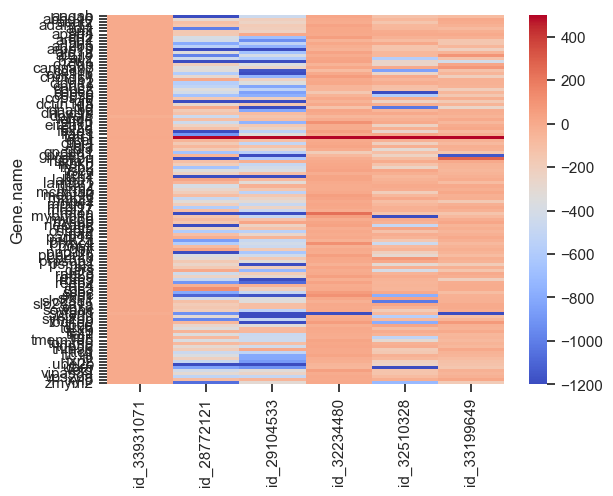

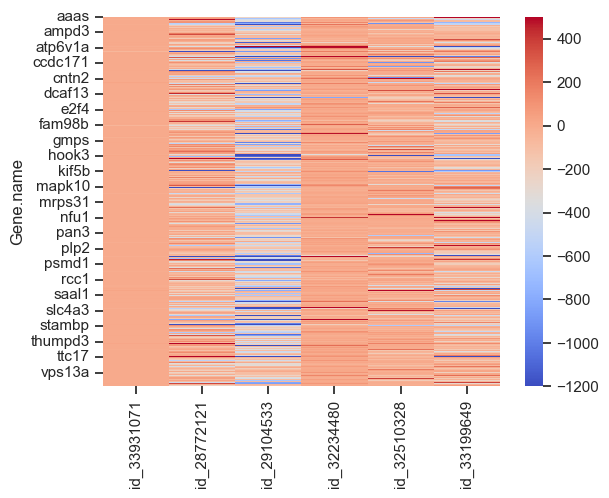

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '.\integration_horizontale\TL_TP_p_.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df['Gene.name'] = df['Gene.name'].str.lower()

#######keep mol of interest
file_path_keep = '.\integration_horizontale\mixomics\MINT_results.csv'
# Read the CSV file into a DataFrame
df_keep = pd.read_csv(file_path_keep)

my_list2= df_keep['data_all_list'].str.lower().tolist()
my_list2 = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in my_list2]

#######################################################
cmap = 'coolwarm'
vmin = -1200  # Minimum value for the color scale
vmax = 500  # Maximum value for the color scale

# Filter the DataFrame based on the list
df_in = df[df['Gene.name'].isin(my_list2)]
df_in.set_index('Gene.name', inplace=True)

strings_to_find = ['id_33931071', 'id_28772121', 'id_29104533', 'id_32234480', 'id_32510328', 'id_33199649']


mean_dict={}

# Loop through the list of strings and select columns that contain them
for string in strings_to_find:

    
    matching_cols = [col for col in df_in.columns if string in col]
    selected_df = df_in[matching_cols]

    wt_columns = [col for col in selected_df.columns if 'wt' in col.lower()]
    ko_columns = [col for col in selected_df.columns if 'ko' in col.lower()]
    

    df_wt = selected_df[wt_columns]
    df_ko = selected_df[ko_columns]
    
    mean_wt = df_wt.mean(axis=1)
    mean_ko = df_ko.mean(axis=1)

    mean_diff = mean_wt - mean_ko

    mean_diff_df = pd.DataFrame(mean_diff)
    mean_diff_df.name = string
    mean_dict[string]=mean_diff_df

concatenated_df = pd.concat(mean_dict, axis=1)
concatenated_df.columns = mean_dict.keys()

sns.heatmap(concatenated_df, cmap=cmap, vmin=vmin, vmax=vmax,  yticklabels=True)
plt.show()
plt.close()

############################

file_path = '.\integration_horizontale\TL_TP_p_combatseq.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df['Gene.name'] = df['Gene.name'].str.lower()


# Filter the DataFrame based on the list
df_not =  df[~df['Gene.name'].isin(my_list2)]
df_not.set_index('Gene.name', inplace=True)

mean_dict_not={}

# Loop through the list of strings and select columns that contain them
for string in strings_to_find:

    
    matching_cols = [col for col in df_not.columns if string in col]
    selected_df_not = df_not[matching_cols]

    wt_columns_not = [col for col in selected_df_not.columns if 'wt' in col.lower()]
    ko_columns_not = [col for col in selected_df_not.columns if 'ko' in col.lower()]

    df_wt_not = selected_df_not[wt_columns_not]
    df_ko_not = selected_df_not[ko_columns_not]

    mean_wt_not = df_wt_not.mean(axis=1)
    mean_ko_not = df_ko_not.mean(axis=1)

    mean_diff_not = mean_wt_not - mean_ko_not

    mean_diff_df_not = pd.DataFrame(mean_diff_not)
    mean_diff_df_not.name = string
    mean_dict_not[string]=mean_diff_df_not


concatenated_df_not = pd.concat(mean_dict_not, axis=1)
concatenated_df_not.columns = mean_dict_not.keys()

sns.heatmap(concatenated_df_not, cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()
plt.close()




['strbp', 'ppp2ca', 'gcdh', 'fam89b', 'tfeb', 'dusp7', 'trafd1', 'crip2', 'gga3', 'amdhd2', 'josd1', 'mmadhc', 'nploc4', 'nudt10', 'mtmr11', 'usp3', 'ppp2r5c', '9130011e15rik', 'nosip', 'hck', 'ppp1r1a', 'foxp4', 'hnrnpa0', 'dbnl', 'asb6', 'tfip11', 'clp1', 'pgam2', 'dcp1a', 'gnb1', 'dmkn', 'actl6b', 'shc4', 'napa', 'ccnd3', 'pik3ap1', 'adrm1', 'ddx59', 'acd', 'mcm4', 'tm4sf5', 'ccdc113', 'fam160b2', 'vrk1', 'kctd5', 'xrn2', 'mansc4', 'lcor', 'tmem150a', 'arpc1a', 'irf5', '2410141k09rik', 'psmf1', 'ppp4c', '1700007g11rik', '2300009a05rik', 'fchsd1', 'hspbap1', 'rela', 'aprt', 'sgta', 'gpr132', 'srp54b', 'fhl2', 'bola3', 'tsg101', 'fbxo30', 'cops5', 'dgcr14', 'drg1', 'pdcd4', '1110038f14rik', 'kpna2', 'ttc36', 'gapdh', 'mkrn1', 'gtpbp6', 'ppp1r36', 'pkn2', 'parp2', 'arhgap12', 'fermt2', 'rab40c', 'akt1s1', 'gmppa', 'pwp1', 'cmss1', 'rnd3', 'tbr1', 'cbx6', 'fam124a', 'ilk', '2310061i04rik', 'limd2', 'chrac1', 'nupl2', 'zfp692', 'psmb1', 'mark4', 'plcxd1', '1110032f04rik', 'zwilch', 'arrd

Gene.name  id_33931071_M_P_P_WT_rep1_33931071  \
0         Aaas                            0.234710   
1         Aacs                            0.240415   
2        Aagab                            0.240915   
3         Aak1                            0.291966   
4        Aamdc                            0.235624   
...        ...                                 ...   
4802     Zwint                            0.287934   
4803    Zyg11b                            0.265864   
4804       Zyx                            0.236279   
4805     Zzef1                            0.238776   
4806   mars-02                            0.235512   

      id_33931071_M_P_P_WT_rep2_33931071  id_33931071_M_P_P_WT_rep3_33931071  \
0                               0.234732                            0.234686   
1                               0.240410                            0.240420   
2                               0.240916                            0.240915   
3                               0.291991                            0.291940   
4                               0.235622                            0.235637   
...                                  ...                                 ...   
4802                            0.287934                            0.287935   
4803                            0.265864                            0.265862   
4804                            0.236278                            0.236284   
4805                            0.238778                            0.238772   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_WT_rep4_33931071  id_33931071_M_P_P_KO_rep1_33931071  \
0                               0.234723                            0.234703   
1                               0.240439                            0.240422   
2                               0.240916                            0.240915   
3                               0.291977                            0.291973   
4                               0.235628                            0.235624   
...                                  ...                                 ...   
4802                            0.287937                            0.287934   
4803                            0.265864                            0.265864   
4804                            0.236278                            0.236279   
4805                            0.238777                            0.238776   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_KO_rep2_33931071  id_33931071_M_P_P_KO_rep3_33931071  \
0                               0.234702                            0.234695   
1                               0.240429                            0.240421   
2                               0.240915                            0.240915   
3                               0.291987                            0.291985   
4                               0.235623                            0.235622   
...                                  ...                                 ...   
4802                            0.287937                            0.287935   
4803                            0.265864                            0.265864   
4804                            0.236278                            0.236278   
4805                            0.238778                            0.238777   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_KO_rep4_33931071  id_33931071_M_P_P_WT_rep5_33931071  \
0                               0.234694                            0.234711   
1                               0.240443                            0.240410   
2                               0.240916                            0.240916   
3                               0.291980                            0.291972   
4                               0.235623                            0.235

Empty DataFrame
Columns: []
Index: [myo7a, slc8a1, chchd2, armc9, dido1, fmr1, vcl, shmt1, vash1, trio, ccdc134, calcoco1, gab2, ralgapa2, baz1b, heatr5b, ap4e1, rab23, megf10, git2, ttc4, dlg5, ubr3, cygb, dhx57, ints3, pus1, ctnnd1, spg7, acsl1, rasgrp2, cwc27, mri1, eif4g3, rimbp2, dock4, ndst1, asl, ikbip, lrrc49, slc25a15, ptbp3, dpy30, fcho2, cacna1a, optn, smad2, ryr2, gpc1, arhgap12, chchd2, dido1, fmr1, ndst1, fcho2, pnn, capza1, qtrt1, itsn2, lama5, ranbp17, stx17, rgl1, fmr1, ap4e1, nes, map4k3, rspry1, rab3d, cd2ap, homer2, pten, qtrt1, celf6, nat10, celsr3, hmgn3, adcy6, map3k7, pygl, ints2, n4bp1, pus10, zfyve19, evi5, man1a2, mxra7, zhx2, rpl31, zdhhc8, dph1, gemin5, tubgcp3, tmub1, plod2, srgap2, slc4a7, slk, chd2, akap8, ...]

[192 rows x 0 columns]

['rpl3', 'gcdh', 'ccnk', 'fmr1', 'zdhhc8', 'arhgap12', 'slc8a1', 'spred3', 'gab2', 'dhx57', 'gstm2', 'homer2', 'srgap2', 'fnbp1l', 'cygb', 'abcb10', 'celf6', 'kif5a', 'dph1', 'cdc42bpa']
id_32234480_change_TL_Efficiency


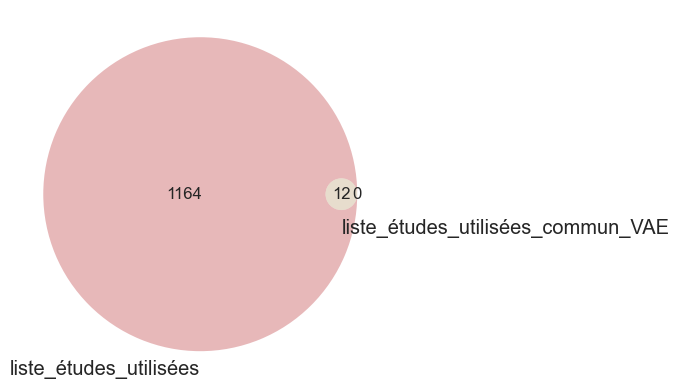

id_29104533_change_TP_Efficiency


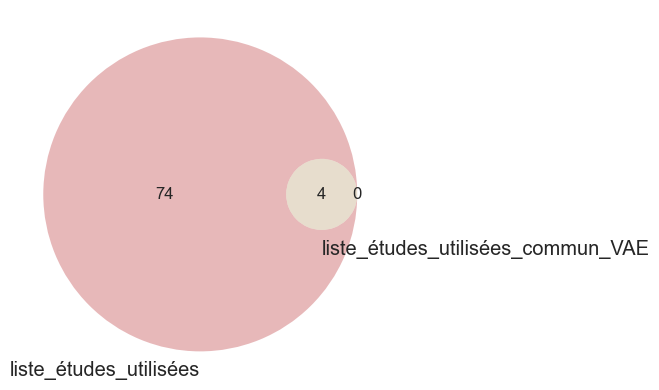

id_33199649_TP


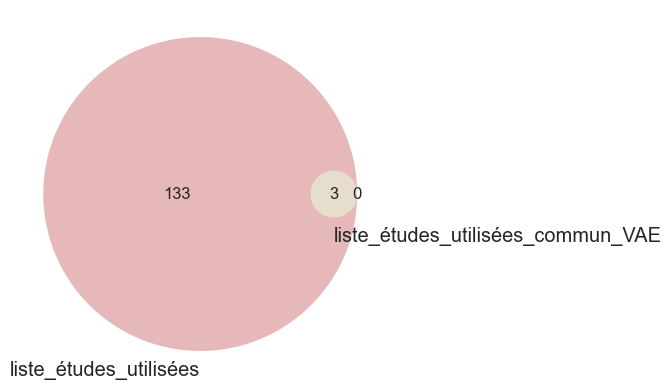

id_33931071_P


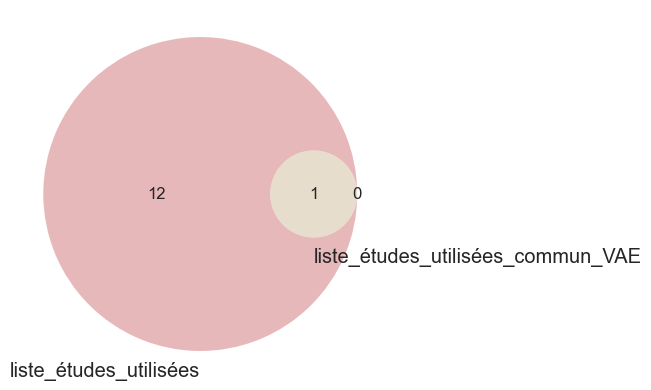

id_28772121_change_TL


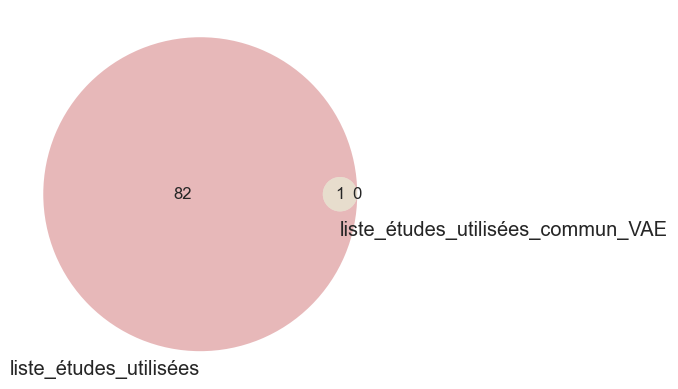

id_32510328_change_TL


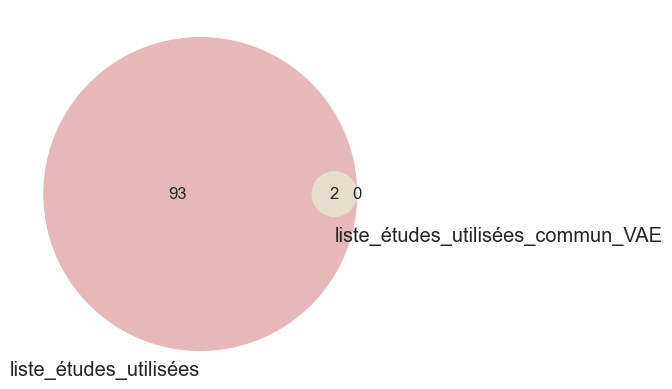

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

df3= pd.read_csv('.\\bibliography\\list_from_used_studies.csv', sep=";", encoding='ISO-8859-1')

# Convert the DataFrame column to lowercase
df3['column_name_lower'] = df3['molecules_litterature'].str.lower()

liste_used_df= df3['column_name_lower'].tolist()
liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]

print(liste_used_df)

#remove genes not kept during horizontal integration

if combatseq != "y":
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv")
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv")

display(data)
keep_list = data['Gene.name'].str.lower().tolist()
keep_list= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in keep_list]

common_elements = list(set(liste_used_df) & set(keep_list))
liste_used_df = list(common_elements)

########################### GENES SELECTED VAE

df= pd.read_csv('.\integration_horizontale\Resultats_VAE\\shared_important_molecules_in_features.csv')

df.set_index(df.columns[0], inplace=True)
display(df)

unique_genes = df.index.tolist()

unique_genes = [s.lower() for s in unique_genes]
unique_genes = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in unique_genes]


###########################

# List of values to match used_df and VAE results
value_list = list(set(liste_used_df) & set(unique_genes))

print(value_list)

# Use the value_list to filter the DataFrame with DE in studies
filtered_df = df3[df3['column_name_lower'].isin(value_list)]

# Drop the lowercase column if you no longer need it
filtered_df = filtered_df.drop(columns=['column_name_lower'])

#filtered_df.to_csv('.\Enrichissement\\list_from_used_studies_common_with_VAE.csv', index=False)

#####################################################

unique_names = df3['study'].unique()

for name in unique_names:
    print(name)
    sub_df_not_filtered = df3[df3['study'] == name]

    liste_used_df = sub_df_not_filtered ['molecules_litterature'].str.lower().tolist()
    liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]

    ############################################
    sub_df_filtered = filtered_df[filtered_df['study'] == name]

    liste_used_df_filtered = sub_df_filtered ['molecules_litterature'].str.lower().tolist()
    liste_used_df_filtered = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df_filtered]

    venn2([set(liste_used_df), set(liste_used_df_filtered)], ('liste_études_utilisées', 'liste_études_utilisées_commun_VAE'))

    plt.show()




study molecules_litterature
0      FMRP curated                ZYG11B
1      FMRP curated                 ZNFX1
2      FMRP curated                 ZMIZ2
3      FMRP curated                 ZMIZ1
4      FMRP curated                  ZHX3
...             ...                   ...
14449     proteome                  Shoc2
14450     proteome                  Nup93
14451     proteome                   Chd4
14452     proteome                  Rbbp6
14453     proteome                Zc3h11a

[14454 rows x 2 columns]

['zyg11b', 'znfx1', 'zmiz2', 'zmiz1', 'zhx3', 'zfyve1', 'zfr', 'zfpm1', 'zfp106', 'zfhx2', 'zer1', 'zeb2', 'zdhhc14', 'zcchc14', 'zc3h7b', 'zc3h4', 'ywhag', 'xpo7', 'xpo6', 'wwc2', 'wwc1', 'wnk2', 'wnk1', 'wdr6', 'wdr13', 'wdfy3', 'wasf1', 'vps41', 'vps13d', 'vim', 'vdac1', 'vamp2', 'usp9x', 'usp5', 'usp34', 'usp32', 'usp22', 'uqcrc1', 'unc5a', 'unc13c', 'unc13b', 'unc13a', 'ulk2', 'ulk1', 'uhrf1bp1l', 'ubr5', 'ubr3', 'ubqln2', 'ubqln1', 'ube3c', 'ube3b', 'ube2o', 'ube2a', 'ubap2l', 'uba1', 'tulp4', 'tubb3', 'ttyh3', 'ttyh1', 'ttll7', 'ttc7b', 'ttc3', 'ttbk2', 'ttbk1', 'tspyl4', 'tspan7', 'tshz1', 'tsc22d1', 'tsc2', 'trrap', 'trpm3', 'trpc4ap', 'tro', 'trip12', 'trio', 'trim9', 'trim37', 'trim32', 'trim3', 'trim2', 'tril', 'trappc10', 'trak2', 'trak1', 'traf2', 'tppp', 'tpm2', 'tns3', 'tnrc6b', 'tnrc18', 'tnpo2', 'tnks', 'tnk2', 'tnik', 'tmod2', 'tmem8b', 'tmem87a', 'tmem63b', 'tmem151b', 'tmem151a', 'tmem132a', 'tln2', 'tle3', 'tiam1', 'thra', 'tgfbr2', 'tesk1', 'tef', 'tcf4', 'tcf25'

Gene.name  id_33931071_M_P_P_WT_rep1_33931071  \
0         Aaas                            0.234710   
1         Aacs                            0.240415   
2        Aagab                            0.240915   
3         Aak1                            0.291966   
4        Aamdc                            0.235624   
...        ...                                 ...   
4802     Zwint                            0.287934   
4803    Zyg11b                            0.265864   
4804       Zyx                            0.236279   
4805     Zzef1                            0.238776   
4806   mars-02                            0.235512   

      id_33931071_M_P_P_WT_rep2_33931071  id_33931071_M_P_P_WT_rep3_33931071  \
0                               0.234732                            0.234686   
1                               0.240410                            0.240420   
2                               0.240916                            0.240915   
3                               0.291991                            0.291940   
4                               0.235622                            0.235637   
...                                  ...                                 ...   
4802                            0.287934                            0.287935   
4803                            0.265864                            0.265862   
4804                            0.236278                            0.236284   
4805                            0.238778                            0.238772   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_WT_rep4_33931071  id_33931071_M_P_P_KO_rep1_33931071  \
0                               0.234723                            0.234703   
1                               0.240439                            0.240422   
2                               0.240916                            0.240915   
3                               0.291977                            0.291973   
4                               0.235628                            0.235624   
...                                  ...                                 ...   
4802                            0.287937                            0.287934   
4803                            0.265864                            0.265864   
4804                            0.236278                            0.236279   
4805                            0.238777                            0.238776   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_KO_rep2_33931071  id_33931071_M_P_P_KO_rep3_33931071  \
0                               0.234702                            0.234695   
1                               0.240429                            0.240421   
2                               0.240915                            0.240915   
3                               0.291987                            0.291985   
4                               0.235623                            0.235622   
...                                  ...                                 ...   
4802                            0.287937                            0.287935   
4803                            0.265864                            0.265864   
4804                            0.236278                            0.236278   
4805                            0.238778                            0.238777   
4806                            0.235512                            0.235512   

      id_33931071_M_P_P_KO_rep4_33931071  id_33931071_M_P_P_WT_rep5_33931071  \
0                               0.234694                            0.234711   
1                               0.240443                            0.240410   
2                               0.240916                            0.240916   
3                               0.291980                            0.291972   
4                               0.235623                            0.235

Empty DataFrame
Columns: []
Index: [myo7a, slc8a1, chchd2, armc9, dido1, fmr1, vcl, shmt1, vash1, trio, ccdc134, calcoco1, gab2, ralgapa2, baz1b, heatr5b, ap4e1, rab23, megf10, git2, ttc4, dlg5, ubr3, cygb, dhx57, ints3, pus1, ctnnd1, spg7, acsl1, rasgrp2, cwc27, mri1, eif4g3, rimbp2, dock4, ndst1, asl, ikbip, lrrc49, slc25a15, ptbp3, dpy30, fcho2, cacna1a, optn, smad2, ryr2, gpc1, arhgap12, chchd2, dido1, fmr1, ndst1, fcho2, pnn, capza1, qtrt1, itsn2, lama5, ranbp17, stx17, rgl1, fmr1, ap4e1, nes, map4k3, rspry1, rab3d, cd2ap, homer2, pten, qtrt1, celf6, nat10, celsr3, hmgn3, adcy6, map3k7, pygl, ints2, n4bp1, pus10, zfyve19, evi5, man1a2, mxra7, zhx2, rpl31, zdhhc8, dph1, gemin5, tubgcp3, tmub1, plod2, srgap2, slc4a7, slk, chd2, akap8, ...]

[192 rows x 0 columns]

['rab23', 'acsl3', 'wdr24', 'rpl3', 'gcdh', 'gtf3c5', 'vash1', 'ccnk', 'akap8', 'nat10', 'ints3', 'ryr2', 'ube2c', 'inpp5f', 'homer2', 'cd2ap', 'slc16a3', 'sin3a', 'slmap', 'ralgapa2', 'stx17', 'cpne2', 'lars2', 'lrrfip2', 'n4bp1', 'tmed5', 'fnbp1l', 'ppcs', 'celsr3', 'abcb10', 'celf6', 'traf3', 'nrd1', 'mlec', 'eif4g3', 'mapkbp1', 'zhx2', 'ranbp17', 'man1a2', 'traf6', 'dido1', 'dlg5', 'smad2', 'rimbp2', 'flnb', 'fmr1', 'capza1', 'arhgap12', 'rictor', 'shmt1', 'slc8a1', 'trio', 'rab11fip2', 'ikbip', 'optn', 'osbpl2', 'qtrt1', 'agps', 'ttc4', 'ints2', 'pten', 'ubr3', 'tubgcp3', 'apeh', 'srgap2', 'wasf2', 'lama5', 'ndst1', 'syn3', 'rpl31', 'dph1', 'dock4', 'slc23a2', 'evi5', 'pak6', 'armc9', 'dclk2', 'cwc27', 'nes', 'rspry1', 'dcaf8', 'mri1', 'plod2', 'jmy', 'vim', 'cops2', 'vcl', 'copz2', 'gab2', 'slc4a7', 'naa15', 'tmub1', 'dhx57', 'purg', 'rcc2', 'gemin5', 'pygl', 'pus1', 'spg7', 'heatr5b', 'pnn', 'ccdc134', 'itsn2', 'syt17', 'chd2', 'rab3d', 'myo7a', 'hk2', 'pdzd8', 'mpp2', 'osbpl11'

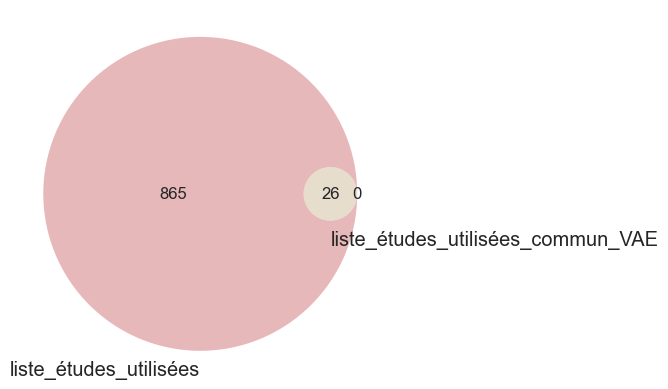

Autism database


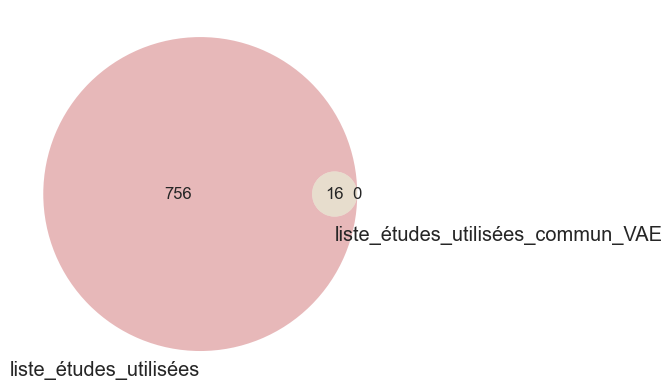

Ascano


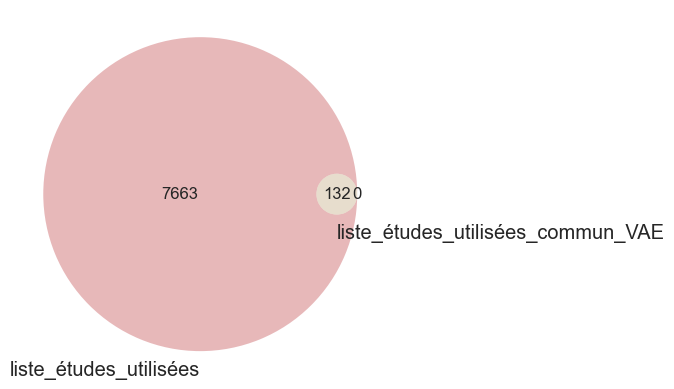

Darnell


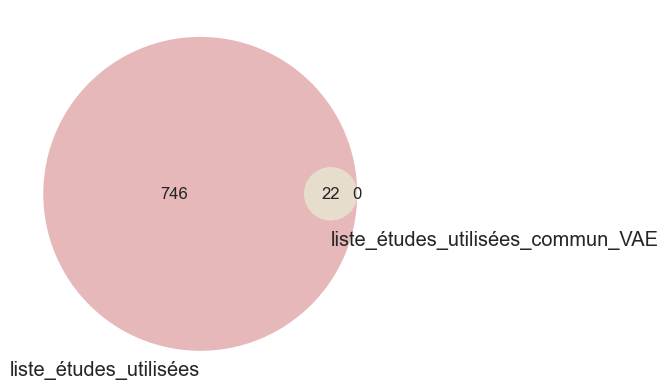

Maurin


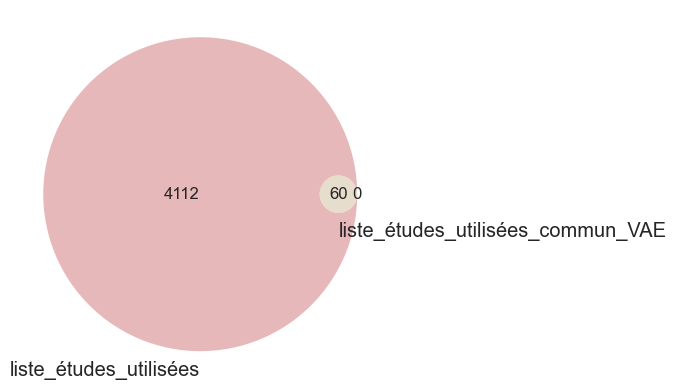

proteome 


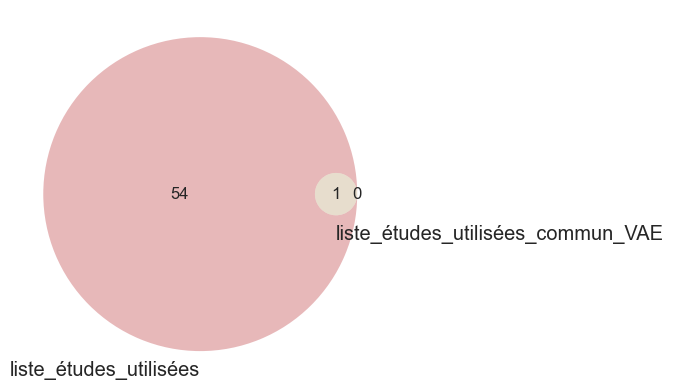

In [24]:
import pandas as pd
from matplotlib_venn import venn2

df3= pd.read_csv('.\\bibliography\\liste_litteratures_all.csv', sep=";", encoding='ISO-8859-1')
df3=df3.dropna()
display(df3)

# Convert the DataFrame column to lowercase
df3['column_name_lower'] = df3['molecules_litterature'].str.lower()

liste_used_df= df3['column_name_lower'].tolist()
print(liste_used_df)
liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]

#remove genes not kept during horizontal integration

if combatseq != "y":
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_.csv")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm.csv")
else:
    if min_max != "y":
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_combatseq.csv")
    else:
        data= pd.read_csv(".\integration_horizontale\TL_TP_p_min_max_norm_combatseq.csv")

display(data)
keep_list = data['Gene.name'].str.lower().tolist()
keep_list= [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in keep_list]

common_elements = list(set(liste_used_df) & set(keep_list))
liste_used_df = list(common_elements)

###########################

df= pd.read_csv('.\integration_horizontale\Resultats_VAE\\shared_important_molecules_in_features.csv')
df.set_index(df.columns[0], inplace=True)
#display(df)

gene_dict = {}
gene_lists=[]

# Iterate through each column in the DataFrame
for column in df.columns:
    # Use the 'loc' function to get the indices where the value is 1
    indices = df[df[column] == 1].index.tolist()
    # Store the indices in the dictionary
    gene_dict[column] = indices
    gene_lists.append(indices)

# Print the dictionary containing the index lists
#print(gene_dict)

################################ GENES SELECTED VAE

df= pd.read_csv('.\integration_horizontale\Resultats_VAE\\shared_important_molecules_in_features.csv')

df.set_index(df.columns[0], inplace=True)
display(df)

unique_genes = df.index.tolist()

unique_genes = [s.lower() for s in unique_genes]
unique_genes = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in unique_genes]

###########################

# List of values to match used_df and VAE results
value_list = list(set(liste_used_df) & set(unique_genes))

print(value_list)

# Use the value_list to filter the DataFrame with DE in studies
filtered_df = df3[df3['column_name_lower'].isin(value_list)]

# Drop the lowercase column if you no longer need it
filtered_df = filtered_df.drop(columns=['column_name_lower'])

#filtered_df.to_csv('.\Enrichissement\\list_from_used_studies_common_with_VAE.csv', index=False)

#####################################################

unique_names = df3['study'].unique()

for name in unique_names:
    print(name)
    sub_df_not_filtered = df3[df3['study'] == name]

    liste_used_df = sub_df_not_filtered ['molecules_litterature'].str.lower().tolist()
    liste_used_df = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df]

    ############################################
    sub_df_filtered = filtered_df[filtered_df['study'] == name]

    liste_used_df_filtered = sub_df_filtered ['molecules_litterature'].str.lower().tolist()
    liste_used_df_filtered = [s.replace('-', '').replace(',', '').replace('.', '').replace(';', '').replace(' ', '')  for s in liste_used_df_filtered]

    venn2([set(liste_used_df), set(liste_used_df_filtered)], ('liste_études_utilisées', 'liste_études_utilisées_commun_VAE'))

    plt.show()
